# Busness case :Build a machine learning model to identify fraudulent credit card transactions.


### CREDIT CARD FRAUD DETECTION

Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.

• Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genuine.

• Evaluate the model's performance using metrics like precision, recall, and F1-score, and consider techniques like oversampling or undersampling for improving results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
pd.set_option('display.max_column',None)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Domain Analysis

#### The dataset contains transactions made by credit cards in September 2013 by European cardholders.
#### This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

#### It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data.

#### Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

#### Time :- Number of seconds elapsed between this transaction and the first transaction in the dataset. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

#### The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

#### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.



### Basic checks

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Insights from the data

#### 1)No constant feature.
#### 2)No null values.

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
data.size

8829017

In [9]:
data.shape

(284807, 31)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Exploratory Data Analysis

##### Univariate analysis

In [4]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Time :- It has 44% of distinct values. The distribution is negatively skewed. 

#### Features V1, V2, … V28  :- are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.

####  Amount :- It has 12% of distinct values. The distribution is having kurtosis of 845.

#### Class :- Output variable with 2 distinct values. Where >99% data belongs to class 0(not fraud) and <1% belongs ot class 1(Fraud).



### Data Preprocessing 

##### Finding null values 

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### Handling outliers 

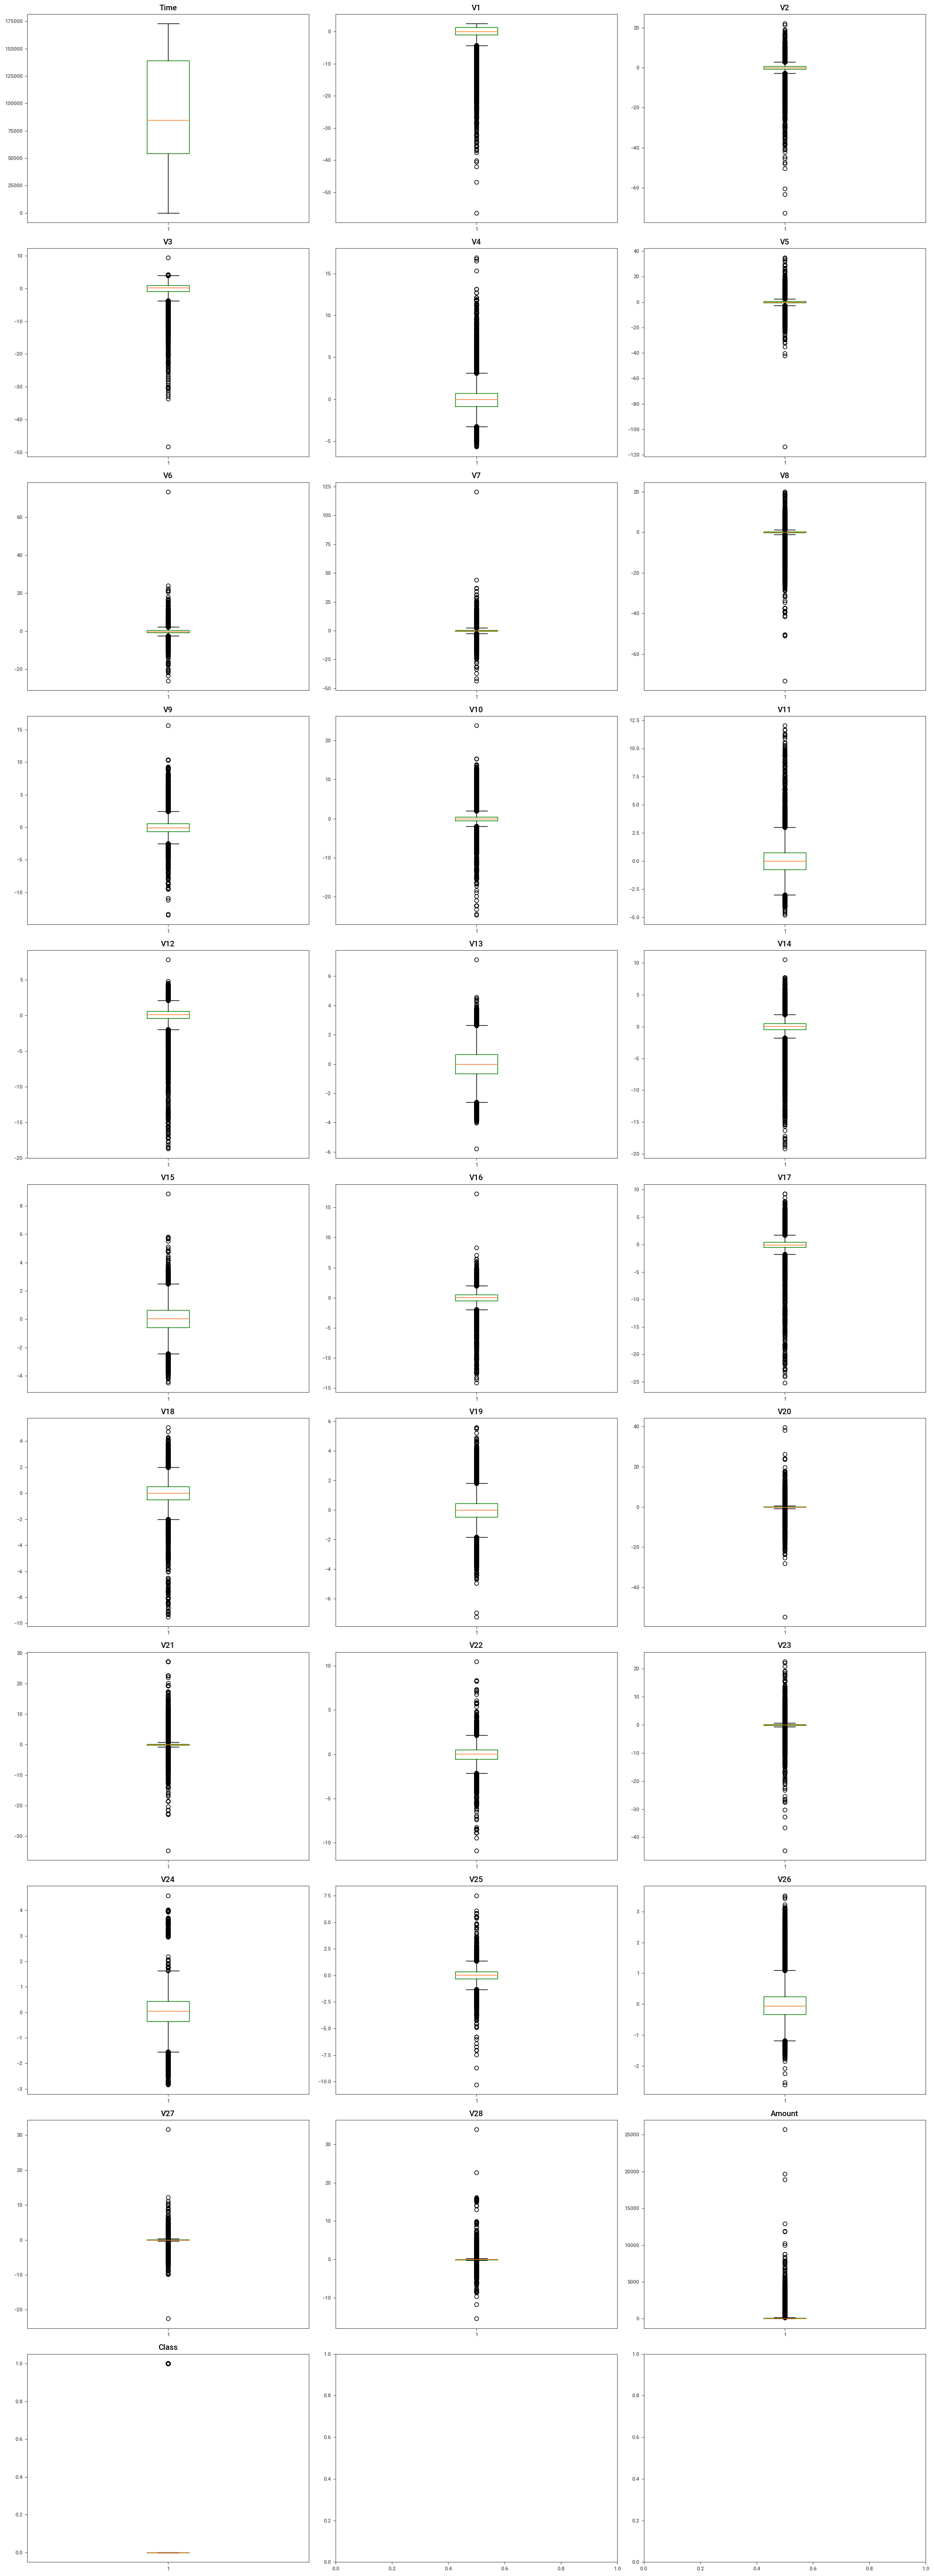

In [7]:
numeric_cols = data.select_dtypes(include=[float, int]).columns
num_plots = len(numeric_cols)
num_cols = 3  # number of columns per row
num_rows = int(np.ceil(num_plots/num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5*num_rows))

for i, col_name in enumerate(numeric_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].boxplot(data[col_name], boxprops=dict(color='green'))
    axes[row, col].set_title(col_name)


plt.tight_layout()  # adjust subplot spacing
plt.show()

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


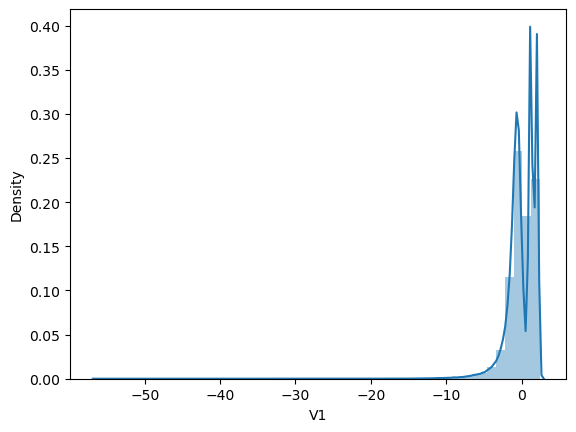

In [7]:
#age
sns.distplot(data.V1)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


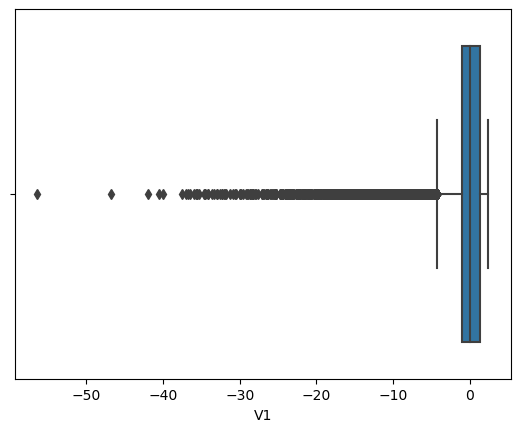

In [8]:
sns.boxplot(data.V1)
plt.show()
#ouliters in min_limit

In [9]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V1,interpolation='midpoint')
IQR

2.236015078268187

In [10]:
Q1=data.V1.quantile(0.25)
Q3=data.V1.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [11]:
data.loc[data['V1']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,0.345173,0.917230,0.970117,-0.266568,-0.479130,-0.526609,0.472004,-0.725481,0.075081,-0.406867,-2.196848,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
85,55.0,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,-0.614312,0.384927,1.194403,-1.020718,-1.246829,-2.348673,-0.213438,-0.100222,-0.406073,-1.637573,-0.960963,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
140,87.0,-5.101877,1.897022,-3.458034,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,-0.305483,-1.473383,0.272913,0.649419,0.899811,0.874543,1.471753,-0.144793,-0.725519,-0.698936,-1.270478,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60,0
146,92.0,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,6.427802,1.401383,0.667167,0.314682,-1.860653,0.558542,0.314815,-0.701308,0.206092,-0.208238,2.962484,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
164,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,-0.362818,0.286155,0.487836,1.259957,0.660405,0.455263,-0.497644,0.792269,-0.978442,7.744222,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284631,172623.0,-5.459612,4.844512,-5.127471,-0.772816,-2.098147,0.010068,-2.943210,4.723736,0.030501,-0.437485,-1.327595,1.653897,0.215221,1.675277,0.369467,0.450011,2.884149,-1.384694,-1.704469,-0.039180,-0.104680,-0.823664,0.766333,-0.498784,0.022025,0.271928,-0.032666,-0.021239,9.82,0
284649,172642.0,-11.946976,9.772660,-8.006237,-2.498596,-4.229520,-1.320039,-3.259766,5.059956,4.870093,8.570504,-0.927453,2.663531,1.025505,1.041785,-0.908015,0.966396,0.426147,-0.107051,-0.535565,3.468419,-0.957977,-1.529035,0.838689,-1.249172,1.714495,0.314623,2.112848,1.234408,10.74,0
284772,172760.0,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,2.769699,-1.476424,-0.076365,-0.755724,0.758186,1.018209,0.099797,-0.013050,0.239192,0.096111,-1.002096,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,-1.052365,2.834865,1.088141,1.288401,-0.931503,1.067864,0.586179,-0.085524,-0.571605,3.490065,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


In [12]:
len(data.loc[data['V1']<min_limit])

7062

In [13]:
data.shape

(284807, 31)

In [14]:
7062 / 284807 *100
#We have to handle outliers  as they are less than 5% 

2.4795738868777804

In [15]:
data.loc[data['V1']<min_limit,'V1']=np.median(data.V1)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


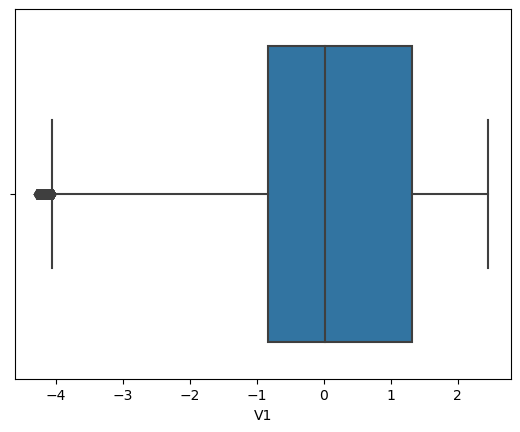

In [16]:
sns.boxplot(data.V1)
plt.show()

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


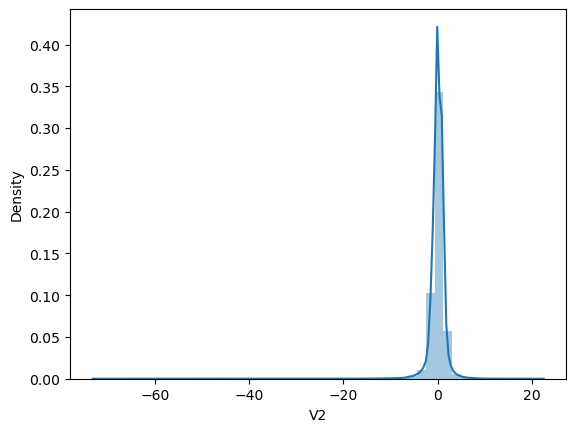

In [17]:
#duration
sns.distplot(data.V2)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


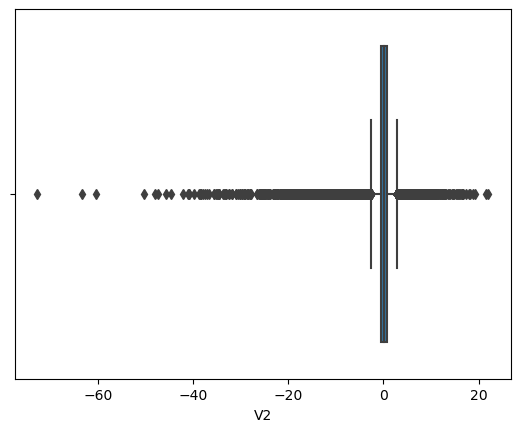

In [18]:
sns.boxplot(data.V2)
plt.show()
#ouliters in max_limit and min_limit

In [19]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V2,interpolation='midpoint')
IQR

1.4022737847050104

In [20]:
Q1=data.V2.quantile(0.25)
Q3=data.V2.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [21]:
data.loc[data['V2']>max_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
146,92.0,0.018109,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,6.427802,1.401383,0.667167,0.314682,-1.860653,0.558542,0.314815,-0.701308,0.206092,-0.208238,2.962484,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
225,147.0,-2.687978,4.390230,-2.360483,0.360829,1.310192,-1.645253,2.327776,-1.727825,4.324752,6.286487,2.466395,-0.727391,0.026190,-6.576789,1.766034,-0.651759,2.201392,0.377629,-1.450113,3.169344,-1.045961,-0.156951,0.079854,-0.012598,0.207194,-0.536578,0.950393,-0.624431,0.89,0
290,209.0,0.018109,5.267376,-1.761895,-1.441250,-0.988529,-0.672187,0.075760,0.774198,3.580112,6.510779,1.276496,0.837057,0.377257,-1.614809,0.534728,0.416673,-0.541828,0.228258,-0.243879,2.983262,-0.910910,-1.204988,0.215766,-0.498066,1.125918,0.201450,2.468867,1.573084,8.97,0
759,571.0,-2.990622,2.962638,-0.980844,0.071904,-1.795238,-1.335733,-1.143681,2.134599,-0.377240,-0.382308,-0.961325,0.435644,-0.184131,0.993494,0.832998,0.946421,0.849673,0.061174,-0.232545,0.028666,-0.184759,-0.890628,0.278109,0.301391,0.137764,0.103233,0.052097,0.001938,9.99,0
789,600.0,-3.558909,3.380836,-1.456003,0.059323,-2.170044,-1.398586,-1.499036,2.570320,-0.355383,-0.300054,-1.085679,0.605352,-0.121075,1.239161,0.809902,1.049514,1.008866,0.082773,-0.268372,0.045923,-0.173392,-0.925282,0.334653,0.297350,0.211370,0.109737,0.032830,-0.001271,11.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284695,172691.0,-3.129647,3.154269,-2.131756,-1.406694,-0.255714,-0.465659,-0.038440,1.152033,1.266457,2.369251,-0.256529,1.144315,0.634161,0.207808,-0.995489,0.481589,-0.761574,-0.020190,0.296577,1.046241,-0.505797,-0.861127,0.134934,-1.135408,0.196247,0.209139,0.736433,0.325485,8.96,0
284713,172705.0,-3.720457,3.879489,-2.560775,-2.177371,0.495872,-1.247785,1.337622,0.014269,2.705118,4.838134,0.980977,-0.109975,-1.849300,-0.010987,-0.379589,-0.832022,-0.698890,-0.035950,-0.394265,2.001429,-0.235634,0.579972,-0.017147,0.647609,0.405239,0.059625,1.596482,0.717827,0.92,0
284728,172717.0,-2.969250,3.216851,-2.873002,-0.628840,-1.009366,-1.239406,-0.868517,2.095139,0.298903,-0.101015,-1.298812,0.603824,0.022175,0.204753,-0.307185,0.827428,1.187772,-0.103100,-0.452568,0.216237,-0.314385,-1.050903,0.387902,0.598871,-0.020316,0.146919,0.232856,0.122176,9.99,0
284795,172778.0,0.018109,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,-1.052365,2.834865,1.088141,1.288401,-0.931503,1.067864,0.586179,-0.085524,-0.571605,3.490065,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


In [22]:
data.loc[data['V2']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18,14.0,0.018109,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,0.345173,0.917230,0.970117,-0.266568,-0.479130,-0.526609,0.472004,-0.725481,0.075081,-0.406867,-2.196848,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
85,55.0,0.018109,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,-0.614312,0.384927,1.194403,-1.020718,-1.246829,-2.348673,-0.213438,-0.100222,-0.406073,-1.637573,-0.960963,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
89,59.0,-0.773293,-4.146007,-0.932038,0.027094,-1.698307,0.460188,0.737344,-0.314216,-0.842673,0.017276,-0.617560,-0.197504,1.594958,-0.259879,1.221025,1.324640,0.120540,-1.248649,-0.005070,2.442782,0.890978,0.026123,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,1142.02,0
164,103.0,0.018109,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,-0.362818,0.286155,0.487836,1.259957,0.660405,0.455263,-0.497644,0.792269,-0.978442,7.744222,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
174,112.0,0.018109,-3.345061,0.566006,3.960568,-2.495400,3.691365,1.603360,-0.071801,1.092418,1.145819,-1.229687,-0.186778,-0.063865,-1.418963,-1.006375,0.717839,-0.333451,1.208951,2.245697,-1.132660,-0.797155,0.260093,-2.712276,-1.020436,0.070990,0.619086,1.720707,-1.648553,937.69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284497,172498.0,-0.801222,-4.874934,-3.195666,1.177224,-1.299393,-0.397073,2.192428,-0.603173,0.358854,-0.611675,0.575984,0.760384,-0.496390,1.078927,-0.324041,0.018666,-0.484849,0.276756,0.217340,2.752017,0.778143,-1.011155,-1.160277,-0.266300,-0.523929,-0.233779,-0.338745,0.180252,1484.66,0
284528,172527.0,0.643223,-3.380753,-3.890511,-0.386292,-0.266371,-0.822619,1.514705,-0.729189,-0.901784,0.565653,-1.635506,-1.697678,-1.250055,0.869899,-0.173243,0.485685,0.368194,-1.127407,0.769358,1.694664,0.944202,0.691763,-1.051281,0.140447,0.508555,0.220468,-0.278604,0.058006,900.00,0
284696,172691.0,-2.645515,-3.197322,1.223394,0.357956,1.863907,-1.196416,-0.367646,0.107591,0.710616,-0.614219,-1.386525,-1.022995,-1.387655,0.170089,1.300456,0.129650,-0.621447,0.990167,0.114219,1.348409,0.592990,0.515768,0.930397,0.505316,0.170897,-0.208073,-0.227068,-0.002562,318.75,0
284727,172716.0,-3.240505,-2.799345,1.749777,0.332355,1.535180,-0.574599,-2.131128,1.034499,0.110722,-0.765409,-0.341543,0.656896,0.744721,0.067701,0.621832,1.051746,-0.800427,1.541284,1.024298,1.066411,0.553838,0.351755,-0.380236,-0.941868,0.232699,0.901126,-0.030580,-0.501609,52.00,0


In [23]:
len(data.loc[data['V2']>max_limit])

5096

In [24]:
#min_limit
8430 /284807*100

2.9598991597818873

In [25]:
#max_limit
5096/284807*100

1.7892818645609134

In [26]:
data.loc[data['V2']<max_limit,'V2']=np.median(data.V2)
data.loc[data['V2']>min_limit,'V2']=np.median(data.V2)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


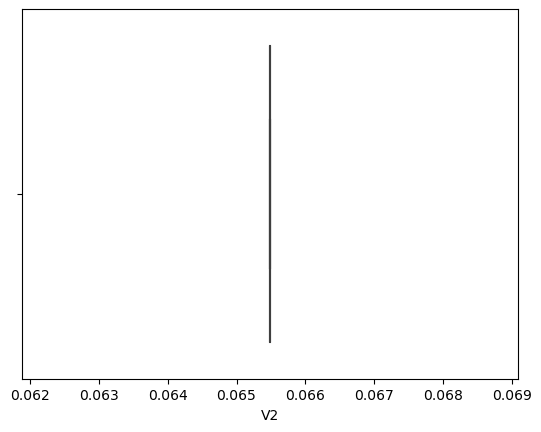

In [27]:
sns.boxplot(data.V2)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


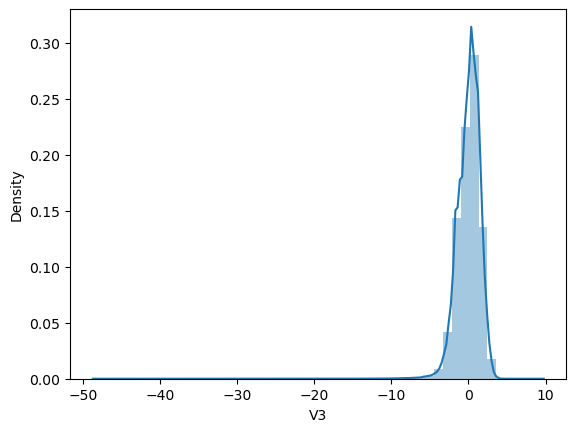

In [28]:
#V3
sns.distplot(data.V3)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


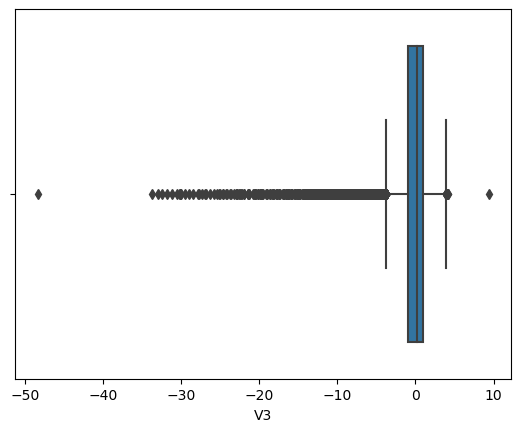

In [29]:
sns.boxplot(data.V3)
plt.show()
#Outliers in max_limit and min_limit

In [30]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V3,interpolation='midpoint')
IQR

1.9175603806206956

In [31]:
Q1=data.V3.quantile(0.25)
Q3=data.V3.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [32]:
data.loc[data['V3']>max_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
958,725.0,-0.534913,0.065486,4.017561,3.254904,-0.919559,1.644716,-0.638287,0.432396,0.000158,0.501195,0.446254,1.052726,0.451786,-1.402749,-1.870148,-0.619166,0.436713,0.612061,1.522573,0.247874,0.147772,1.096225,-0.416073,0.628186,0.106290,0.474381,0.019260,-0.126126,0.76,0
4023,3663.0,-1.412929,0.065486,4.101716,3.125893,-0.737106,1.689131,-0.294576,-0.251492,2.861628,2.270495,1.512662,-2.501124,0.491743,-0.645483,-2.269443,-0.931217,0.894002,0.908746,1.229371,0.784239,-0.267638,0.771383,-0.457158,0.522547,0.136126,0.346932,-0.379387,-0.507720,2.66,0
5845,6345.0,-0.865862,0.065486,3.940337,3.606141,-0.672490,1.242731,-0.897963,0.364253,1.896719,0.211829,-0.695609,-2.862065,0.940235,0.061313,-1.727816,-0.736644,1.421221,0.625177,1.080728,0.397425,-0.090057,0.610083,-0.276843,0.387543,0.185369,0.486753,0.210990,-0.056815,21.48,0
6740,8463.0,-1.659875,0.065486,3.934998,3.211911,0.214577,2.377242,-0.945849,0.306652,2.449614,1.705881,1.857233,-1.720028,1.538584,-0.488801,-1.863526,-1.368481,1.447269,-0.029556,0.600371,0.572269,-0.281458,1.001948,-0.549951,-0.259485,0.092977,0.491857,0.329631,-0.278994,1.67,0
8721,11846.0,-1.357366,0.065486,3.920275,3.703848,-0.183712,1.666799,-1.418969,0.776788,1.210812,-0.092386,1.482353,-1.329264,1.942811,0.350492,-2.328861,-0.857315,1.573379,0.535067,0.951632,0.436090,0.177632,0.926787,-0.036331,0.240189,0.090946,0.493069,0.120965,0.107895,56.67,0
10738,18213.0,-1.295751,0.065486,3.906558,3.630741,-0.796698,1.611096,-0.815362,0.377266,2.045695,0.390870,-0.181508,-2.786651,0.710426,0.037624,-1.442479,-1.104803,1.790927,0.070427,0.644141,0.099010,-0.090012,0.822735,0.041491,0.394634,0.112011,0.485431,-0.013914,0.001698,22.82,0
10918,18724.0,-1.235356,0.065486,4.029428,3.670553,-0.349657,1.395458,-1.122719,0.378974,1.872298,0.318555,-0.026773,-2.225492,1.669377,-0.095087,-1.549042,-1.153234,1.761888,-0.066128,0.629140,0.154274,-0.090822,0.839965,-0.414291,0.447217,0.044324,0.488187,0.215708,-0.103177,19.02,0
11729,20062.0,-0.873646,0.065486,4.079168,3.475392,-0.816982,2.200755,-0.572240,0.321244,1.830995,0.437185,1.346543,-2.643251,-0.127823,0.249808,-2.048719,-0.898433,1.448203,0.689599,0.987351,0.114108,-0.039837,0.870469,-0.201866,0.207246,-0.056497,0.436209,-0.280471,-0.354606,76.07,0
13507,23930.0,-0.558917,0.065486,3.945276,5.016925,-0.559508,1.853605,-0.516142,0.375776,0.752643,0.914523,0.036784,-2.722021,1.435302,0.300587,-1.235103,-0.980145,1.800228,-0.150243,0.735372,0.317423,-0.196399,0.391769,-0.220927,0.367483,-0.109166,0.449929,0.248237,-0.057321,3.07,0
19686,30469.0,-2.595422,0.065486,3.971381,2.432119,1.496360,-0.094973,-1.850127,0.696108,0.612294,0.034385,-0.192197,0.677175,-0.741745,-1.244167,-3.016058,0.344458,-0.415053,0.615011,-0.729284,0.577478,0.322043,0.660989,0.052853,0.349056,0.524465,0.121492,-0.156226,-0.103330,36.40,0


In [33]:
data.loc[data['V3']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164,103.0,0.018109,0.065486,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,-0.362818,0.286155,0.487836,1.259957,0.660405,0.455263,-0.497644,0.792269,-0.978442,7.744222,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
1632,1264.0,0.018109,0.065486,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,-2.636622,3.702177,-1.843056,2.427123,-1.652836,3.635042,4.087802,-1.654892,-0.888406,0.752276,-11.748689,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,0
5257,5093.0,0.018109,0.065486,-4.075931,0.497255,-0.042376,-1.889240,0.743810,-0.049906,5.697423,6.255939,2.912178,-2.553748,1.911043,-4.159256,0.928110,-0.281895,3.573485,0.739574,-1.794292,3.212952,-1.142075,-0.474004,0.366429,-0.094575,0.487756,-0.547307,0.838527,-0.637126,0.89,0
5792,6213.0,-1.844504,0.065486,-3.866049,1.685659,-0.391838,-1.359432,-1.110771,2.060648,0.473009,-1.341319,3.072661,-1.112892,2.455701,-0.727894,-0.329709,1.197183,4.346462,1.861746,-0.833920,0.052651,-0.115459,-0.201703,0.426431,-0.389084,-0.231910,-0.399458,0.041331,-0.074946,0.89,0
5936,6556.0,-2.401724,0.065486,-4.330494,1.668796,-0.748898,-1.431977,-1.483392,2.500178,0.494960,-1.256285,2.947245,-0.942767,2.516958,-0.482215,-0.354806,1.297007,4.506389,1.883826,-0.869127,0.073903,-0.102014,-0.234384,0.494757,-0.394288,-0.156048,-0.392479,0.020223,-0.076590,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284610,172602.0,-3.849825,0.065486,-5.138427,-0.756156,-1.496193,-1.344611,-1.733808,3.273432,-0.870490,-1.153584,-2.710705,1.219892,0.571736,3.174297,0.089713,0.229366,0.937491,0.329164,0.563197,-0.807312,0.601646,0.576961,0.213363,0.046459,0.381029,-0.417428,-1.409201,-0.350954,11.76,0
284631,172623.0,0.018109,0.065486,-5.127471,-0.772816,-2.098147,0.010068,-2.943210,4.723736,0.030501,-0.437485,-1.327595,1.653897,0.215221,1.675277,0.369467,0.450011,2.884149,-1.384694,-1.704469,-0.039180,-0.104680,-0.823664,0.766333,-0.498784,0.022025,0.271928,-0.032666,-0.021239,9.82,0
284649,172642.0,0.018109,0.065486,-8.006237,-2.498596,-4.229520,-1.320039,-3.259766,5.059956,4.870093,8.570504,-0.927453,2.663531,1.025505,1.041785,-0.908015,0.966396,0.426147,-0.107051,-0.535565,3.468419,-0.957977,-1.529035,0.838689,-1.249172,1.714495,0.314623,2.112848,1.234408,10.74,0
284795,172778.0,0.018109,0.065486,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,-1.052365,2.834865,1.088141,1.288401,-0.931503,1.067864,0.586179,-0.085524,-0.571605,3.490065,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


In [34]:
len(data.loc[data['V3']>max_limit])

20

In [35]:
data.shape

(284807, 31)

In [36]:
#min_limit
3343 /284807 *100

1.1737773299111327

In [37]:
#max_limit
20/284807 *100

0.007022299311463552

In [38]:
data.loc[data['V3']<max_limit,'V3']=np.median(data.V3)
data.loc[data['V3']>min_limit,'V3']=np.median(data.V3)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


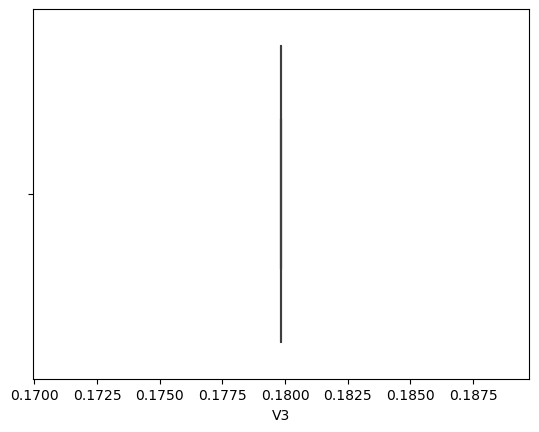

In [39]:
sns.boxplot(data.V3)
plt.show()


In [40]:
#outliers more than 5%

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


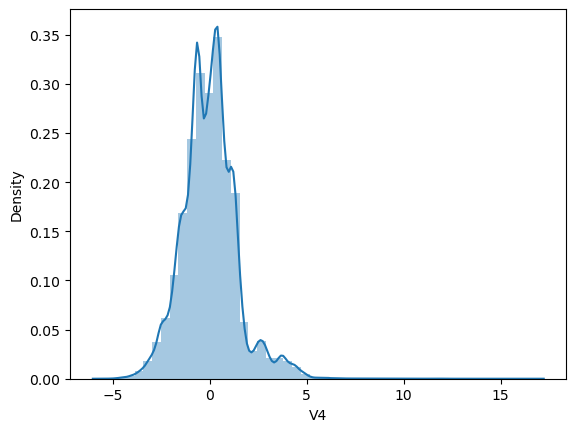

In [41]:
#V4              
sns.distplot(data.V4)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


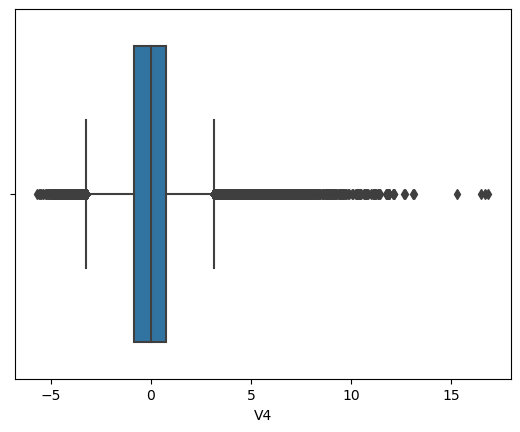

In [42]:
sns.boxplot(data.V4)
plt.show()
#outlier in min_limit and max_limit

In [43]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V4,interpolation='midpoint')
IQR

1.5919814057998605

In [44]:
Q1=data.V4.quantile(0.25)
Q3=data.V4.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [45]:
data.loc[data['V4']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83,53.0,-1.198968,0.065486,0.179846,-4.515824,0.327567,-0.174469,0.959726,-1.026456,1.700435,-0.078942,1.662667,0.485619,-0.933025,-1.118787,0.141253,-2.811888,-0.504746,0.891223,-1.512022,-0.769854,-0.453169,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0
351,259.0,-1.569485,0.065486,0.179846,-4.434211,1.244282,0.402688,-0.649554,0.534756,0.886183,-1.275649,1.525304,1.286995,-0.303788,-0.149255,0.514474,-3.133093,0.471588,0.110395,-2.321077,-0.178911,-0.074659,0.397405,0.199030,-1.386013,-0.141955,-0.984011,0.274079,-0.019784,55.45,0
564,422.0,-0.792748,0.065486,0.179846,-3.774039,0.005129,-0.353166,0.362089,0.044961,1.968388,-2.245798,1.034873,1.433988,-0.047105,-0.383137,-0.047075,-0.410726,-0.872548,0.520402,-0.534330,-0.003959,0.325067,1.155921,-0.171941,-0.268315,0.005261,-1.021470,0.014806,-0.077789,60.92,0
608,460.0,-2.264656,0.065486,0.179846,-4.657545,-0.157183,-0.345406,0.595042,-0.386704,2.211141,0.788946,1.596413,0.695610,-0.871539,-1.010868,0.152614,-2.737036,-0.355966,0.886086,-1.677695,-0.164658,-0.632027,0.222079,-0.189412,-0.332603,0.050197,-1.168870,-0.208793,-0.486754,50.78,0
764,574.0,-1.062129,0.065486,0.179846,-3.335834,0.746649,-0.540531,0.705932,0.032525,1.334181,-2.326389,-1.277858,0.068234,-0.194686,0.309083,1.902638,-0.513264,-0.567202,0.068316,0.762925,0.311059,-0.114269,-0.661122,0.136250,-1.377245,0.263820,-1.115516,0.079213,0.116638,131.37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284634,172627.0,-0.071308,0.065486,0.179846,-4.422745,2.078401,2.710189,-0.515071,1.087521,0.106303,-0.779678,-0.742165,0.311244,-0.025561,0.542678,-0.033667,-2.226914,-0.193074,1.372231,-1.043273,-0.758069,0.249488,1.172163,0.183493,0.743429,-1.508628,-0.345090,0.141739,0.271248,15.13,0
284711,172704.0,-1.034517,0.065486,0.179846,-4.267054,2.062860,3.145858,-0.215357,1.462706,1.167351,-2.132953,-0.307154,0.661705,-0.289781,0.388489,0.440528,0.086353,-0.743689,-0.279581,-0.679592,-0.006052,-0.095626,-0.484040,0.221399,0.662252,-0.425485,-0.780724,0.285122,0.147288,58.42,0
284733,172726.0,-1.353026,0.065486,0.179846,-3.780442,-1.173016,-0.159307,3.009433,-1.544902,1.422788,-2.512103,-0.528871,-0.059281,-1.528962,0.184937,0.059335,-0.975440,-0.249330,-0.488987,-0.037374,-0.639386,0.415421,-0.701799,-0.144663,1.056709,1.074381,-1.129447,0.033781,-0.325899,405.09,0
284746,172735.0,-0.899559,0.065486,0.179846,-3.262816,-0.384415,-0.164529,-0.227184,0.272726,-1.835745,0.758104,-2.198342,-2.416478,-1.461170,-0.184071,-0.512028,-0.128984,0.198559,0.418221,-0.417139,-0.362661,-0.289810,-0.464731,-0.434248,0.009776,0.803066,-0.129513,-0.176856,-0.190917,10.00,0


In [46]:
data.loc[data['V4']>max_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51,36.0,-1.004929,0.065486,0.179846,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,-0.230873,0.145155,-0.063156,-0.799585,-0.341956,-0.930530,0.510510,0.092428,0.823984,1.190398,-0.001980,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
98,67.0,-1.494668,0.065486,0.179846,3.145414,-0.609098,0.258495,-0.012189,0.102136,-0.286164,1.198556,-0.550296,-0.106846,0.208014,-0.680510,0.507764,-0.260264,0.246631,0.008856,0.899416,-0.028352,-0.140047,0.355044,0.332720,0.718193,-0.219366,0.118927,-0.317486,-0.340783,28.28,0
116,75.0,-1.439069,0.065486,0.179846,3.481486,-1.160101,1.764781,-0.558817,0.442019,0.348431,0.393253,-0.972158,0.515886,0.497187,-1.483890,-0.867130,-1.020170,1.062550,-0.359443,0.880606,-0.173140,0.129257,1.129282,-0.006978,0.497337,0.130515,0.525668,-0.088950,0.113206,81.13,0
164,103.0,0.018109,0.065486,0.179846,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,-0.362818,0.286155,0.487836,1.259957,0.660405,0.455263,-0.497644,0.792269,-0.978442,7.744222,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
174,112.0,0.018109,0.065486,0.179846,3.960568,-2.495400,3.691365,1.603360,-0.071801,1.092418,1.145819,-1.229687,-0.186778,-0.063865,-1.418963,-1.006375,0.717839,-0.333451,1.208951,2.245697,-1.132660,-0.797155,0.260093,-2.712276,-1.020436,0.070990,0.619086,1.720707,-1.648553,937.69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284712,172704.0,0.470194,0.065486,0.179846,4.440719,0.202024,-0.458243,1.970565,-0.665303,-1.630737,1.133310,-1.029078,0.361727,1.109385,0.524056,-1.301802,0.272106,-0.560614,-0.723808,-1.611999,1.347241,0.603016,0.104952,-0.716836,0.121688,0.170587,0.082567,-0.218942,0.070955,787.95,0
284738,172731.0,-1.117799,0.065486,0.179846,4.243919,0.043986,0.761828,0.297293,-0.111319,-0.769844,2.911750,-0.888295,-0.319556,1.227808,-0.829885,0.875202,-0.094147,-0.191498,0.414495,0.819752,0.723375,0.168818,1.188923,-0.154410,0.084284,-0.282897,0.512802,0.354905,0.273686,12.85,0
284745,172734.0,1.763157,0.065486,0.179846,3.948933,-0.642361,0.257215,-0.679898,0.291004,0.187648,1.429533,-1.854141,-1.756087,-2.898543,0.340134,-0.204042,1.281598,-0.686267,0.322132,-1.809087,-0.385255,0.172698,0.372182,0.189281,-0.115979,-0.370147,0.036638,-0.008578,-0.029708,52.34,0
284758,172745.0,1.911377,0.065486,0.179846,4.148798,1.029442,-0.727610,0.500745,-0.198614,-1.140565,0.295649,-0.397161,-0.481371,0.260047,-2.591114,-0.639052,1.688021,1.339588,0.388179,-1.690433,-0.185466,-0.429116,-1.184198,0.288661,-0.418323,-0.222729,-0.335830,-0.001158,0.017556,6.75,0


In [47]:
len(data.loc[data['V4']<min_limit])

2243

In [48]:
#min_limit
2243 /284807 *100

0.7875508677806373

In [49]:
8905  /284807 *100

3.1266787684291466

In [50]:
data.loc[data['V4']>max_limit,'V4']=np.median(data.V4)
data.loc[data['V4']<min_limit,'V4']=np.median(data.V4)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


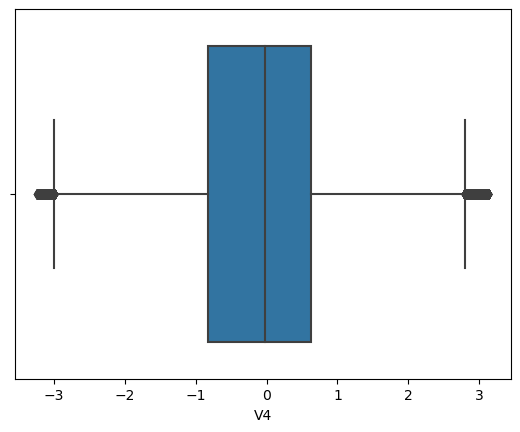

In [51]:
sns.boxplot(data.V4)
plt.show()

In [52]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,0.065486,0.179846,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.065486,0.179846,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,0.065486,0.179846,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,0.065486,0.179846,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.065486,0.179846,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,0.018109,0.065486,0.179846,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,0.065486,0.179846,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,0.065486,0.179846,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.065486,0.179846,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


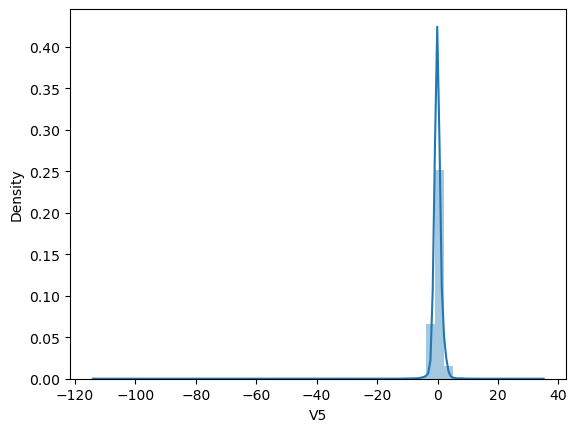

In [53]:
#V5
sns.distplot(data.V5)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


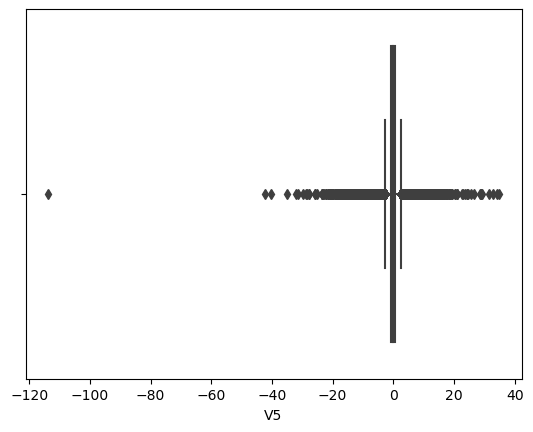

In [54]:
sns.boxplot(data.V5)
plt.show()

In [55]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V5,interpolation='midpoint')
IQR


1.3035235106228504

In [56]:
Q1=data.V5.quantile(0.25)
Q3=data.V5.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [57]:
data.loc[data['V5']>max_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8,7.0,-0.894286,0.065486,0.179846,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
11,10.0,0.384978,0.065486,0.179846,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,-0.259116,-0.326143,-0.090047,0.362832,0.928904,-0.129487,-0.809979,0.359985,0.707664,0.125992,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
18,14.0,0.018109,0.065486,0.179846,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,0.345173,0.917230,0.970117,-0.266568,-0.479130,-0.526609,0.472004,-0.725481,0.075081,-0.406867,-2.196848,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
24,22.0,-1.946525,0.065486,0.179846,-1.013057,2.941968,2.955053,-0.063063,0.855546,0.049967,0.573743,-0.081257,-0.215745,0.044161,0.033898,1.190718,0.578843,-0.975667,0.044063,0.488603,-0.216715,-0.579526,-0.799229,0.870300,0.983421,0.321201,0.149650,0.707519,0.014600,0.89,0
57,39.0,-1.330882,0.065486,0.179846,-0.701232,3.281972,3.216390,-0.059394,0.895430,-0.017779,-0.165753,-0.765047,-0.015636,-0.356626,-0.041200,-0.735103,0.030533,-0.778067,-0.015160,-0.152824,-0.113875,-0.151042,-0.311726,-0.374793,1.014886,0.353992,-0.510327,0.159033,0.228708,13.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284741,172733.0,-1.655706,0.065486,0.179846,-0.869445,3.343411,3.327608,-0.045678,1.139503,-0.272902,-1.375542,0.184611,-0.172118,-0.368367,-1.171362,0.755988,-0.502739,1.471500,0.228349,1.174098,0.183489,-0.235610,-0.633347,-0.038226,0.602366,0.690722,0.206904,-0.306675,-0.248686,40.78,0
284760,172749.0,-0.657393,0.065486,0.179846,-1.889374,2.819520,3.333925,0.287569,0.958604,0.408711,0.541037,-0.131550,0.061860,-0.374501,0.143281,0.087590,-0.217749,-0.508871,-0.891433,-0.295866,0.403316,-0.357330,-0.783553,0.138471,0.677221,-0.306279,0.175724,0.580689,0.281084,1.78,0
284784,172768.0,-0.669662,0.065486,0.179846,-1.560729,2.833960,3.240843,0.181576,1.282746,-0.893890,-1.453432,0.187488,-0.390794,-0.289171,-0.510320,0.955637,0.553781,0.567862,0.409517,-0.671301,0.000965,0.183856,0.202670,-0.373023,0.651122,1.073823,0.844590,-0.286676,-0.187719,40.00,0
284785,172768.0,0.032887,0.065486,0.179846,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,-0.386953,-0.199626,0.032017,-0.374731,0.354051,0.041228,-0.154750,-0.482455,-0.842462,-0.206385,0.022677,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0


In [58]:
data.loc[data['V5']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51,36.0,-1.004929,0.065486,0.179846,-0.019847,-6.631951,5.122103,4.371691,-2.006868,-0.278736,-0.230873,0.145155,-0.063156,-0.799585,-0.341956,-0.930530,0.510510,0.092428,0.823984,1.190398,-0.001980,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
134,83.0,-1.897331,0.065486,0.179846,1.276656,-3.323084,3.229911,1.029631,1.515607,-0.059627,-1.461403,-0.246684,0.921561,-0.196535,0.505961,0.705138,-1.328623,1.915146,-1.935426,-0.930024,-0.832630,0.128416,0.776078,0.477537,-0.608981,-1.120892,-0.413851,0.061399,-0.187964,552.18,0
140,87.0,0.018109,0.065486,0.179846,-1.277543,-5.517758,2.098366,3.329603,1.250966,0.271501,-0.305483,-1.473383,0.272913,0.649419,0.899811,0.874543,1.471753,-0.144793,-0.725519,-0.698936,-1.270478,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60,0
150,93.0,-1.640014,0.065486,0.179846,2.997979,-3.803788,5.051812,3.315254,-0.303785,0.671395,0.744104,-1.222969,-0.646557,-0.374187,-1.723737,-1.324743,0.324962,-0.485514,1.396332,2.156905,0.124193,-0.367933,0.641891,-0.405779,-1.268700,0.494090,0.610967,0.608993,-0.410034,937.69,0
370,270.0,-1.356935,0.065486,0.179846,-1.469102,-3.125909,1.677056,-4.925568,-7.494658,-1.278470,-1.118778,-1.777745,-0.233932,-1.835762,-0.187562,-2.594957,-0.438051,1.682071,-0.129589,-0.924229,1.394631,-4.134608,0.864378,0.153499,0.669049,1.108159,-0.120671,0.043393,0.237636,52.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284536,172539.0,0.018109,0.065486,0.179846,0.770116,-3.785871,2.124706,-2.272833,2.896201,0.552732,1.113104,-1.554701,1.183078,0.287108,-0.023928,-1.800240,-1.032457,0.975180,2.620219,0.465848,-0.325314,-0.384073,-0.204040,-1.113031,0.258388,0.732836,-0.231069,-0.049823,-0.019875,150.00,0
284561,172558.0,0.018109,0.065486,0.179846,-0.971126,-2.902874,-0.713295,-3.470382,5.332066,-0.143787,0.025694,-1.453912,2.219485,0.786880,2.154939,-1.141331,2.095581,1.661249,0.905208,0.057022,0.142556,-0.192001,-1.321234,0.617429,-0.559790,0.515726,0.232630,-0.113612,-0.056250,16.98,0
284649,172642.0,0.018109,0.065486,0.179846,-2.498596,-4.229520,-1.320039,-3.259766,5.059956,4.870093,8.570504,-0.927453,2.663531,1.025505,1.041785,-0.908015,0.966396,0.426147,-0.107051,-0.535565,3.468419,-0.957977,-1.529035,0.838689,-1.249172,1.714495,0.314623,2.112848,1.234408,10.74,0
284795,172778.0,0.018109,0.065486,0.179846,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,-1.052365,2.834865,1.088141,1.288401,-0.931503,1.067864,0.586179,-0.085524,-0.571605,3.490065,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


In [59]:
len(data.loc[data['V5']>max_limit])

8411

In [60]:
#min_limit
3884  /284807 *100

1.3637305262862218

In [61]:
#max_limit
8411  /284807 *100

2.953227975435997

In [62]:
data.loc[data['V5']>max_limit,'V5']=np.median(data.V5)
data.loc[data['V5']<min_limit,'V5']=np.median(data.V5)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


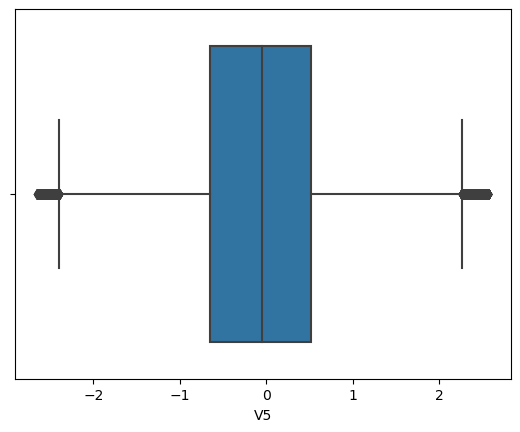

In [63]:
sns.boxplot(data.V5)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


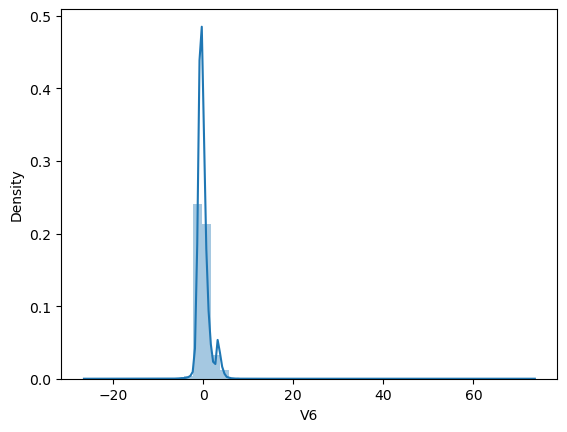

In [64]:
#V6
sns.distplot(data.V6)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


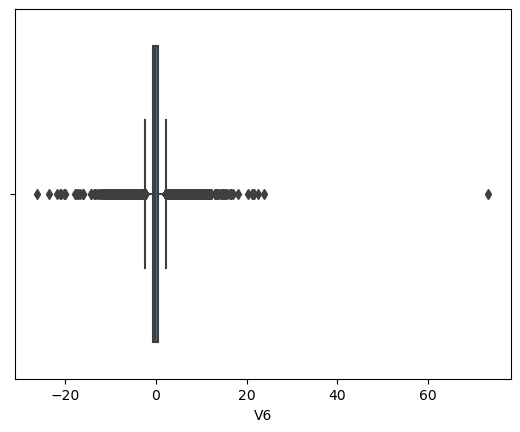

In [65]:
sns.boxplot(data.V6)
plt.show()


In [66]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V6,interpolation='midpoint')
IQR
Q1=data.V6.quantile(0.25)
Q3=data.V6.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [67]:
#Checking outliers in the max limi
data.loc[data['V6']>max_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8,7.0,-0.894286,0.065486,0.179846,-0.271526,-0.054336,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
11,10.0,0.384978,0.065486,0.179846,-0.094019,-0.054336,3.317027,0.470455,0.538247,-0.558895,0.309755,-0.259116,-0.326143,-0.090047,0.362832,0.928904,-0.129487,-0.809979,0.359985,0.707664,0.125992,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99,0
24,22.0,-1.946525,0.065486,0.179846,-1.013057,-0.054336,2.955053,-0.063063,0.855546,0.049967,0.573743,-0.081257,-0.215745,0.044161,0.033898,1.190718,0.578843,-0.975667,0.044063,0.488603,-0.216715,-0.579526,-0.799229,0.870300,0.983421,0.321201,0.149650,0.707519,0.014600,0.89,0
40,32.0,1.249055,0.065486,0.179846,-0.991600,1.429973,3.692977,-1.090209,0.967291,0.850149,-0.307081,-0.456245,0.229981,-0.016913,-0.220846,0.362418,0.315222,-0.512265,0.118995,0.574720,0.097853,-0.006293,0.009200,-0.129463,1.112970,0.500382,1.196549,-0.048220,0.005094,29.89,0
51,36.0,-1.004929,0.065486,0.179846,-0.019847,-0.054336,5.122103,4.371691,-2.006868,-0.278736,-0.230873,0.145155,-0.063156,-0.799585,-0.341956,-0.930530,0.510510,0.092428,0.823984,1.190398,-0.001980,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284785,172768.0,0.032887,0.065486,0.179846,-1.729828,-0.054336,3.401529,0.337434,0.925377,-0.165663,-0.386953,-0.199626,0.032017,-0.374731,0.354051,0.041228,-0.154750,-0.482455,-0.842462,-0.206385,0.022677,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0
284786,172768.0,-2.076175,0.065486,0.179846,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,0.300342,-0.451656,0.566368,-0.317804,0.855742,-0.041047,0.046620,0.017822,-0.772916,-0.354163,-0.308523,2.016666,-1.588269,0.588482,0.632444,-0.201064,0.199251,0.438657,0.172923,8.95,0
284793,172775.0,1.971002,0.065486,0.179846,-0.617643,1.718797,3.911336,-1.259306,1.056209,1.315006,-0.146827,-0.222959,0.496509,-0.051785,-0.000744,0.893684,0.000363,-0.583710,0.074163,-0.356789,-0.153581,0.188758,0.694418,0.163002,0.726365,-0.058282,-0.191813,0.061858,-0.043716,4.99,0
284799,172783.0,-1.775135,0.065486,0.179846,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0


In [68]:
data.loc[data['V6']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
450,328.0,-4.236419,0.065486,0.179846,1.117080,-0.054336,-3.498447,-2.740892,0.372155,-0.214338,-0.242300,-1.681844,0.605228,1.702995,0.075458,0.565157,0.515253,-1.184631,0.381559,-0.280159,1.394093,0.397072,-0.432517,0.612507,-1.016362,0.630373,-0.498141,-0.094774,0.208038,2.50,0
986,744.0,-3.590024,0.065486,0.179846,-1.839667,-0.054336,-2.929059,-1.622049,-0.738849,3.212280,-0.010523,-0.538573,0.451516,-0.635960,-1.288035,0.133764,-0.258804,-0.961071,-0.260277,-0.557072,-1.730813,-0.754387,0.160377,-1.920648,0.579340,-0.117107,-1.096648,0.639569,-0.802700,0.10,0
1022,770.0,-3.840584,0.065486,0.179846,0.472299,-0.054336,-2.866563,-2.353691,0.642973,-0.360866,-0.511912,1.099557,0.289577,-0.983003,0.193285,0.378487,0.576045,-0.163840,0.217069,-0.591911,0.992948,0.167083,-0.982668,0.636921,-0.406875,0.316189,0.047473,-0.159012,0.140620,1.98,0
1064,808.0,-3.904875,0.065486,0.179846,-1.083741,2.427315,-2.808081,-0.559764,-0.039115,-1.236483,-0.023551,0.765090,0.215327,-0.667384,0.130164,-1.668258,-1.197171,-0.480405,1.292142,-1.797499,1.164765,0.115913,-0.839829,1.183091,0.486043,0.779880,0.782930,-0.510657,-0.102327,352.89,0
1637,1266.0,-3.559236,0.065486,0.179846,-0.088772,-0.054336,-3.016469,-1.978058,-0.346419,0.585499,0.796940,0.241521,0.967472,0.819480,-0.404769,-0.959160,0.205846,-1.133750,-0.023319,0.658129,-0.337090,-0.278191,0.048909,-0.848969,-0.616530,-0.489394,0.860199,0.389907,-0.364476,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284354,172372.0,-3.965502,0.065486,0.179846,-0.510473,-0.054336,-3.403866,-1.809359,0.342889,-0.376297,-0.704933,0.254877,1.019469,0.212992,0.408431,-1.440441,0.514820,-1.085723,-0.101215,-0.512637,0.997429,0.098267,-1.140056,0.443981,-0.512415,0.890674,0.149619,-0.244498,0.105699,0.89,0
284582,172575.0,-2.356905,0.065486,0.179846,0.203992,1.543792,-3.276794,-0.570674,0.256909,-0.140155,-0.402364,-0.444364,0.187363,-0.575193,0.973008,0.111209,-0.090117,-0.062111,-0.229001,-0.872651,0.618270,0.682885,1.009886,0.105130,1.009663,-1.067560,0.509961,0.338562,-0.175887,24.95,0
284682,172675.0,-0.392415,0.065486,0.179846,-0.370059,2.158886,-2.876540,0.992906,-0.574800,-0.679477,-0.356646,-0.490160,0.460842,0.360670,0.591191,-0.930172,-0.787211,-0.182005,-0.879000,-0.640334,0.074374,0.442548,1.059497,-0.112435,0.579424,0.471197,0.862335,-0.201799,-0.086905,2.00,0
284787,172769.0,-1.029719,0.065486,0.179846,-0.840816,2.424360,-2.956733,0.283610,-0.332656,-0.247488,-0.328271,-1.089397,-0.694904,-1.315146,0.946281,-0.073008,-0.307347,-0.274712,-0.487247,-0.014378,0.218776,0.353722,0.488487,0.293632,0.107812,-0.935586,1.138216,0.025271,0.255347,9.99,0


In [69]:
#max_limit
21213  /284807*100

7.448201764703817

In [70]:
# Handling the outliers with the help of median.
data.loc[data['V6']<min_limit,'V6']=np.median(data.V6)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


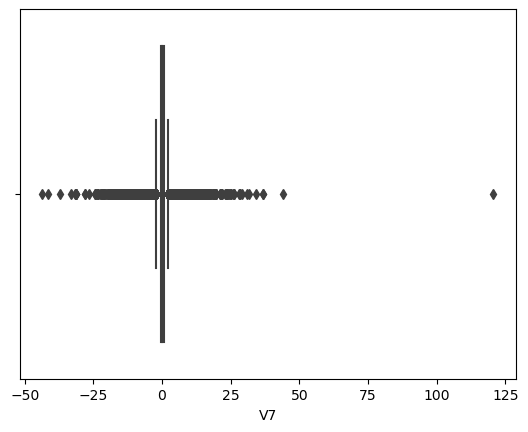

In [71]:
sns.boxplot(data.V7)
plt.show()
#ouliters present

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


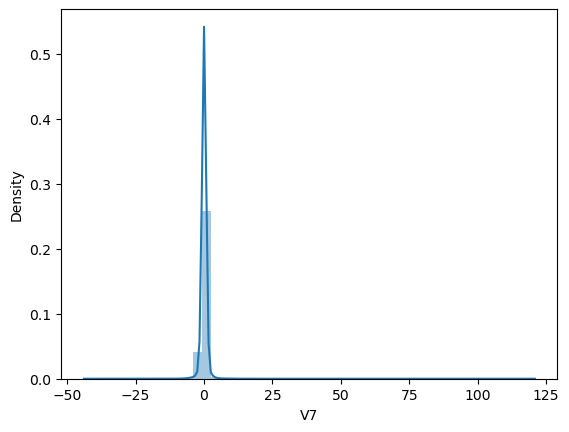

In [72]:
#cons_conf_idx
sns.distplot(data.V7)
plt.show()


In [73]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V7,interpolation='midpoint')
Q1=data.V7.quantile(0.25)
Q3=data.V7.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR



In [74]:
data.loc[data['V7']>max_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
51,36.0,-1.004929,0.065486,0.179846,-0.019847,-0.054336,5.122103,4.371691,-2.006868,-0.278736,-0.230873,0.145155,-0.063156,-0.799585,-0.341956,-0.930530,0.510510,0.092428,0.823984,1.190398,-0.001980,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
140,87.0,0.018109,0.065486,0.179846,-1.277543,-0.054336,2.098366,3.329603,1.250966,0.271501,-0.305483,-1.473383,0.272913,0.649419,0.899811,0.874543,1.471753,-0.144793,-0.725519,-0.698936,-1.270478,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60,0
150,93.0,-1.640014,0.065486,0.179846,2.997979,-0.054336,5.051812,3.315254,-0.303785,0.671395,0.744104,-1.222969,-0.646557,-0.374187,-1.723737,-1.324743,0.324962,-0.485514,1.396332,2.156905,0.124193,-0.367933,0.641891,-0.405779,-1.268700,0.494090,0.610967,0.608993,-0.410034,937.69,0
164,103.0,0.018109,0.065486,0.179846,-0.019847,-1.413792,4.776000,4.808426,-0.228197,-0.525896,-1.724899,-0.362818,0.286155,0.487836,1.259957,0.660405,0.455263,-0.497644,0.792269,-0.978442,7.744222,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
225,147.0,-2.687978,0.065486,0.179846,0.360829,1.310192,-1.645253,2.327776,-1.727825,4.324752,6.286487,2.466395,-0.727391,0.026190,-6.576789,1.766034,-0.651759,2.201392,0.377629,-1.450113,3.169344,-1.045961,-0.156951,0.079854,-0.012598,0.207194,-0.536578,0.950393,-0.624431,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284573,172569.0,-1.762664,0.065486,0.179846,-1.898574,-2.611232,1.301447,3.645126,-0.911945,1.133300,-0.814434,0.559372,0.095702,-0.664034,-0.341286,-0.297739,0.901995,-1.338934,0.180216,0.131453,-1.241059,-0.526145,-0.121367,0.631407,-0.416585,-1.338263,0.006724,-0.084768,0.308717,724.00,0
284638,172629.0,-1.691097,0.065486,0.179846,-0.496544,0.867330,-1.118658,2.945484,-0.510813,-1.083929,-2.315278,1.845339,-0.544387,-0.880381,-2.839338,-0.648271,1.177497,1.743624,1.601854,-0.880466,1.063067,0.162968,-0.292177,0.422693,-0.209257,1.071036,0.669654,-0.388434,-0.099326,430.00,0
284645,172638.0,-2.521887,0.065486,0.179846,-0.019847,0.103394,0.410173,2.650895,-0.619516,-2.625264,2.078730,-1.086927,-0.910306,0.330327,0.693579,0.409545,-0.755567,0.450094,-0.265879,1.626823,-1.053307,-0.027684,1.038627,-0.592359,0.038390,1.155201,0.856059,-0.970223,-0.698047,302.10,0
284698,172693.0,-0.857688,0.065486,0.179846,-0.315457,-0.014455,-1.765595,2.671779,-0.511257,-0.740175,-0.384640,-0.723775,0.471334,0.517863,0.868295,-1.042919,-0.703124,-0.101659,-0.724594,-0.405676,-0.280514,0.484050,1.826575,0.862395,0.586089,-1.036145,0.659765,0.436365,0.173492,307.88,0


In [75]:
data.loc[data['V7']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
85,55.0,0.018109,0.065486,0.179846,0.903915,-0.054336,-0.491078,-2.705393,0.666451,1.922216,-0.614312,0.384927,1.194403,-1.020718,-1.246829,-2.348673,-0.213438,-0.100222,-0.406073,-1.637573,-0.960963,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
210,140.0,0.018109,0.065486,0.179846,-2.737271,-0.054336,-0.996355,-3.391184,1.236267,1.129462,-1.461861,-0.326431,0.597190,-0.027468,0.506505,0.819288,0.194869,-1.172600,0.596974,-0.502619,1.522137,0.655844,-0.047158,0.869558,1.020755,0.706125,-0.207096,-0.167680,0.217685,65.00,0
370,270.0,-1.356935,0.065486,0.179846,-1.469102,-0.054336,1.677056,-4.925568,-7.494658,-1.278470,-1.118778,-1.777745,-0.233932,-1.835762,-0.187562,-2.594957,-0.438051,1.682071,-0.129589,-0.924229,1.394631,-4.134608,0.864378,0.153499,0.669049,1.108159,-0.120671,0.043393,0.237636,52.95,0
384,282.0,0.057780,0.065486,0.179846,2.041473,2.258426,4.692012,-2.303907,-4.492133,-2.013113,0.108544,-0.444928,0.079247,-0.418820,1.642575,0.914557,0.379160,-0.199044,0.250599,0.591391,1.419343,-2.477111,0.803886,0.284487,0.993049,-0.039252,0.173406,0.181840,0.378080,27.00,0
450,328.0,-4.236419,0.065486,0.179846,1.117080,-0.054336,-0.274187,-2.740892,0.372155,-0.214338,-0.242300,-1.681844,0.605228,1.702995,0.075458,0.565157,0.515253,-1.184631,0.381559,-0.280159,1.394093,0.397072,-0.432517,0.612507,-1.016362,0.630373,-0.498141,-0.094774,0.208038,2.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284561,172558.0,0.018109,0.065486,0.179846,-0.971126,-0.054336,-0.713295,-3.470382,5.332066,-0.143787,0.025694,-1.453912,2.219485,0.786880,2.154939,-1.141331,2.095581,1.661249,0.905208,0.057022,0.142556,-0.192001,-1.321234,0.617429,-0.559790,0.515726,0.232630,-0.113612,-0.056250,16.98,0
284631,172623.0,0.018109,0.065486,0.179846,-0.772816,-2.098147,0.010068,-2.943210,4.723736,0.030501,-0.437485,-1.327595,1.653897,0.215221,1.675277,0.369467,0.450011,2.884149,-1.384694,-1.704469,-0.039180,-0.104680,-0.823664,0.766333,-0.498784,0.022025,0.271928,-0.032666,-0.021239,9.82,0
284649,172642.0,0.018109,0.065486,0.179846,-2.498596,-0.054336,-1.320039,-3.259766,5.059956,4.870093,8.570504,-0.927453,2.663531,1.025505,1.041785,-0.908015,0.966396,0.426147,-0.107051,-0.535565,3.468419,-0.957977,-1.529035,0.838689,-1.249172,1.714495,0.314623,2.112848,1.234408,10.74,0
284795,172778.0,0.018109,0.065486,0.179846,-2.510473,-0.054336,-1.394465,-3.632516,5.498583,4.893089,8.655320,-1.052365,2.834865,1.088141,1.288401,-0.931503,1.067864,0.586179,-0.085524,-0.571605,3.490065,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


In [76]:
print(len(data.loc[data['V7']>max_limit]))
print(len(data.loc[data['V7']<min_limit]))

4138
4810


In [77]:
#max_limit
Max = 4138  /284807 *100
print(Max)
#min_limit
Min = 4810  /284807 *100
print(Min)


1.4529137275418091
1.6888629844069845


In [78]:
#Handling outliers in max_limit
data.loc[data['V7']>max_limit,'V7']=np.median(data.V7)
#Handling outliers in min_limit
data.loc[data['V7']<min_limit,'V7']=np.median(data.V7)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


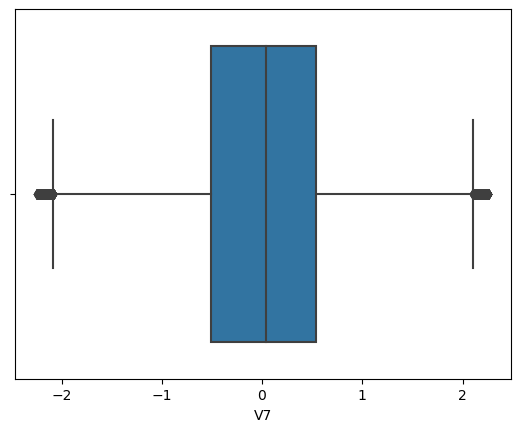

In [79]:
sns.boxplot(data.V7)
plt.show()


In [80]:
#V8

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


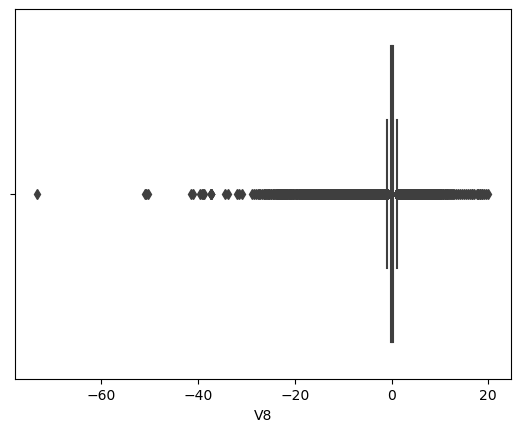

In [81]:
sns.boxplot(data.V8)
plt.show()


In [82]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V8,interpolation='midpoint')
Q1=data.V5.quantile(0.25)
Q3=data.V5.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [83]:
data.loc[data['V8']>max_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
41,32.0,-2.008872,0.065486,0.179846,1.159432,-0.815174,0.182288,-0.617108,1.530817,-0.586832,0.129876,0.658479,1.265049,-0.206518,1.013603,-0.549414,-0.708034,0.869643,-0.095660,0.944395,0.028740,0.094917,0.294983,0.011081,0.015249,0.034211,-0.236141,0.128291,0.117986,2.35,0
134,83.0,-1.897331,0.065486,0.179846,1.276656,-0.054336,3.229911,1.029631,1.515607,-0.059627,-1.461403,-0.246684,0.921561,-0.196535,0.505961,0.705138,-1.328623,1.915146,-1.935426,-0.930024,-0.832630,0.128416,0.776078,0.477537,-0.608981,-1.120892,-0.413851,0.061399,-0.187964,552.18,0
139,85.0,-4.257597,0.065486,0.179846,-1.374317,-1.180136,-0.331040,-0.117992,1.592032,0.415996,0.159163,-1.516288,0.374065,0.427174,0.803874,0.713171,0.915793,-0.134022,-0.693337,-0.639568,-0.271985,-0.452568,-0.671703,0.001422,-0.876377,0.070098,0.729582,-0.002942,-0.481497,124.67,0
249,169.0,-4.066862,0.065486,0.179846,-1.312829,-0.054336,2.755895,-1.999095,1.726413,-0.413594,-0.769343,-1.265963,-0.306976,0.096136,-0.581299,-1.597358,1.213666,0.298187,-0.604048,0.534228,1.876937,0.794926,0.294823,0.429791,1.059320,0.606301,-0.183101,-0.057777,-0.532404,355.51,0
541,406.0,-2.312227,0.065486,0.179846,-0.019847,-0.522188,-1.426545,0.040103,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284762,172750.0,-1.191654,0.065486,0.179846,0.337373,1.718989,5.493092,-1.273101,1.686394,1.126807,-0.676179,-1.153533,0.286000,-0.316118,-1.094229,-0.761593,-0.778481,0.296012,0.390181,0.821980,0.495576,0.149311,0.698938,-0.196885,0.731485,0.667391,-0.133347,0.417418,0.161967,79.99,0
284783,172768.0,-1.796092,0.065486,0.179846,-1.689844,2.199572,3.123732,-0.270714,1.657495,0.465804,0.832931,-0.344690,0.247153,-0.119068,0.849765,0.903389,-0.398816,-0.302906,0.036545,-0.202990,0.319366,0.271170,1.145750,0.084783,0.721269,-0.529906,-0.240117,0.129126,-0.080620,11.46,0
284795,172778.0,0.018109,0.065486,0.179846,-2.510473,-0.054336,-1.394465,0.040103,5.498583,4.893089,8.655320,-1.052365,2.834865,1.088141,1.288401,-0.931503,1.067864,0.586179,-0.085524,-0.571605,3.490065,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0
284799,172783.0,-1.775135,0.065486,0.179846,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0


In [84]:
data.loc[data['V8']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7,7.0,-0.644269,0.065486,0.179846,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
14,12.0,-2.791855,0.065486,0.179846,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,1.151087,0.844555,0.792944,0.370448,-0.734975,0.406796,-0.303058,-0.155869,0.778265,2.221868,-1.582122,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0
23,18.0,0.247491,0.065486,0.179846,-0.092603,-1.314394,-0.150116,-0.946365,-1.617935,1.544071,-0.829881,-0.583200,0.524933,-0.453375,0.081393,1.555204,-1.396895,0.783131,0.436621,2.177807,-0.230983,1.650180,0.200454,-0.185353,0.423073,0.820591,-0.227632,0.336634,0.250475,22.75,0
51,36.0,-1.004929,0.065486,0.179846,-0.019847,-0.054336,5.122103,0.040103,-2.006868,-0.278736,-0.230873,0.145155,-0.063156,-0.799585,-0.341956,-0.930530,0.510510,0.092428,0.823984,1.190398,-0.001980,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.95,0
82,52.0,-3.005237,0.065486,0.179846,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,6.051521,2.572500,0.066851,-0.353574,-2.837136,0.292227,-0.303774,-1.942303,-0.435450,-0.934016,2.456724,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284622,172616.0,-0.837485,0.065486,0.179846,-0.530372,0.033523,1.138035,-1.389691,-2.063917,-0.117573,-0.865121,-0.096829,1.526548,1.190927,0.508168,-0.081240,0.451331,-0.609548,0.770610,1.411434,0.541540,-1.196580,0.525624,0.428664,-0.147292,-1.740100,-0.375733,-0.076537,0.229136,15.41,0
284672,172665.0,-1.107642,0.065486,0.179846,0.191009,-0.748875,1.023729,-1.585121,-1.457420,0.602547,-0.370154,-0.143963,0.628076,-0.464463,0.165097,-0.274170,1.180598,-0.932230,1.436290,-0.735660,-0.828838,2.684859,0.308346,0.258116,-0.548003,-0.493519,-0.628467,0.150129,0.016900,0.01,0
284733,172726.0,-1.353026,0.065486,0.179846,-0.019847,-1.173016,-0.159307,0.040103,-1.544902,1.422788,-2.512103,-0.528871,-0.059281,-1.528962,0.184937,0.059335,-0.975440,-0.249330,-0.488987,-0.037374,-0.639386,0.415421,-0.701799,-0.144663,1.056709,1.074381,-1.129447,0.033781,-0.325899,405.09,0
284734,172726.0,-0.484304,0.065486,0.179846,-2.219867,-0.664752,0.790599,-0.794190,-1.702391,-2.018426,1.810499,0.228083,-0.306278,0.895626,-0.439779,-0.725171,-0.802003,0.481581,0.792651,1.152540,-0.705632,1.631565,0.317559,0.163274,0.227622,-1.011773,-0.094912,0.019251,0.233020,68.00,0


In [85]:
print(len(data.loc[data['V8']>max_limit]))
print(len(data.loc[data['V8']<min_limit]))

8149
9512


In [86]:
#max_limit
Max = 29830  /284807 *100
print(Max)
#min_limit
Min = 13988  /284807 *100
print(Min)


10.47375942304789
4.911396138437609


In [87]:
data.loc[data['V8']>max_limit,'V8']=np.median(data.V8)

In [88]:
#Handling outliers in max_limit
data.loc[data['V8']>max_limit,'V8']=np.median(data.V8)


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


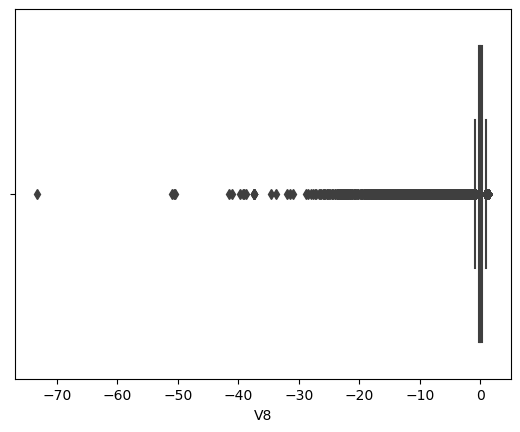

In [89]:
sns.boxplot(data.V8)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


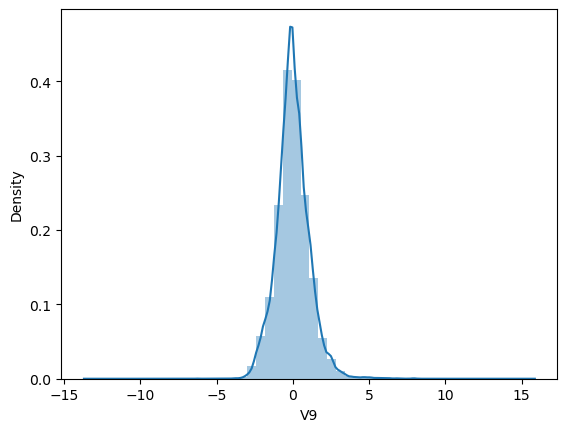

In [90]:
#V9
sns.distplot(data.V9)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


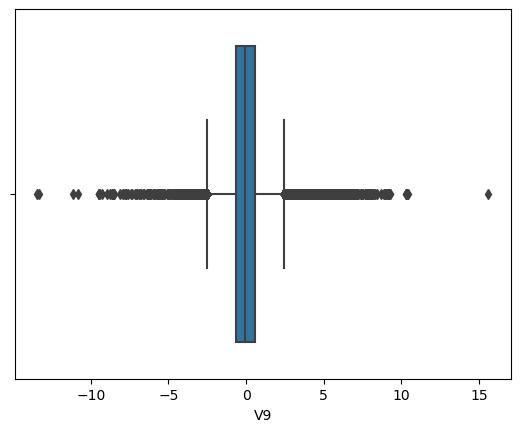

In [91]:
sns.boxplot(data.V9)
plt.show()

In [92]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V9,interpolation='midpoint')
Q1=data.V9.quantile(0.25)
Q3=data.V9.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [93]:
data.loc[data['V9']>max_limit]
data.loc[data['V9']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
321,235.0,-0.663511,0.065486,0.179846,-2.498072,-1.350085,-0.798774,-0.581071,0.480997,-2.517037,0.961802,0.656159,-0.759858,-0.522604,0.213254,-0.782824,0.110467,0.192158,0.695763,-0.569209,-0.357884,-0.051895,0.070846,0.039321,0.275750,-0.330251,-0.423936,0.251989,0.133957,25.00,0
541,406.0,-2.312227,0.065486,0.179846,-0.019847,-0.522188,-1.426545,0.040103,0.022358,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
785,598.0,-0.795188,0.065486,0.179846,-1.869986,-0.054336,1.164821,2.035889,-0.283825,-2.659615,0.817836,1.314244,-1.313787,-1.025164,0.063468,0.161884,-0.380727,0.606071,0.347917,-0.270608,-0.311875,-0.083184,0.146090,0.487813,0.167054,-0.123568,-0.235405,0.199594,-0.113900,605.50,0
800,608.0,-0.290389,0.065486,0.179846,-1.008311,-0.581263,-0.297351,-0.293730,0.012441,-2.980624,1.347653,0.106844,-1.694468,-0.809826,0.291556,1.680190,-2.165105,2.083622,-0.741565,0.891132,-0.126469,-0.027130,0.301992,-0.159177,0.078367,0.164979,0.244876,0.101683,0.067289,15.00,0
1066,810.0,-0.301264,0.065486,0.179846,-1.603294,-0.978847,-0.796556,-0.313462,-0.177172,-2.759665,1.051018,-0.452272,-0.955688,1.067093,-0.477597,0.732674,-0.816483,0.782776,0.146904,0.647283,-0.089143,-0.144515,-0.039137,-0.224903,0.384370,0.241106,-0.074114,0.089497,0.077393,6.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284249,172273.0,0.018109,0.065486,0.179846,-0.019847,-0.054336,23.917837,0.040103,-7.277778,-4.210637,-7.776435,0.214173,-4.499851,0.241005,0.537895,2.901938,2.326099,-0.402142,1.257379,2.008145,2.454553,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0
284589,172582.0,-0.527516,0.065486,0.179846,-2.859174,0.504635,-1.597727,0.308583,-0.060938,-2.920630,0.642626,-1.369306,-0.955256,0.683599,0.373542,-1.098385,-0.716507,0.356402,-0.168691,-0.803375,-0.312450,0.233154,0.673689,-0.049742,0.686058,-0.317749,-0.204956,0.041311,0.056362,42.00,0
284605,172595.0,-0.699032,0.065486,0.179846,0.401974,0.139656,-0.988125,1.686280,-0.159125,-2.595301,0.306732,-1.369968,-0.628364,-0.149753,1.143712,-0.194994,-2.725711,0.620933,1.229533,-0.125729,-0.172033,0.189057,0.683924,-0.050018,-0.017618,0.661579,-0.040537,-0.042537,0.062065,187.00,0
284645,172638.0,-2.521887,0.065486,0.179846,-0.019847,0.103394,0.410173,0.040103,-0.619516,-2.625264,2.078730,-1.086927,-0.910306,0.330327,0.693579,0.409545,-0.755567,0.450094,-0.265879,1.626823,-1.053307,-0.027684,1.038627,-0.592359,0.038390,1.155201,0.856059,-0.970223,-0.698047,302.10,0


In [94]:
print(len(data.loc[data['V9']>max_limit]))
print(len(data.loc[data['V9']<min_limit]))

5844
2439


In [95]:
#max_limit
Max = 5844  /284807 *100
print(Max)
#min_limit
Min = 2439  /284807 *100
print(Min)


2.05191585880965
0.8563694010329803


In [96]:
#Handling outliers in max_limit
data.loc[data['V9']>max_limit,'V9']=np.median(data.V9)
#Handling outliers in min_limit
data.loc[data['V9']<min_limit,'V9']=np.median(data.V9)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


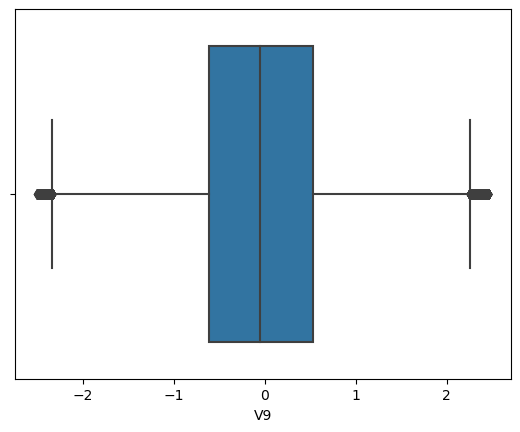

In [97]:
sns.boxplot(data.V9)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


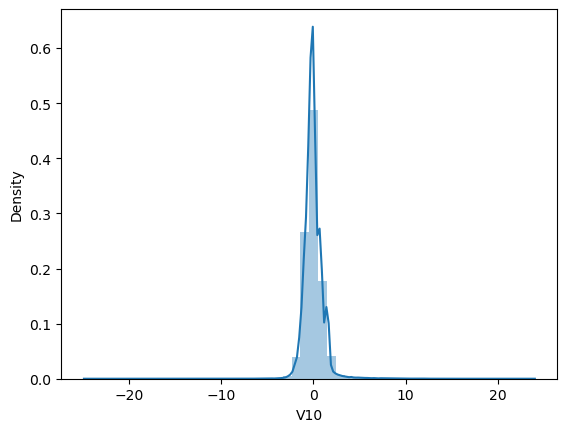

In [98]:
#V10
sns.distplot(data.V10)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


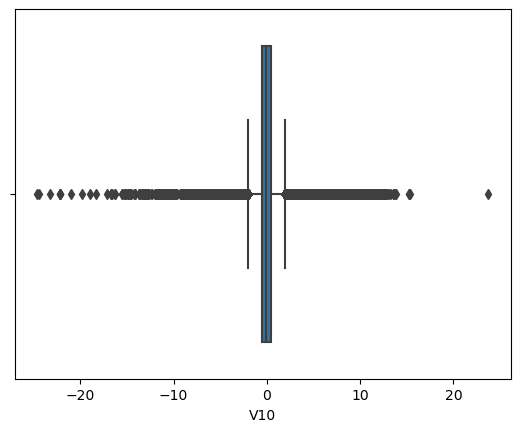

In [99]:
sns.boxplot(data.V10)
plt.show()

In [100]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V10,interpolation='midpoint')
Q1=data.V10.quantile(0.25)
Q3=data.V10.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [101]:
data.loc[data['V10']>max_limit]
data.loc[data['V10']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
472,347.0,-1.531271,0.065486,0.179846,2.175002,-2.137637,-0.501576,-1.215215,0.956862,-1.866561,-2.311024,2.770101,-2.361050,-0.529229,-2.003375,0.619597,-2.489073,-4.887598,-1.069636,1.335540,0.805862,0.557904,0.085267,0.403096,0.454438,0.202522,-0.313118,0.527182,0.202575,204.03,0
541,406.0,-2.312227,0.065486,0.179846,-0.019847,-0.522188,-1.426545,0.040103,0.022358,-0.051429,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
564,422.0,-0.792748,0.065486,0.179846,-0.019847,0.005129,-0.353166,0.362089,0.044961,1.968388,-2.245798,1.034873,1.433988,-0.047105,-0.383137,-0.047075,-0.410726,-0.872548,0.520402,-0.534330,-0.003959,0.325067,1.155921,-0.171941,-0.268315,0.005261,-1.021470,0.014806,-0.077789,60.92,0
764,574.0,-1.062129,0.065486,0.179846,-0.019847,0.746649,-0.540531,0.705932,0.032525,1.334181,-2.326389,-1.277858,0.068234,-0.194686,0.309083,1.902638,-0.513264,-0.567202,0.068316,0.762925,0.311059,-0.114269,-0.661122,0.136250,-1.377245,0.263820,-1.115516,0.079213,0.116638,131.37,0
865,656.0,-1.789835,0.065486,0.179846,-0.851160,-2.433875,0.401415,1.354543,-0.288283,2.426889,-2.395301,-0.929764,0.543359,-0.135978,0.293957,2.237263,-0.678016,0.046163,0.632892,0.460679,3.116559,1.081404,-0.178233,-1.635914,-0.645651,0.112930,-0.726724,-0.184806,0.296762,1602.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284633,172625.0,-1.656560,0.065486,0.179846,0.908557,-0.014432,-0.783958,1.664815,0.163085,-0.401611,-2.067589,-0.713910,-0.460252,-0.580323,-1.491650,0.173918,-0.267065,2.142859,0.891362,0.816187,0.947420,0.242880,-0.111603,0.625198,-0.287188,0.153288,-0.148358,-0.057845,0.042227,387.92,0
284638,172629.0,-1.691097,0.065486,0.179846,-0.496544,0.867330,-1.118658,0.040103,-0.510813,-1.083929,-2.315278,1.845339,-0.544387,-0.880381,-2.839338,-0.648271,1.177497,1.743624,1.601854,-0.880466,1.063067,0.162968,-0.292177,0.422693,-0.209257,1.071036,0.669654,-0.388434,-0.099326,430.00,0
284711,172704.0,-1.034517,0.065486,0.179846,-0.019847,2.062860,3.145858,-0.215357,0.022358,1.167351,-2.132953,-0.307154,0.661705,-0.289781,0.388489,0.440528,0.086353,-0.743689,-0.279581,-0.679592,-0.006052,-0.095626,-0.484040,0.221399,0.662252,-0.425485,-0.780724,0.285122,0.147288,58.42,0
284733,172726.0,-1.353026,0.065486,0.179846,-0.019847,-1.173016,-0.159307,0.040103,-1.544902,1.422788,-2.512103,-0.528871,-0.059281,-1.528962,0.184937,0.059335,-0.975440,-0.249330,-0.488987,-0.037374,-0.639386,0.415421,-0.701799,-0.144663,1.056709,1.074381,-1.129447,0.033781,-0.325899,405.09,0


In [102]:
print(len(data.loc[data['V10']>max_limit]))
print(len(data.loc[data['V10']<min_limit]))

6128
3368


In [103]:
#max_limit
Max = 6128  /284807 *100
print(Max)
#min_limit
Min = 3368  /284807 *100
print(Min)


2.1516325090324324
1.182555204050462


In [104]:
#Handling outliers in max_limit
data.loc[data['V10']>max_limit,'V10']=np.median(data.V10)
#Handling outliers in min_limit
data.loc[data['V10']<min_limit,'V10']=np.median(data.V10)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


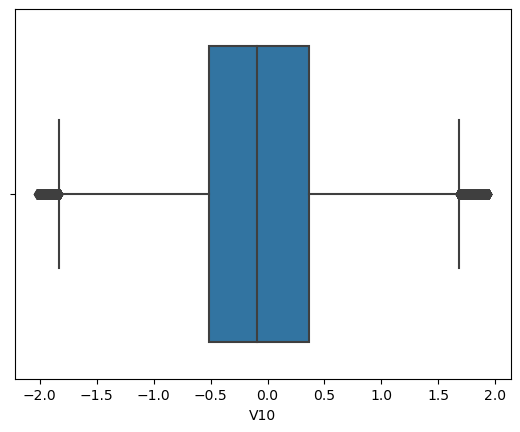

In [105]:
sns.boxplot(data.V10)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


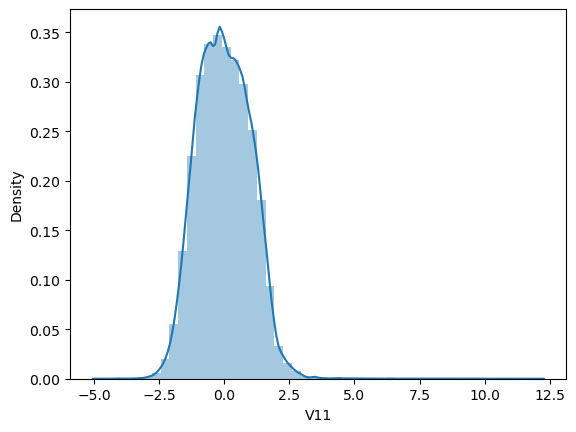

In [106]:
#V11
sns.distplot(data.V11)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


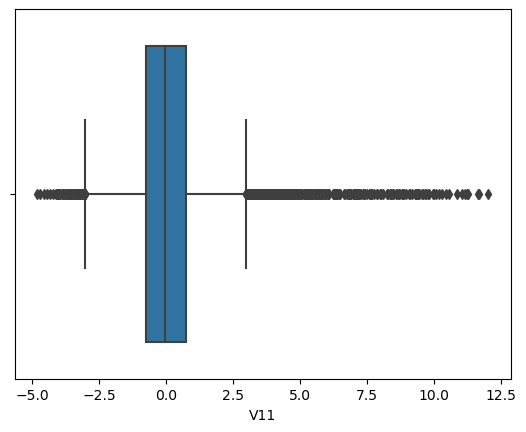

In [107]:
sns.boxplot(data.V11)
plt.show()

In [108]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V11,interpolation='midpoint')
Q1=data.V11.quantile(0.25)
Q3=data.V11.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [109]:
data.loc[data['V11']>max_limit]
data.loc[data['V11']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
37842,39136.0,-1.500094,0.065486,0.179846,3.050414,-1.064690,2.559923,-1.585485,0.022358,0.319029,-0.033299,-3.105965,-0.540201,-0.692046,-0.566875,-0.703183,-0.241027,0.905120,0.484341,1.441991,0.000767,0.104980,0.588264,-0.404477,-1.282803,0.344221,0.663401,0.066619,-0.010856,30.33,0
38432,39392.0,0.018109,0.065486,0.179846,-0.019995,-0.054336,-0.717129,0.040103,0.022358,0.671445,1.140716,-3.316573,2.575442,0.671865,3.661420,-0.623687,1.475435,2.478551,-0.004986,0.132204,-0.861110,1.600419,-1.456519,0.659088,-0.168698,0.960937,0.244592,-1.526675,0.014578,86.14,0
38433,39392.0,0.018109,0.065486,0.179846,-0.019995,-0.054336,-0.717129,0.040103,0.022358,0.671445,1.140716,-3.316573,2.575442,0.671865,3.661420,-0.623687,1.475435,2.478551,-0.004986,0.132204,-0.861110,1.600419,-1.456519,0.659088,-0.168698,0.960937,0.244592,-1.526675,0.014578,86.14,0
38434,39392.0,0.018109,0.065486,0.179846,-0.007268,-0.054336,-0.796661,0.040103,0.022358,0.677903,1.154010,-3.320718,2.586324,0.671405,3.669096,-0.625004,1.466205,2.483898,-0.002908,0.129985,-0.818558,1.615896,-1.465940,0.649719,-0.170366,0.956738,0.241184,-1.556814,0.027315,59.89,0
38435,39392.0,0.018109,0.065486,0.179846,-0.007268,-0.054336,-0.796661,0.040103,0.022358,0.677903,1.154010,-3.320718,2.586324,0.671405,3.669096,-0.625004,1.466205,2.483898,-0.002908,0.129985,-0.818558,1.615896,-1.465940,0.649719,-0.170366,0.956738,0.241184,-1.556814,0.027315,59.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282863,171200.0,0.018109,0.065486,0.179846,-1.110679,-0.054336,-0.274187,0.040103,0.022358,2.323339,-0.092917,-3.712310,3.440374,0.474618,5.630943,0.219504,1.709901,3.214280,0.539777,-1.064368,1.244927,0.401829,0.330268,1.422984,-0.132711,1.285922,-0.048866,0.566245,0.886527,3.82,0
282881,171207.0,0.018109,0.065486,0.179846,-1.126277,-0.054336,-0.274187,0.040103,0.022358,2.345430,-0.092917,-3.837486,3.610583,0.536337,5.876709,0.194939,1.810475,3.374091,0.561676,-1.099734,1.265238,0.414795,0.296912,1.487415,-0.137588,1.361012,-0.042063,0.545297,0.884608,3.82,0
282903,171234.0,0.018109,0.065486,0.179846,-1.141867,-0.054336,-0.274187,0.040103,0.022358,2.367518,-0.092917,-3.962664,3.780793,0.598057,6.122479,0.170371,1.911043,3.533903,0.583581,-1.135103,1.285604,0.427780,0.263553,1.551892,-0.142470,1.436109,-0.035261,0.524327,0.882698,3.82,0
282919,171247.0,0.018109,0.065486,0.179846,-0.907413,-0.054336,-1.251885,0.040103,0.022358,-0.318522,-1.574686,-3.610426,2.639519,0.440806,4.741158,-0.108349,2.234745,2.291200,0.504365,-0.390932,-1.182137,0.517131,-0.942231,1.107292,0.555764,0.509299,-0.338584,-2.650287,-0.633194,0.77,0


In [110]:
print(len(data.loc[data['V11']>max_limit]))
print(len(data.loc[data['V11']<min_limit]))

661
119


In [111]:
#max_limit
Max = 661  /284807 *100
print(Max)
#min_limit
Min = 119  /284807 *100
print(Min)


0.23208699224387042
0.041782680903208136


In [112]:
#Handling outliers in max_limit
data.loc[data['V11']>max_limit,'V11']=np.median(data.V11)
#Handling outliers in min_limit
data.loc[data['V11']<min_limit,'V11']=np.median(data.V11)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


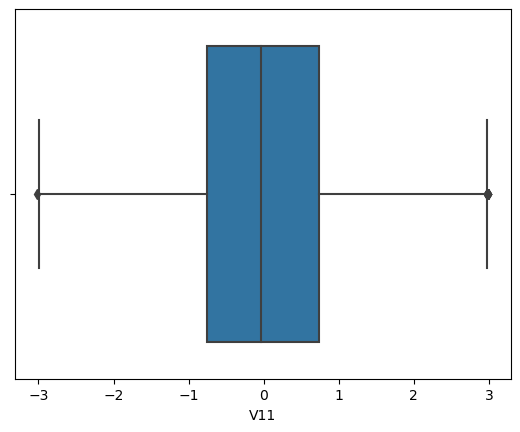

In [113]:
sns.boxplot(data.V11)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


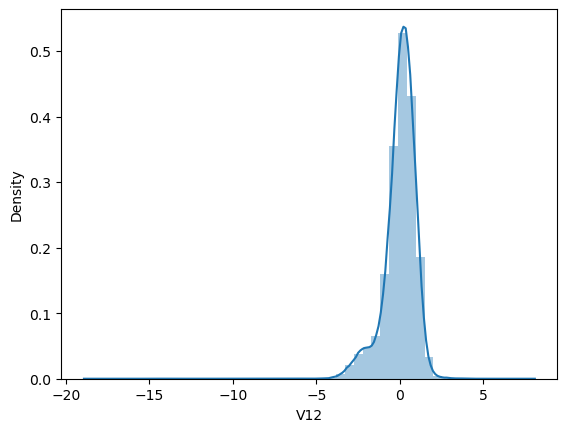

In [114]:
#V12
sns.distplot(data.V12)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


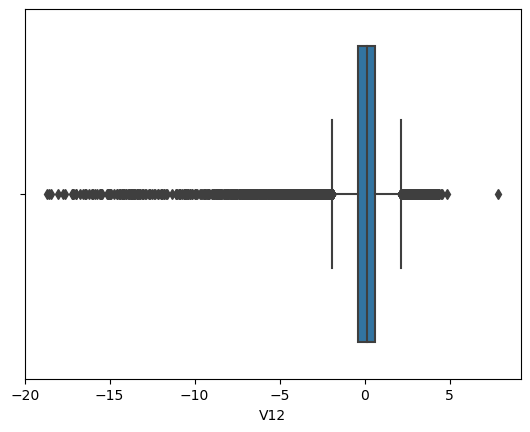

In [115]:
sns.boxplot(data.V12)
plt.show()

In [116]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V12,interpolation='midpoint')
Q1=data.V12.quantile(0.25)
Q3=data.V12.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [117]:
data.loc[data['V12']>max_limit]
data.loc[data['V12']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
460,339.0,0.503302,0.065486,0.179846,2.042940,-1.505946,-1.000185,-1.991363,0.460577,-1.124101,-1.974617,2.946063,-2.149863,-0.646460,-2.238831,0.291704,-2.213303,-5.400014,-1.445389,0.368060,0.166741,0.379925,-0.062191,-0.012187,0.479788,0.531947,-0.441323,0.460792,0.219985,2.00,0
472,347.0,-1.531271,0.065486,0.179846,2.175002,-2.137637,-0.501576,-1.215215,0.956862,-1.866561,-0.092917,2.770101,-2.361050,-0.529229,-2.003375,0.619597,-2.489073,-4.887598,-1.069636,1.335540,0.805862,0.557904,0.085267,0.403096,0.454438,0.202522,-0.313118,0.527182,0.202575,204.03,0
541,406.0,-2.312227,0.065486,0.179846,-0.019847,-0.522188,-1.426545,0.040103,0.022358,-0.051429,-0.092917,-0.032757,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1388,1077.0,-3.936794,0.065486,0.179846,2.299750,-0.054336,6.456410,0.040103,-2.160016,-0.238116,-1.004398,-0.318437,-1.981435,-0.876499,-1.095709,1.132103,1.643440,-0.853990,-0.165445,-0.810785,-2.203676,-0.979104,0.957186,2.441960,0.250607,0.300908,1.157867,1.624284,-1.638647,2452.03,0
2087,1609.0,1.543634,0.065486,0.179846,-1.419308,-1.745581,-0.568448,-1.382715,-0.015119,-1.310657,1.479217,-1.241957,-1.949401,-0.978522,-0.200349,1.056311,0.071756,0.287147,0.670321,-0.241138,-0.421452,-0.115765,0.017759,-0.037355,-0.168240,0.353004,-0.066052,0.041619,0.017620,6.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281657,170338.0,2.352031,0.065486,0.179846,-1.626954,-1.146557,-0.563220,-1.204265,-0.074528,-0.900212,1.643443,-1.658976,-2.065405,-1.680361,0.004188,0.077146,-0.416229,0.512712,0.241112,0.013070,-0.567434,-0.226262,-0.237132,0.263026,0.395878,-0.176719,-0.169564,-0.008387,-0.053939,3.90,0
282360,170844.0,-1.214592,0.065486,0.179846,-2.672004,0.093453,-0.941292,2.114058,-0.570652,-0.051429,0.421592,-1.659796,-2.005117,-0.627355,0.364841,-1.217126,-1.041517,0.419943,0.107716,-0.617661,0.675356,0.467481,0.735142,0.609768,0.448635,0.971752,0.167734,-0.144065,0.147055,453.50,0
284249,172273.0,0.018109,0.065486,0.179846,-0.019847,-0.054336,23.917837,0.040103,-7.277778,-0.051429,-0.092917,0.214173,-4.499851,0.241005,0.537895,2.901938,2.326099,-0.402142,1.257379,2.008145,2.454553,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0
284437,172441.0,-0.335984,0.065486,0.179846,-0.019847,-0.013621,-0.099846,0.135235,-0.161766,-1.859583,0.672595,-2.074680,-2.586842,-1.523976,-0.428699,-0.489557,-0.232762,0.039559,0.399056,-0.382840,-0.363284,-0.296070,-0.430446,-0.475562,0.012548,0.732063,-0.136446,-0.164267,-0.183708,10.00,0


In [118]:
print(len(data.loc[data['V12']>max_limit]))
print(len(data.loc[data['V12']<min_limit]))

769
14579


In [119]:
#max_limit
Max = 769  /284807 *100
print(Max)
#min_limit
Min = 14579  /284807 *100
print(Min)


0.2700074085257736
5.118905083091357


In [120]:
#Handling outliers in max_limit
data.loc[data['V12']>max_limit,'V12']=np.median(data.V12)


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


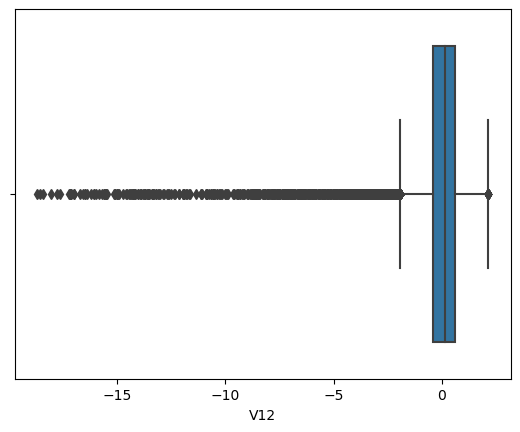

In [121]:
sns.boxplot(data.V12)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


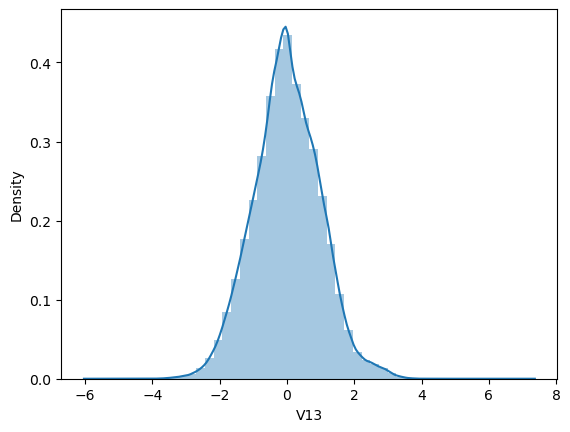

In [122]:
#V13
sns.distplot(data.V13)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


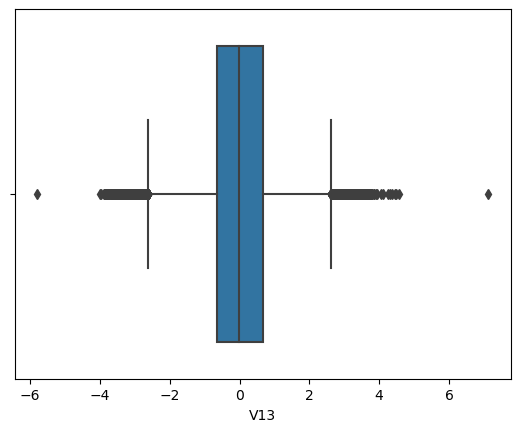

In [123]:
sns.boxplot(data.V13)
plt.show()

In [124]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V13,interpolation='midpoint')
Q1=data.V13.quantile(0.25)
Q3=data.V13.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [125]:
data.loc[data['V13']>max_limit]
data.loc[data['V13']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
343,251.0,-0.238643,0.065486,0.179846,-1.776739,-0.080048,-0.747509,0.404431,-0.103809,-0.753139,0.663143,0.283326,-1.554344,-2.656601,0.111715,-1.366232,1.003229,-0.019346,-0.681442,0.593362,0.108920,0.219065,0.729404,-0.163950,-0.020061,-0.325685,-0.349223,0.203501,-0.005249,24.00,0
1287,997.0,-0.585360,0.065486,0.179846,1.418844,-0.246061,1.210571,0.152464,0.224679,1.067010,0.327309,0.303575,-0.192252,-2.847787,-0.575463,-1.710243,-1.513484,0.836143,-0.331375,1.618474,0.092202,-0.444175,-0.513923,-0.158669,-0.034219,-0.231110,-0.448772,-0.026717,-0.283808,10.81,0
1465,1139.0,0.911963,0.065486,0.179846,1.730688,-1.077334,0.748915,-0.761316,0.573492,1.427352,-0.185620,0.261615,0.139617,-3.389510,0.078596,-2.082444,-0.861610,0.772116,-0.544779,0.389288,-0.284065,-0.351030,-0.844539,0.083551,0.139330,0.245681,-0.535082,0.057588,0.023797,66.60,0
1780,1380.0,-1.501788,0.065486,0.179846,-1.534364,-0.715808,-0.987540,0.437773,0.086034,1.394394,1.344989,1.108243,-0.928591,-3.202718,0.169933,0.248482,0.752449,-0.848063,0.324713,-0.671094,0.505556,-0.290013,-0.437873,0.083163,0.472638,-0.170340,0.698725,0.505433,0.179972,15.38,0
1973,1516.0,-0.839994,0.065486,0.179846,-0.716159,-0.355064,-0.751566,0.508639,0.226261,0.281235,-0.118129,0.769875,-0.406449,-2.673610,0.509601,-0.733307,0.222157,-0.339516,0.124897,-0.023521,-0.009437,-0.186890,-0.446795,-0.027511,0.496648,-0.302872,0.275387,0.389842,0.227719,5.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284349,172361.0,1.996092,0.065486,0.179846,1.430116,0.173194,-1.207430,0.484928,-0.272665,0.602746,0.328861,-1.425741,-1.089944,-2.920747,1.066861,-0.224797,-0.612552,0.025873,-0.330963,-0.210764,-0.439992,0.028963,0.148047,0.016134,-0.079691,0.362227,-0.482248,-0.035043,-0.064975,24.45,0
284359,172375.0,-0.106599,0.065486,0.179846,1.047880,0.523174,0.337209,0.228407,0.246928,0.030372,0.062575,0.170272,-1.380844,-2.892497,-0.526204,0.467457,-0.665721,1.618194,1.523058,3.141483,0.227647,0.043443,0.393717,-0.164809,0.198694,-0.464423,1.022105,0.292956,0.240668,12.50,0
284650,172642.0,-0.536065,0.065486,0.179846,-0.581345,0.276563,-1.220086,0.743952,-0.057902,0.725102,0.117308,-1.555096,-1.569903,-3.081210,0.608138,-0.000790,0.085516,-0.310496,-0.337860,-0.002707,-0.237206,-0.364140,-0.850069,0.316233,-0.207318,-0.477137,0.163041,0.263792,0.110287,8.82,0
284726,172715.0,1.615707,0.065486,0.179846,1.260583,-0.684711,0.234819,-0.643286,0.329931,1.064298,0.394148,0.319164,-0.657936,-2.910623,0.819779,0.511679,0.777601,-0.823437,1.176086,-0.571677,-0.093819,0.336993,0.565339,0.071710,0.613982,-0.276258,-0.618263,0.002865,-0.012795,160.00,0


In [126]:
print(len(data.loc[data['V13']>max_limit]))
print(len(data.loc[data['V13']<min_limit]))

2229
1139


In [127]:
#max_limit
Max = 2229  /284807 *100
print(Max)
#min_limit
Min = 1139  /284807 *100
print(Min)


0.7826352582626129
0.3999199457878493


In [128]:
#Handling outliers in max_limit
data.loc[data['V13']>max_limit,'V13']=np.median(data.V13)
#Handling outliers in min_limit
data.loc[data['V13']<min_limit,'V13']=np.median(data.V13)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


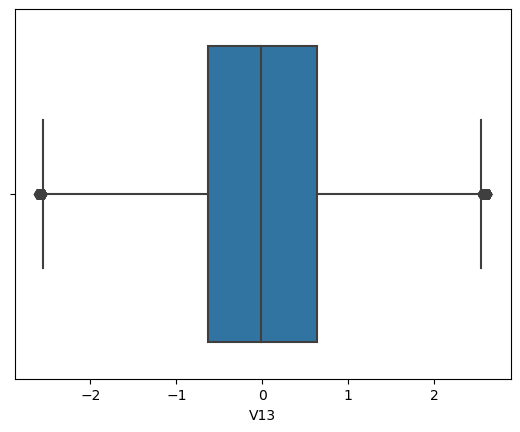

In [129]:
sns.boxplot(data.V13)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


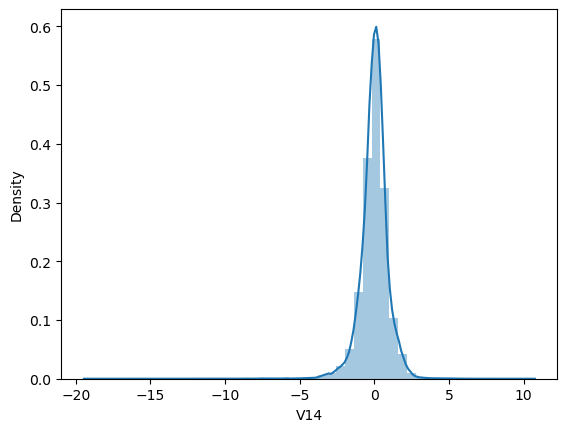

In [130]:
#V14
sns.distplot(data.V14)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


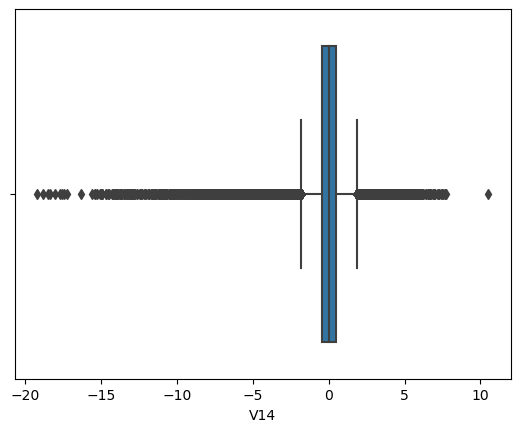

In [131]:
sns.boxplot(data.V14)
plt.show()

In [132]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V14,interpolation='midpoint')
Q1=data.V14.quantile(0.25)
Q3=data.V14.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [133]:
data.loc[data['V14']>max_limit]
data.loc[data['V14']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
82,52.0,-3.005237,0.065486,0.179846,-2.418473,0.306326,-0.824575,2.065426,-1.829347,-0.051429,-0.092917,2.572500,0.066851,-0.353574,-2.837136,0.292227,-0.303774,-1.942303,-0.435450,-0.934016,2.456724,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
102,69.0,0.298503,0.065486,0.179846,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,0.127497,1.612799,-0.096377,0.654790,-4.318378,1.038603,0.404687,2.729168,1.115864,-0.703814,0.676954,-0.290987,-0.000235,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,0
104,69.0,-1.766645,0.065486,0.179846,-0.363736,1.460953,-0.204833,0.905819,-3.384123,0.388546,0.791069,-0.270260,0.047399,1.642767,-2.678081,0.728039,0.289108,0.384463,0.454548,0.113990,0.072645,1.964253,-0.883218,-0.247698,-0.758606,0.086450,0.202790,-0.898858,-0.944337,0.76,0
108,73.0,1.162281,0.065486,0.179846,1.475024,1.138357,-1.020373,0.638387,-0.136762,-0.805505,-1.444036,2.846914,0.627549,0.387778,-3.279054,0.553435,0.910634,2.698337,1.302963,-0.910149,-0.016800,-0.124012,-0.227150,-0.199185,-0.289757,0.776244,-0.283950,0.056747,0.084706,1.00,0
146,92.0,0.018109,0.065486,0.179846,-1.427842,-0.621533,-0.604691,0.437866,0.336384,-0.051429,-0.092917,1.401383,0.667167,0.314682,-1.860653,0.558542,0.314815,-0.701308,0.206092,-0.208238,2.962484,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284662,172653.0,-0.294488,0.065486,0.179846,0.946303,2.125940,0.052208,1.068577,-0.168164,-0.642874,-0.420292,1.108159,0.320111,0.882107,-2.269694,0.221177,0.635063,0.869358,1.304767,0.829149,0.306328,-0.429518,-0.890954,0.131686,-0.454937,0.254550,-0.745536,-0.002814,-0.184276,38.10,0
284669,172662.0,1.881521,0.065486,0.179846,-0.019847,1.282432,-0.164267,0.404690,-0.033758,-1.450298,0.444524,1.201380,0.375957,0.650915,-2.491123,-1.321807,1.878477,1.028849,0.822784,-1.380334,-0.148700,-0.384278,-1.057652,0.248409,-0.762209,-0.218859,-0.333818,0.001098,0.004853,4.73,0
284721,172710.0,-2.516013,0.065486,0.179846,-0.621718,0.596987,-1.384147,1.579089,-1.314013,1.618929,-0.092917,0.492104,0.351730,1.156920,-2.276737,0.803360,-0.700136,0.210951,0.100225,-0.380641,0.366304,0.288237,1.314473,-0.176766,0.356307,-0.516441,-0.450529,-1.984913,-0.222766,7.45,0
284758,172745.0,1.911377,0.065486,0.179846,-0.019847,1.029442,-0.727610,0.500745,-0.198614,-1.140565,0.295649,-0.397161,-0.481371,0.260047,-2.591114,-0.639052,1.688021,1.339588,0.388179,-1.690433,-0.185466,-0.429116,-1.184198,0.288661,-0.418323,-0.222729,-0.335830,-0.001158,0.017556,6.75,0


In [134]:
print(len(data.loc[data['V14']>max_limit]))
print(len(data.loc[data['V14']<min_limit]))

5392
8757


In [135]:
#max_limit
Max = 5392  /284807 *100
print(Max)
#min_limit
Min = 8757  /284807 *100
print(Min)


1.8932118943705736
3.0747137535243163


In [136]:
#Handling outliers in max_limit
data.loc[data['V14']>max_limit,'V14']=np.median(data.V14)
#Handling outliers in min_limit
data.loc[data['V14']<min_limit,'V14']=np.median(data.V14)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


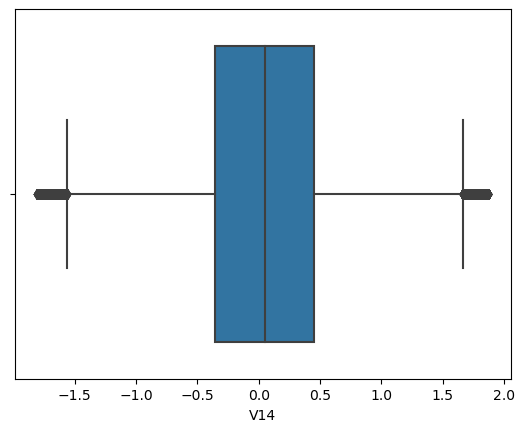

In [137]:
sns.boxplot(data.V14)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


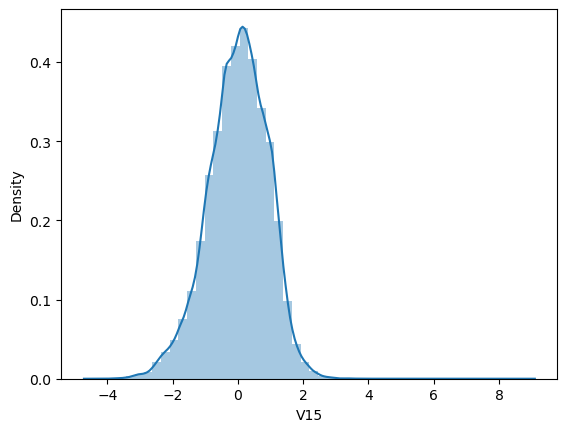

In [138]:
#V15
sns.distplot(data.V15)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


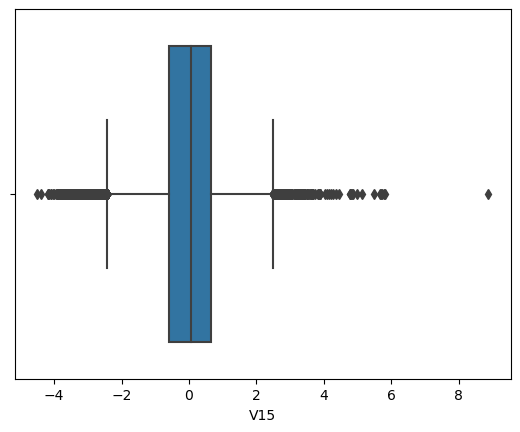

In [139]:
sns.boxplot(data.V15)
plt.show()

In [140]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V15,interpolation='midpoint')
Q1=data.V15.quantile(0.25)
Q3=data.V15.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [141]:
data.loc[data['V15']>max_limit]
data.loc[data['V15']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
180,117.0,0.805682,0.065486,0.179846,-0.019847,-0.844073,2.546394,-1.435114,0.942048,0.330468,0.831881,0.312993,1.017932,-0.439618,-1.000777,-2.431499,0.098856,0.261188,-0.496636,-1.518757,-0.197554,0.185844,0.916783,-0.075911,-0.243420,0.246029,0.283515,0.113704,0.031697,37.89,0
218,144.0,-1.032940,0.065486,0.179846,-0.529928,0.869578,1.903301,0.033240,-0.237815,0.844582,-0.989005,-1.306165,1.047654,-0.075454,-0.899501,-3.618060,0.086958,-0.723274,-0.339748,-0.489337,-0.520240,0.411651,-0.941007,-0.157833,-1.735297,-0.026033,-0.814974,0.094762,0.126906,15.36,0
238,158.0,-0.159985,0.065486,0.179846,-1.048128,-1.083456,0.254357,-0.782937,0.264002,0.404509,-0.232304,-2.093168,0.465104,0.650496,-1.514492,-2.534978,-1.786803,0.291461,0.851936,-0.564584,-0.510185,-0.365404,-0.127932,0.163176,0.104227,-1.286765,0.747625,0.241777,0.237056,10.00,0
306,221.0,-0.342871,0.065486,0.179846,-0.003495,-1.170366,0.883501,-0.151879,0.160106,0.137973,-0.060122,-2.201009,0.852035,1.478893,-1.653727,-2.750145,-1.814002,-0.021558,1.102767,-1.018304,-0.572162,-0.313443,0.086207,0.109600,-0.098951,-0.943009,-0.618657,0.253306,0.240271,99.82,0
370,270.0,-1.356935,0.065486,0.179846,-1.469102,-0.054336,1.677056,0.040103,-7.494658,-1.278470,-1.118778,-1.777745,-0.233932,-1.835762,-0.187562,-2.594957,-0.438051,1.682071,-0.129589,-0.924229,1.394631,-4.134608,0.864378,0.153499,0.669049,1.108159,-0.120671,0.043393,0.237636,52.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284443,172448.0,1.753709,0.065486,0.179846,-0.019847,0.227187,1.120957,-0.343035,0.287463,-0.447554,1.377595,0.021848,0.924441,0.129292,-0.311604,-2.843271,0.441773,-0.536780,-0.110004,-0.992914,-0.184714,0.149534,0.615646,0.071545,0.726058,0.069507,0.082725,-0.007613,-0.041388,44.03,0
284534,172536.0,-0.049074,0.065486,0.179846,-1.161604,0.053972,0.965679,-0.261672,0.746428,-0.641100,-0.030180,-1.449850,-0.123575,-1.132004,0.100606,-2.699893,-1.565135,0.015213,1.372796,0.258319,-0.691970,-0.649006,-1.387783,0.144526,-0.543847,-0.346684,0.055995,-0.115062,-0.078724,37.60,0
284542,172543.0,-0.909722,0.065486,0.179846,-0.019847,-2.216835,2.656914,0.040103,0.099503,-1.175961,-0.058353,-2.301803,-0.252673,0.484030,-0.448892,-2.611365,0.729781,-0.520139,-0.063853,-1.436400,-0.200818,0.287250,1.039311,0.286808,0.531633,0.263987,0.221902,0.053983,-0.229425,707.21,0
284569,172566.0,-0.816705,0.065486,0.179846,2.531436,1.898396,-0.107567,1.746244,-0.358109,-2.417862,1.217739,0.162771,0.549730,0.896154,0.317498,-2.509606,0.421246,-1.089699,-0.160885,-1.067497,-0.318684,0.270867,0.778252,-0.499873,-0.285494,0.121381,0.056686,-0.246874,0.140924,35.74,0


In [142]:
print(len(data.loc[data['V15']>max_limit]))
print(len(data.loc[data['V15']<min_limit]))

429
2465


In [143]:
#max_limit
Max = 429  /284807 *100
print(Max)
#min_limit
Min = 2465  /284807 *100
print(Min)


0.1506283202308932
0.8654983901378829


In [144]:
#Handling outliers in max_limit
data.loc[data['V15']>max_limit,'V15']=np.median(data.V15)
#Handling outliers in min_limit
data.loc[data['V15']<min_limit,'V15']=np.median(data.V15)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


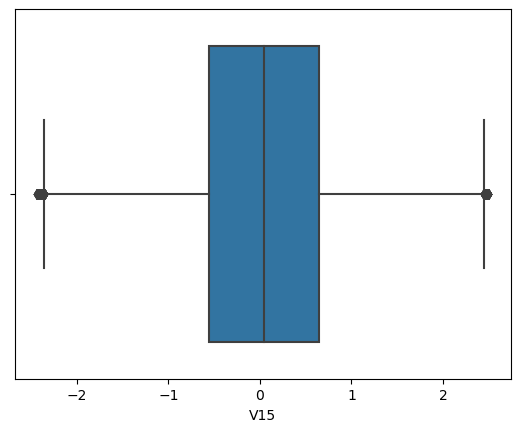

In [145]:
sns.boxplot(data.V15)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


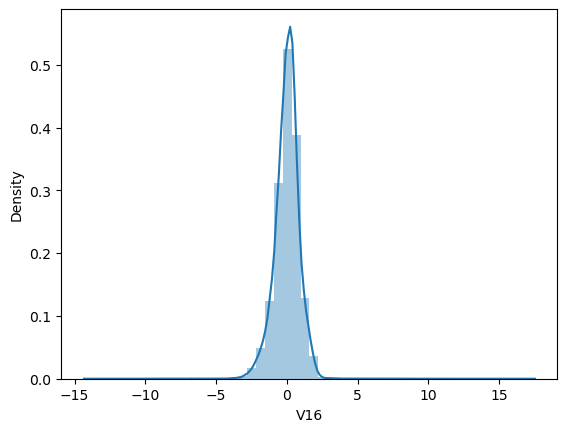

In [146]:
#V16
sns.distplot(data.V16)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


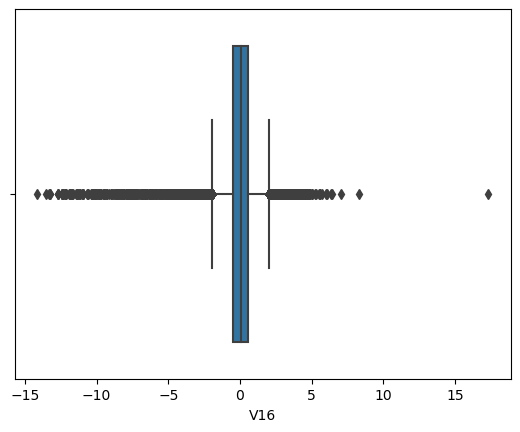

In [147]:
sns.boxplot(data.V16)
plt.show()

In [148]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V16,interpolation='midpoint')
Q1=data.V16.quantile(0.25)
Q3=data.V16.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [149]:
data.loc[data['V16']>max_limit]
data.loc[data['V16']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1.0,-1.358354,0.065486,0.179846,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
20,16.0,0.694885,0.065486,0.179846,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,0.568521,1.019151,1.298329,0.420480,-0.372651,-0.807980,-2.044557,0.515663,0.625847,-1.300408,-0.138334,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0
83,53.0,-1.198968,0.065486,0.179846,-0.019847,0.327567,-0.174469,0.959726,-1.026456,1.700435,-0.078942,1.662667,0.485619,-0.933025,-1.118787,0.141253,-2.811888,-0.504746,0.891223,-1.512022,-0.769854,-0.453169,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0
171,110.0,-1.276830,0.065486,0.179846,-2.582626,0.635981,-0.866537,1.138067,-0.924605,-0.221504,0.096649,0.982598,0.737271,0.521465,-0.625923,-0.564183,-2.444885,-0.533631,1.577350,0.100918,-0.431083,-0.482119,-0.182518,-0.614101,0.037650,0.793080,-0.724708,-0.616486,-0.485985,110.40,0
172,110.0,-0.591933,0.065486,0.179846,-1.536074,1.193208,0.648896,0.796706,0.016904,0.789664,-1.246228,0.555350,1.089024,0.361766,-0.021520,1.433861,-2.627095,1.176812,-2.157672,-0.567089,-0.176300,0.205964,1.216195,0.093396,-0.900310,-0.423966,-0.607857,0.017705,-0.076746,13.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284508,172510.0,1.962485,0.065486,0.179846,-3.094987,0.461986,0.545314,-0.227281,0.055404,0.404057,-0.409601,1.432065,1.742115,0.901626,0.610947,1.092747,-3.513308,0.653742,0.309254,-0.394499,-0.462002,-0.075606,0.428496,0.029772,-0.704251,0.169481,-0.640608,0.069387,-0.060220,91.38,0
284567,172564.0,1.798595,0.065486,0.179846,-0.856260,0.152041,-1.279133,0.829545,-0.686897,-1.155192,0.814593,-0.964182,-0.101433,0.452053,0.624856,-0.241260,-2.231099,0.245157,0.450009,-0.567047,-0.038685,0.022389,0.108803,-0.265672,0.732954,0.307565,1.587784,-0.217270,-0.050993,265.66,0
284605,172595.0,-0.699032,0.065486,0.179846,0.401974,0.139656,-0.988125,1.686280,-0.159125,-0.051429,0.306732,-1.369968,-0.628364,-0.149753,1.143712,-0.194994,-2.725711,0.620933,1.229533,-0.125729,-0.172033,0.189057,0.683924,-0.050018,-0.017618,0.661579,-0.040537,-0.042537,0.062065,187.00,0
284634,172627.0,-0.071308,0.065486,0.179846,-0.019847,2.078401,2.710189,-0.515071,1.087521,0.106303,-0.779678,-0.742165,0.311244,-0.025561,0.542678,-0.033667,-2.226914,-0.193074,1.372231,-1.043273,-0.758069,0.249488,1.172163,0.183493,0.743429,-1.508628,-0.345090,0.141739,0.271248,15.13,0


In [150]:
print(len(data.loc[data['V16']>max_limit]))
print(len(data.loc[data['V16']<min_limit]))

1663
6521


In [151]:
#max_limit
Max = 1663  /284807 *100
print(Max)
#min_limit
Min = 6521  /284807 *100
print(Min)


0.5839041877481943
2.2896206905026912


In [152]:
#Handling outliers in max_limit
data.loc[data['V16']>max_limit,'V16']=np.median(data.V16)
#Handling outliers in min_limit
data.loc[data['V16']<min_limit,'V16']=np.median(data.V16)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


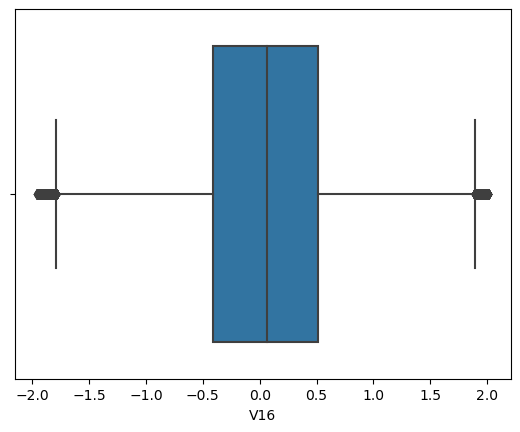

In [153]:
sns.boxplot(data.V16)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


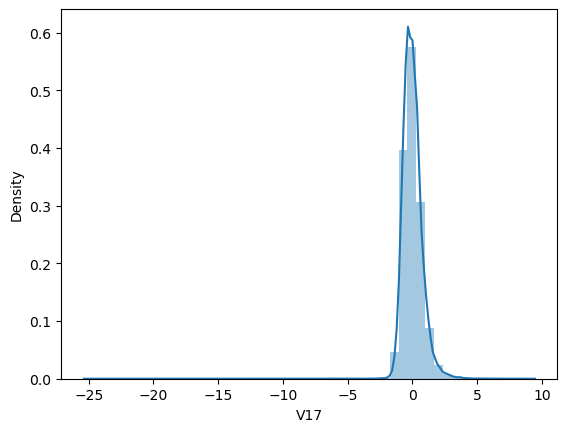

In [154]:
#V17
sns.distplot(data.V17)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


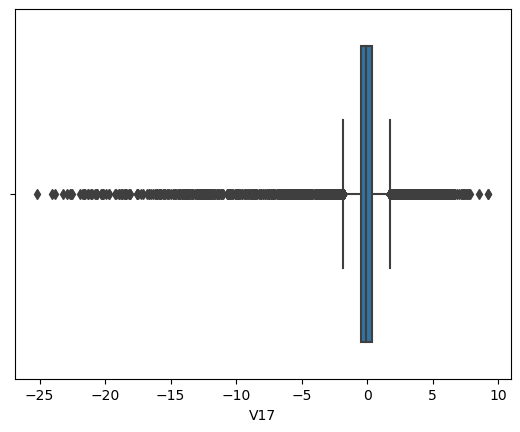

In [155]:
sns.boxplot(data.V17)
plt.show()

In [156]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V17,interpolation='midpoint')
Q1=data.V17.quantile(0.25)
Q3=data.V17.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [157]:
data.loc[data['V17']>max_limit]
data.loc[data['V17']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
82,52.0,-3.005237,0.065486,0.179846,-2.418473,0.306326,-0.824575,2.065426,-1.829347,-0.051429,-0.092917,2.572500,0.066851,-0.353574,0.050601,0.292227,-0.303774,-1.942303,-0.435450,-0.934016,2.456724,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
362,266.0,-2.564961,0.065486,0.179846,-1.564256,1.794297,-0.614742,0.040103,-3.855359,-0.051429,-0.092917,1.682963,-1.309536,-0.052481,0.050601,1.608141,-1.666078,-2.435921,-1.169402,-0.428482,3.564138,-1.672706,-0.463149,-0.532466,0.306494,0.226844,-0.365416,-0.936735,-2.733887,10.35,0
460,339.0,0.503302,0.065486,0.179846,2.042940,-1.505946,-1.000185,-1.991363,0.460577,-1.124101,-1.974617,2.946063,-2.149863,-0.646460,0.050601,0.291704,0.066413,-5.400014,-1.445389,0.368060,0.166741,0.379925,-0.062191,-0.012187,0.479788,0.531947,-0.441323,0.460792,0.219985,2.00,0
472,347.0,-1.531271,0.065486,0.179846,2.175002,-2.137637,-0.501576,-1.215215,0.956862,-1.866561,-0.092917,2.770101,-2.361050,-0.529229,0.050601,0.619597,0.066413,-4.887598,-1.069636,1.335540,0.805862,0.557904,0.085267,0.403096,0.454438,0.202522,-0.313118,0.527182,0.202575,204.03,0
541,406.0,-2.312227,0.065486,0.179846,-0.019847,-0.522188,-1.426545,0.040103,0.022358,-0.051429,-0.092917,-0.032757,-2.899907,-0.595222,0.050601,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281144,169966.0,-3.113832,0.065486,0.179846,1.817092,-0.840618,-0.274187,-2.208002,1.058733,-1.632333,-0.092917,1.933520,-5.030465,-1.127455,0.050601,0.141237,0.066413,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281195,170000.0,-0.692223,0.065486,0.179846,1.863658,0.604276,0.924208,0.369256,0.103747,-0.564672,0.497915,-2.116398,-0.545721,0.744039,-1.064842,-1.118816,0.066413,-2.094466,0.537422,-2.996969,-0.213035,0.232574,0.775212,-0.238325,-0.687632,-0.431247,-0.263400,-0.126797,-0.040028,12.13,0
284085,172140.0,-2.210521,0.065486,0.179846,-1.291932,-0.054336,-1.665061,0.040103,-2.324089,0.364926,1.582486,1.099928,0.015128,0.071182,-1.056637,-1.611600,-0.609454,-1.876089,-0.411326,-0.556234,-0.818118,-0.286359,1.326003,-0.361764,-0.268117,1.051309,0.334629,-1.930149,-0.899888,0.00,0
284393,172401.0,0.018109,0.065486,0.179846,-2.340542,1.680291,-0.634889,0.040103,-2.874886,-0.051429,-0.092917,2.428554,-0.262725,0.111960,0.050601,0.612442,0.066413,-2.531644,-0.182970,-0.188422,3.715161,-1.182248,1.511540,-0.372606,-0.430795,-0.079541,-0.715266,-1.310732,-3.320889,0.89,0


In [158]:
print(len(data.loc[data['V17']>max_limit]))
print(len(data.loc[data['V17']<min_limit]))

6663
757


In [159]:
#max_limit
Max = 6663  /284807 *100
print(Max)
#min_limit
Min = 757  /284807 *100
print(Min)


2.3394790156140823
0.2657940289388955


In [160]:
#Handling outliers in max_limit
data.loc[data['V17']>max_limit,'V17']=np.median(data.V17)
#Handling outliers in min_limit
data.loc[data['V17']<min_limit,'V17']=np.median(data.V17)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


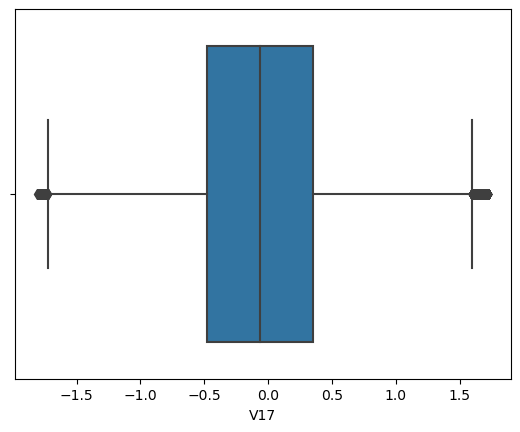

In [161]:
sns.boxplot(data.V17)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


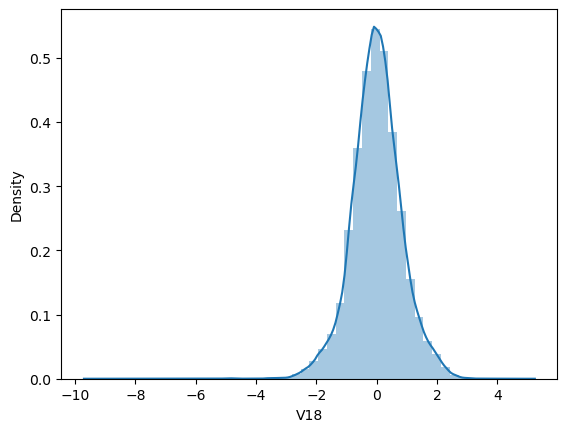

In [162]:
#V18
sns.distplot(data.V18)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


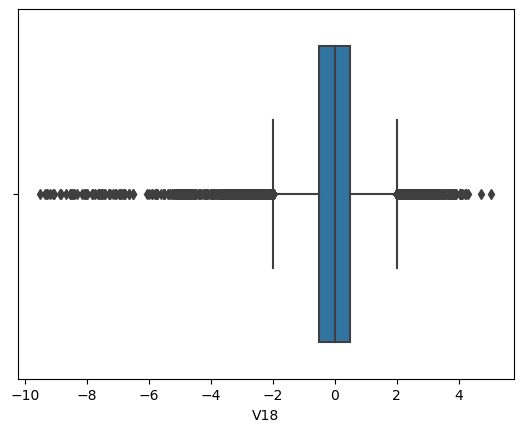

In [163]:
sns.boxplot(data.V18)
plt.show()

In [164]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V18,interpolation='midpoint')
Q1=data.V18.quantile(0.25)
Q3=data.V18.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [165]:
data.loc[data['V18']>max_limit]
data.loc[data['V18']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
38,29.0,0.996370,0.065486,0.179846,0.706580,0.134560,1.156995,-0.294561,0.407429,0.337863,-0.408150,0.682646,1.253720,0.391917,-0.037511,0.795302,-1.668211,1.322995,-2.830035,-1.463432,-0.203461,-0.076302,0.108867,0.162231,-0.575624,0.109795,0.373813,0.050552,0.005106,20.53,0
68,44.0,0.927060,0.065486,0.179846,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,-0.225495,1.944545,1.385160,-0.479262,0.314166,0.214167,-1.333716,1.002869,-2.119314,-1.053043,-0.185390,-0.040513,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,45.71,0
96,64.0,0.959602,0.065486,0.179846,2.343244,0.352491,1.365515,-0.277771,0.516053,-0.700929,0.468216,0.745612,0.373531,-0.223918,0.417438,1.678400,-0.515702,0.662479,-2.514235,-2.589688,-0.298405,-0.155547,-0.403239,0.356504,-0.696881,-0.198718,-0.220268,0.068546,0.020797,7.55,0
112,74.0,1.038370,0.065486,0.179846,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
113,74.0,1.038370,0.065486,0.179846,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,0.578063,0.674730,-0.534231,0.446601,1.122885,-1.768001,1.241157,-2.449500,-1.747255,-0.335520,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283976,172050.0,-0.088675,0.065486,0.179846,-0.572043,1.476196,0.164641,0.495015,0.183462,-0.127878,-0.655962,-0.195911,0.791939,0.621839,0.126818,0.300605,-1.037075,0.411423,-2.242382,-1.248558,-0.145707,-0.057043,-0.078213,0.340945,-1.024397,-1.045342,0.159987,0.067089,0.045299,9.99,0
284297,172312.0,1.944069,0.065486,0.179846,0.155229,0.802930,0.811877,-0.106648,0.218693,0.589631,-0.086925,-0.264287,0.562113,-0.179947,0.343422,0.661416,-1.140656,0.655467,-2.255794,-0.895910,-0.311713,-0.176625,-0.263084,0.403805,-0.337542,-0.399494,0.344410,-0.025605,-0.069121,1.18,0
284411,172421.0,-0.915873,0.065486,0.179846,-0.416929,1.692688,0.358572,-0.049294,0.744572,-0.187957,-0.914471,-0.575927,0.723263,0.276626,0.520642,0.123022,-0.990743,0.669552,-2.095718,-1.181229,0.004235,0.086891,-0.108469,0.356023,-0.328724,-0.921484,0.199731,-0.044946,-0.183722,40.16,0
284625,172619.0,-0.446997,0.065486,0.179846,-0.719547,0.804594,0.374565,0.416592,0.643698,-0.302810,-0.790555,-0.317613,0.855832,0.582754,0.405682,0.317823,-0.927609,0.607746,-2.213708,-1.230098,-0.208396,-0.124779,-0.179656,0.201957,-1.025398,-0.674657,0.238731,0.179984,0.019549,1.98,0


In [166]:
print(len(data.loc[data['V18']>max_limit]))
print(len(data.loc[data['V18']<min_limit]))

3547
3986


In [167]:
#max_limit
Max = 3547  /284807 *100
print(Max)
#min_limit
Min = 3986  /284807 *100
print(Min)


1.245404782888061
1.399544252774686


In [168]:
#Handling outliers in max_limit
data.loc[data['V18']>max_limit,'V18']=np.median(data.V18)
#Handling outliers in min_limit
data.loc[data['V18']<min_limit,'V18']=np.median(data.V18)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


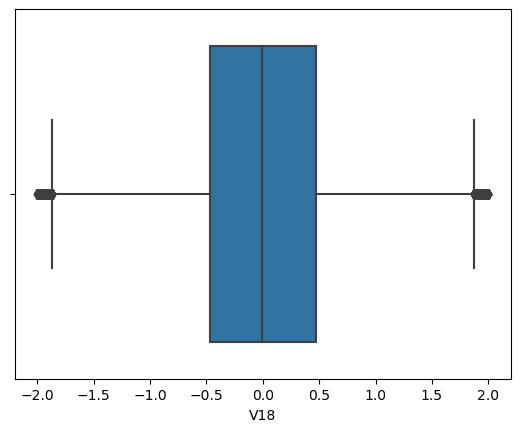

In [169]:
sns.boxplot(data.V18)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


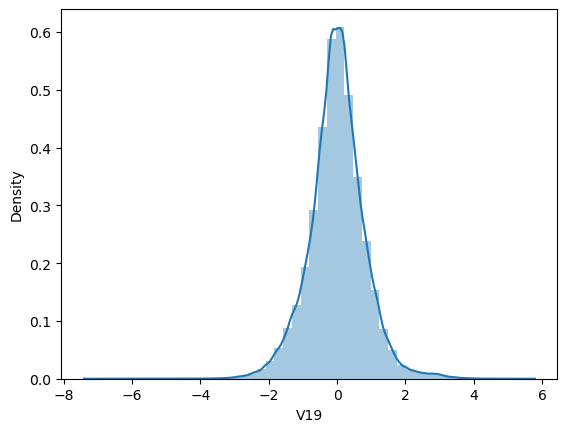

In [170]:
#V19
sns.distplot(data.V19)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


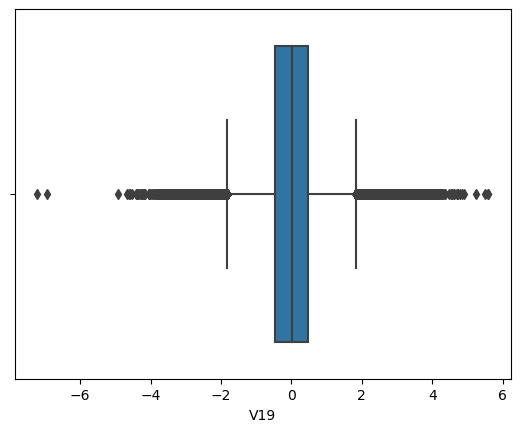

In [171]:
sns.boxplot(data.V19)
plt.show()

In [172]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V19,interpolation='midpoint')
Q1=data.V19.quantile(0.25)
Q3=data.V19.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [173]:
data.loc[data['V19']>max_limit]
data.loc[data['V19']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2,1.0,-1.358354,0.065486,0.179846,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,0.066413,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
21,17.0,0.962496,0.065486,0.179846,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,0.724396,1.690330,0.406774,-0.936421,0.983739,0.710911,-0.602232,0.402484,-1.737162,-2.027612,-0.269321,0.143997,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,34.09,0
96,64.0,0.959602,0.065486,0.179846,2.343244,0.352491,1.365515,-0.277771,0.516053,-0.700929,0.468216,0.745612,0.373531,-0.223918,0.417438,1.678400,-0.515702,0.662479,-0.003636,-2.589688,-0.298405,-0.155547,-0.403239,0.356504,-0.696881,-0.198718,-0.220268,0.068546,0.020797,7.55,0
282,200.0,-1.269461,0.065486,0.179846,-0.504356,0.693421,1.237761,0.056065,0.091919,-0.676680,0.330000,0.426491,0.485360,0.795882,-0.910867,0.715259,0.066413,0.679419,-0.700313,-3.463993,-0.527727,-0.131777,0.697266,0.288501,-0.644487,0.027409,-0.329714,-0.291795,-0.381556,79.00,0
351,259.0,-1.569485,0.065486,0.179846,-0.019847,1.244282,0.402688,-0.649554,0.534756,0.886183,-1.275649,1.525304,1.286995,-0.303788,-0.149255,0.514474,0.066413,0.471588,0.110395,-2.321077,-0.178911,-0.074659,0.397405,0.199030,-1.386013,-0.141955,-0.984011,0.274079,-0.019784,55.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284585,172580.0,-0.074840,0.065486,0.179846,2.521202,1.442827,0.088881,1.177707,-0.047561,-1.820574,0.852848,-1.647761,-1.005171,-0.332645,0.382239,-0.789477,0.991900,-1.151571,0.084898,-1.858090,-0.240863,0.354139,0.924443,-0.133259,0.555131,-0.646728,-0.060269,0.184382,0.238619,4.57,0
284637,172628.0,1.692734,0.065486,0.179846,-0.019847,0.232082,1.758812,-0.754646,0.543065,-0.281540,1.222369,-0.666347,0.140146,0.144850,-0.205971,0.219204,0.228928,-0.017153,-1.376126,-2.941829,-0.343786,0.329740,1.161546,0.231505,-0.972405,-0.425902,0.178948,0.067600,-0.039759,22.39,0
284660,172652.0,-2.165733,0.065486,0.179846,-0.121641,0.112346,1.064932,-0.139251,1.267207,-0.518985,-1.481521,-0.624850,0.596224,0.431871,0.474131,0.920927,-0.063993,0.199717,-0.983239,-2.472120,-0.462680,0.410676,1.011145,-0.153586,-0.966284,0.632382,-0.434475,-0.176141,-0.229667,50.00,0
284693,172688.0,-0.973245,0.065486,0.179846,-0.018750,0.823960,-1.830569,1.632718,-0.263931,-0.343031,-0.894438,-0.820745,-0.609932,-2.288178,0.762907,-1.462935,-0.445706,-0.251323,-0.677451,-1.835802,-0.208682,0.221751,0.353157,0.037998,0.798246,0.261837,-0.820848,0.052709,0.161392,89.90,0


In [174]:
print(len(data.loc[data['V19']>max_limit]))
print(len(data.loc[data['V19']<min_limit]))

5142
5063


In [175]:
#max_limit
Max = 5142  /284807 *100
print(Max)
#min_limit
Min = 5063  /284807 *100
print(Min)


1.8054331529772796
1.7776950706969983


In [176]:
#Handling outliers in max_limit
data.loc[data['V19']>max_limit,'V19']=np.median(data.V19)
#Handling outliers in min_limit
data.loc[data['V19']<min_limit,'V19']=np.median(data.V19)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


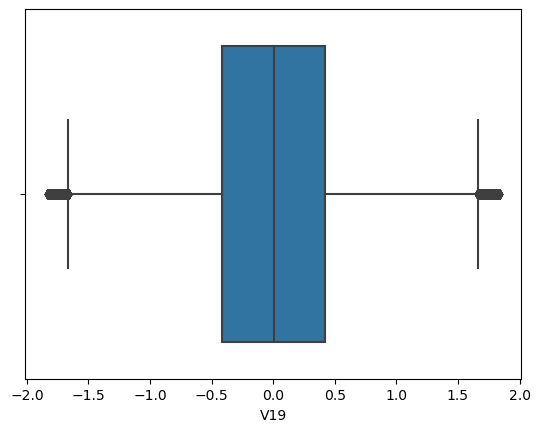

In [177]:
sns.boxplot(data.V19)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


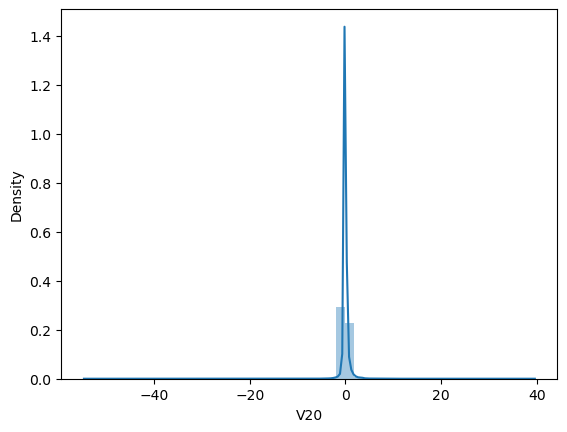

In [178]:
#V20
sns.distplot(data.V20)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


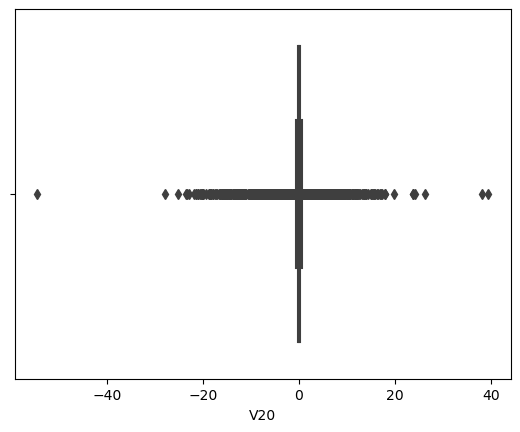

In [179]:
sns.boxplot(data.V20)
plt.show()

In [180]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V20,interpolation='midpoint')
Q1=data.V20.quantile(0.25)
Q3=data.V20.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [181]:
data.loc[data['V20']>max_limit]
data.loc[data['V20']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
14,12.0,-2.791855,0.065486,0.179846,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,1.151087,0.844555,0.792944,0.370448,-0.734975,0.406796,-0.303058,-0.155869,0.778265,0.003735,-1.582122,1.151663,0.222182,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0
18,14.0,0.018109,0.065486,0.179846,1.736239,-0.054336,-1.763406,-1.559738,0.160842,1.233090,0.345173,0.917230,0.970117,-0.266568,-0.479130,-0.526609,0.472004,-0.725481,0.075081,-0.406867,-2.196848,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0
83,53.0,-1.198968,0.065486,0.179846,-0.019847,0.327567,-0.174469,0.959726,-1.026456,1.700435,-0.078942,1.662667,0.485619,-0.933025,-1.118787,0.141253,0.066413,-0.504746,0.891223,-1.512022,-0.769854,-0.453169,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0
85,55.0,0.018109,0.065486,0.179846,0.903915,-0.054336,-0.491078,0.040103,0.666451,1.922216,-0.614312,0.384927,1.194403,-1.020718,-1.246829,-2.348673,-0.213438,-0.100222,-0.406073,-1.637573,-0.960963,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
122,78.0,-0.622478,0.065486,0.179846,-1.644574,-0.538265,-0.835528,0.517234,-1.105962,-1.311741,0.577468,0.894683,-0.685603,-1.860226,0.510701,-0.452340,-1.145575,-0.323950,1.462413,-0.986003,-0.756577,0.418819,-0.762122,-0.098940,0.502973,-0.655251,0.743419,-0.020568,-0.118060,104.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284634,172627.0,-0.071308,0.065486,0.179846,-0.019847,2.078401,2.710189,-0.515071,1.087521,0.106303,-0.779678,-0.742165,0.311244,-0.025561,0.542678,-0.033667,0.066413,-0.193074,1.372231,-1.043273,-0.758069,0.249488,1.172163,0.183493,0.743429,-1.508628,-0.345090,0.141739,0.271248,15.13,0
284645,172638.0,-2.521887,0.065486,0.179846,-0.019847,0.103394,0.410173,0.040103,-0.619516,-0.051429,-0.092917,-1.086927,-0.910306,0.330327,0.693579,0.409545,-0.755567,0.450094,-0.265879,1.626823,-1.053307,-0.027684,1.038627,-0.592359,0.038390,1.155201,0.856059,-0.970223,-0.698047,302.10,0
284672,172665.0,-1.107642,0.065486,0.179846,0.191009,-0.748875,1.023729,-1.585121,-1.457420,0.602547,-0.370154,-0.143963,0.628076,-0.464463,0.165097,-0.274170,1.180598,-0.932230,1.436290,-0.735660,-0.828838,2.684859,0.308346,0.258116,-0.548003,-0.493519,-0.628467,0.150129,0.016900,0.01,0
284735,172727.0,-1.661169,0.065486,0.179846,-1.549156,-2.301359,2.365956,-0.248881,-0.857361,0.137784,-0.514510,-1.035375,-0.968981,-1.664493,-0.370165,-0.280621,0.371750,1.606342,-0.003636,-0.447983,-1.139926,1.432397,-0.257828,-0.072471,-1.035804,-0.437889,-0.238543,0.365302,-0.448621,381.05,0


In [182]:
print(len(data.loc[data['V20']>max_limit]))
print(len(data.loc[data['V20']<min_limit]))

19087
8683


In [183]:
#max_limit
Max = 19087  /284807 *100
print(Max)
#min_limit
Min = 8683  /284807 *100
print(Min)


6.701731347895241
3.0487312460719016


In [184]:
#Handling outliers in min_limit
data.loc[data['V20']<min_limit,'V20']=np.median(data.V20)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


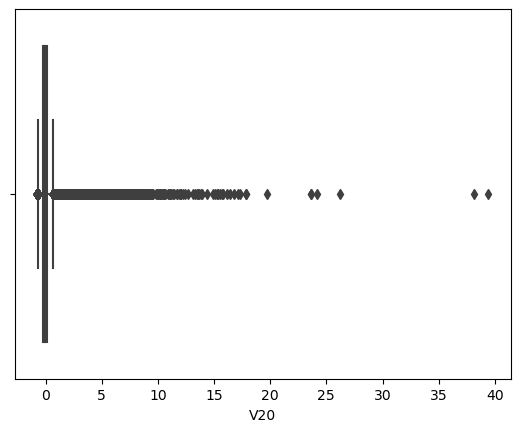

In [185]:
sns.boxplot(data.V20)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


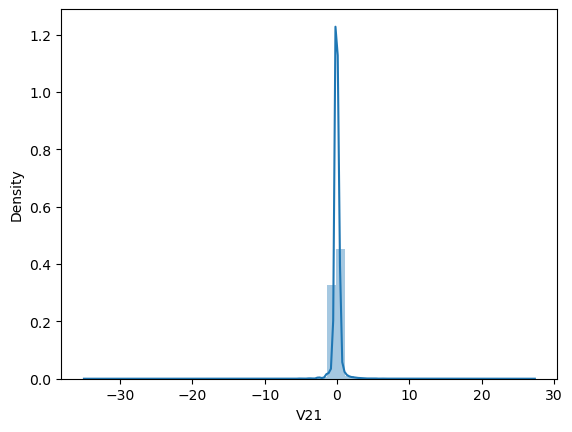

In [186]:
#V21
sns.distplot(data.V21)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


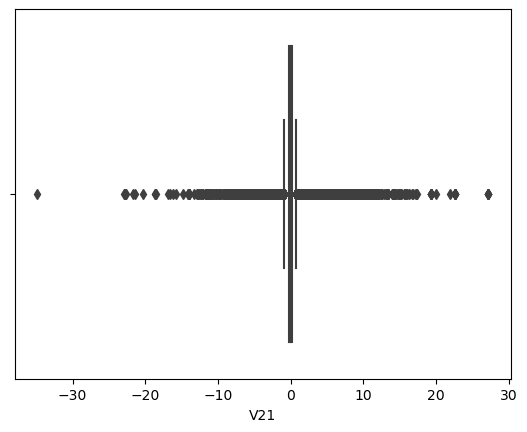

In [187]:
sns.boxplot(data.V21)
plt.show()

In [188]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V21,interpolation='midpoint')
Q1=data.V21.quantile(0.25)
Q3=data.V21.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [189]:
data.loc[data['V21']>max_limit]
data.loc[data['V21']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
82,52.0,-3.005237,0.065486,0.179846,-2.418473,0.306326,-0.824575,2.065426,-1.829347,-0.051429,-0.092917,2.572500,0.066851,-0.353574,0.050601,0.292227,-0.303774,-0.065676,-0.435450,-0.934016,2.456724,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
140,87.0,0.018109,0.065486,0.179846,-1.277543,-0.054336,2.098366,0.040103,1.250966,0.271501,-0.305483,-1.473383,0.272913,0.649419,0.899811,0.874543,1.471753,-0.144793,-0.725519,-0.698936,-0.062481,-0.871744,-0.678879,-0.555900,-0.761660,0.066611,0.767227,0.731634,-0.860310,919.60,0
146,92.0,0.018109,0.065486,0.179846,-1.427842,-0.621533,-0.604691,0.437866,0.336384,-0.051429,-0.092917,1.401383,0.667167,0.314682,0.050601,0.558542,0.314815,-0.701308,0.206092,-0.208238,2.962484,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
225,147.0,-2.687978,0.065486,0.179846,0.360829,1.310192,-1.645253,0.040103,-1.727825,-0.051429,-0.092917,2.466395,-0.727391,0.026190,0.050601,1.766034,-0.651759,-0.065676,0.377629,-1.450113,3.169344,-1.045961,-0.156951,0.079854,-0.012598,0.207194,-0.536578,0.950393,-0.624431,0.89,0
290,209.0,0.018109,0.065486,0.179846,-1.441250,-0.988529,-0.672187,0.075760,0.774198,-0.051429,-0.092917,1.276496,0.837057,0.377257,-1.614809,0.534728,0.416673,-0.541828,0.228258,-0.243879,2.983262,-0.910910,-1.204988,0.215766,-0.498066,1.125918,0.201450,2.468867,1.573084,8.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284548,172546.0,0.087107,0.065486,0.179846,-2.159285,-0.454087,-0.330370,-1.131548,-2.676147,-1.242332,-0.277902,0.225393,-0.998966,-2.162233,0.959586,-0.744104,1.844992,-0.340331,-0.493733,-0.221573,0.540637,-0.892212,1.153290,-0.264108,-0.358289,0.837541,-0.078788,0.044675,0.240389,34.35,0
284622,172616.0,-0.837485,0.065486,0.179846,-0.530372,0.033523,1.138035,-1.389691,-2.063917,-0.117573,-0.865121,-0.096829,1.526548,1.190927,0.508168,-0.081240,0.451331,-0.609548,0.770610,1.411434,0.541540,-1.196580,0.525624,0.428664,-0.147292,-1.740100,-0.375733,-0.076537,0.229136,15.41,0
284649,172642.0,0.018109,0.065486,0.179846,-2.498596,-0.054336,-1.320039,0.040103,0.022358,-0.051429,-0.092917,-0.927453,0.140033,1.025505,1.041785,-0.908015,0.966396,0.426147,-0.107051,-0.535565,3.468419,-0.957977,-1.529035,0.838689,-1.249172,1.714495,0.314623,2.112848,1.234408,10.74,0
284742,172734.0,-1.248847,0.065486,0.179846,-0.263061,0.070912,-0.323414,-1.454139,-5.069379,-0.827733,-0.092917,-0.743766,1.157013,0.442445,-0.078341,-0.461857,0.477430,0.923329,0.012543,-0.544287,1.032091,-2.704489,0.261945,0.490272,-0.112758,-0.453183,-0.694933,-0.106693,0.082714,9.99,0


In [190]:
print(len(data.loc[data['V21']>max_limit]))
print(len(data.loc[data['V21']<min_limit]))

8059
6438


In [191]:
#max_limit
Max = 8059  /284807 *100
print(Max)
#min_limit
Min = 6438  /284807 *100
print(Min)


2.8296355075542383
2.2604781483601175


In [192]:
#Handling outliers in max_limit
data.loc[data['V21']>max_limit,'V21']=np.median(data.V21)
#Handling outliers in min_limit
data.loc[data['V21']<min_limit,'V21']=np.median(data.V21)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


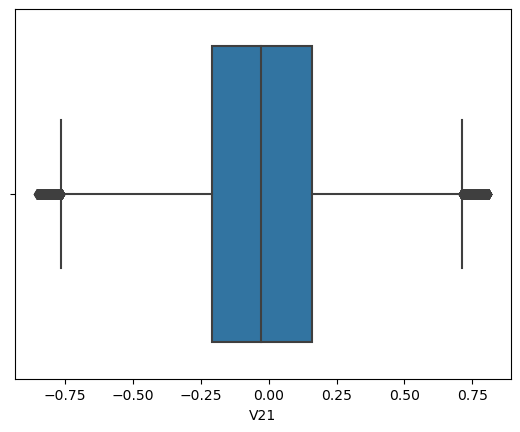

In [193]:
sns.boxplot(data.V21)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


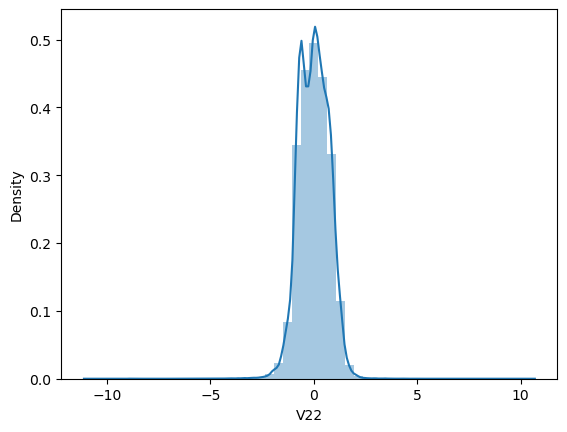

In [194]:
#V22
sns.distplot(data.V22)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


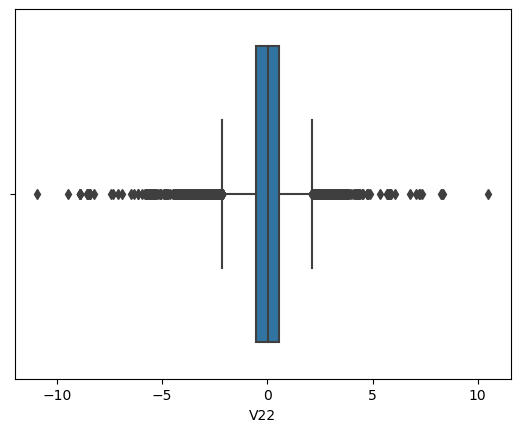

In [195]:
sns.boxplot(data.V22)
plt.show()

In [196]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V22,interpolation='midpoint')
Q1=data.V22.quantile(0.25)
Q3=data.V22.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [197]:
data.loc[data['V22']>max_limit]
data.loc[data['V22']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
160,100.0,-0.378602,0.065486,0.179846,-2.682799,-0.731375,-0.226354,-0.006949,-2.778983,-0.233232,-0.588714,-1.307682,0.064598,0.083191,0.464692,0.847698,-1.549799,-0.319688,1.086719,-0.444441,-0.062481,-0.02945,-2.776923,-0.466756,-0.714697,1.136720,-0.981993,0.356781,0.148444,182.95,0
164,103.0,0.018109,0.065486,0.179846,-0.019847,-1.413792,4.776000,0.040103,-0.228197,-0.525896,-1.724899,-0.362818,0.286155,0.487836,1.259957,0.660405,0.455263,-0.497644,0.792269,-0.978442,7.744222,-0.02945,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
417,302.0,-0.986171,0.065486,0.179846,0.178950,-0.794223,-0.088469,-1.266790,-4.922224,0.010309,-0.003059,0.071676,0.947121,0.474475,0.362347,0.797350,0.238125,0.036823,-0.606261,-0.418372,-0.062481,-0.02945,-2.331390,0.568103,0.638796,0.867788,0.181051,0.225638,0.179027,9.99,0
2061,1594.0,-2.027577,0.065486,0.179846,-2.320777,-0.908498,0.614715,0.040103,-7.921857,1.390464,-0.517909,1.587977,1.171445,-2.005434,1.334718,0.707116,-0.626243,0.628464,-0.063354,0.096451,-0.062481,-0.02945,-2.491575,0.371678,0.143700,0.773518,0.019107,0.543046,0.258536,80.00,0
2114,1628.0,-2.296229,0.065486,0.179846,-0.729287,-0.699595,1.575747,0.040103,-7.752840,0.491260,0.051426,1.290559,1.785150,-0.287063,0.519242,-0.743801,0.097523,0.342846,-0.604420,-0.655678,-0.062481,-0.02945,-3.138177,0.400361,-0.054394,0.882662,0.481744,0.473539,0.221455,79.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282510,170948.0,0.018109,0.065486,0.179846,-1.392585,0.492355,3.144500,0.040103,-14.991463,1.063316,0.849981,0.393604,1.780476,0.288486,-0.689081,-1.208360,0.689010,0.951672,0.611594,-0.021440,-0.062481,-0.02945,-5.718185,2.164900,-0.573397,0.007869,0.235653,0.702392,0.000845,13.36,0
282578,170999.0,-1.357021,0.065486,0.179846,-0.019847,0.975552,1.826012,0.283250,-4.908847,-1.829840,-0.288140,-0.770148,-0.750298,0.254234,0.050601,-0.435598,1.833108,-0.065676,0.824450,-1.415941,-0.062481,-0.02945,-3.059282,-0.233622,-0.370752,1.850745,0.159283,0.420775,0.159451,208.18,0
282859,171198.0,-1.085529,0.065486,0.179846,-0.963261,1.003113,0.712836,-0.578986,-3.776005,0.207177,-0.285471,0.129193,0.195918,-0.858502,-0.571693,-0.879185,0.822050,0.195616,0.702894,0.281720,-0.062481,-0.02945,-2.236875,0.565063,-0.346638,-0.278306,0.177360,0.388024,0.103048,3.99,0
283183,171427.0,-4.009100,0.065486,0.179846,-2.698281,-1.193810,1.623453,0.040103,-8.545229,0.038291,1.005555,-1.218200,1.022401,1.015784,-0.191665,-0.298027,-0.827135,0.255003,0.860567,-1.421859,-0.625893,-0.02945,-2.833353,1.286831,0.462382,-0.324520,0.860959,0.424570,0.199452,4.00,0


In [198]:
print(len(data.loc[data['V22']>max_limit]))
print(len(data.loc[data['V22']<min_limit]))

391
926


In [199]:
#max_limit
Max = 391  /284807 *100
print(Max)
#min_limit
Min = 926  /284807 *100
print(Min)


0.13728595153911244
0.32513245812076247


In [200]:
#Handling outliers in max_limit
data.loc[data['V22']>max_limit,'V22']=np.median(data.V22)
#Handling outliers in min_limit
data.loc[data['V22']<min_limit,'V22']=np.median(data.V22)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


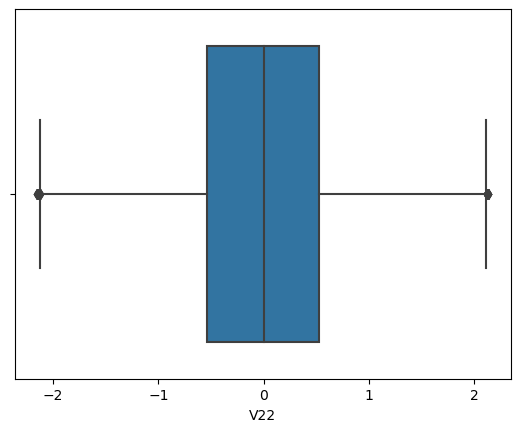

In [201]:
sns.boxplot(data.V22)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


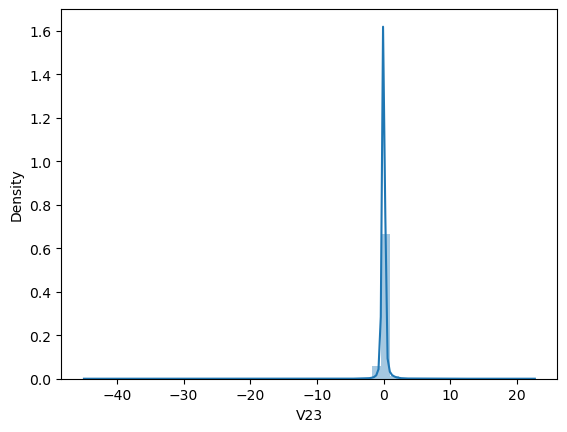

In [202]:
#V23
sns.distplot(data.V23)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


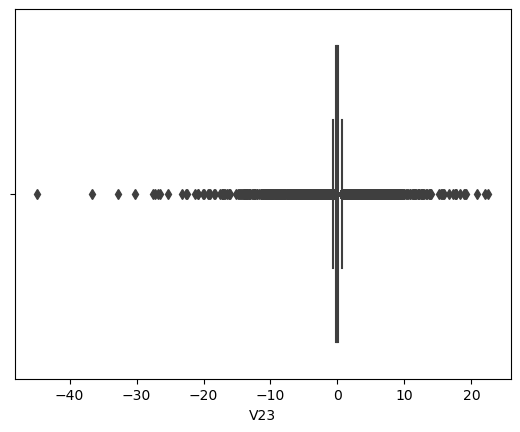

In [203]:
sns.boxplot(data.V23)
plt.show()

In [204]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V23,interpolation='midpoint')
Q1=data.V23.quantile(0.25)
Q3=data.V23.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [205]:
data.loc[data['V23']>max_limit]
data.loc[data['V23']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
85,55.0,0.018109,0.065486,0.179846,0.903915,-0.054336,-0.491078,0.040103,0.666451,1.922216,-0.614312,0.384927,1.194403,-1.020718,-1.246829,-2.348673,-0.213438,-0.100222,-0.406073,-1.637573,-0.062481,-0.047365,0.853360,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,200.01,0
89,59.0,-0.773293,0.065486,0.179846,0.027094,-1.698307,0.460188,0.737344,-0.314216,-0.842673,0.017276,-0.617560,-0.197504,1.594958,-0.259879,1.221025,1.324640,0.120540,-1.248649,-0.005070,2.442782,-0.029450,0.026123,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,1142.02,0
164,103.0,0.018109,0.065486,0.179846,-0.019847,-1.413792,4.776000,0.040103,-0.228197,-0.525896,-1.724899,-0.362818,0.286155,0.487836,1.259957,0.660405,0.455263,-0.497644,0.792269,-0.978442,7.744222,-0.029450,0.006782,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
174,112.0,0.018109,0.065486,0.179846,-0.019847,-2.495400,3.691365,1.603360,-0.071801,1.092418,1.145819,-1.229687,-0.186778,-0.063865,-1.418963,-1.006375,0.717839,-0.333451,1.208951,0.003735,-0.062481,-0.797155,0.260093,-2.712276,-1.020436,0.070990,0.619086,1.720707,-1.648553,937.69,0
247,167.0,-1.329062,0.065486,0.179846,2.318432,1.582537,0.389937,-1.287306,-1.323919,-1.050321,-0.092917,0.370426,0.733430,1.208301,0.184726,0.550392,0.434457,-0.598240,0.533996,1.414980,0.205083,-0.029450,-1.261980,-1.732848,-0.792373,-0.775038,-0.048443,0.783109,0.404478,5.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284528,172527.0,0.643223,0.065486,0.179846,-0.386292,-0.266371,-0.822619,1.514705,-0.729189,-0.901784,0.565653,-1.635506,-1.697678,-1.250055,0.869899,-0.173243,0.485685,0.368194,-1.127407,0.769358,1.694664,-0.029450,0.691763,-1.051281,0.140447,0.508555,0.220468,-0.278604,0.058006,900.00,0
284536,172539.0,0.018109,0.065486,0.179846,0.770116,-0.054336,2.124706,0.040103,0.022358,0.552732,1.113104,-1.554701,1.183078,0.287108,-0.023928,-1.800240,-1.032457,0.975180,-0.003636,0.465848,-0.325314,-0.384073,-0.204040,-1.113031,0.258388,0.732836,-0.231069,-0.049823,-0.019875,150.00,0
284629,172622.0,-0.200207,0.065486,0.179846,2.733235,1.683820,0.909150,0.058454,-0.733034,-1.535308,0.588876,-2.019587,0.011826,0.966391,-0.212624,-1.694786,0.718047,-0.832016,-0.418012,-1.353397,-0.240724,0.700361,-0.495300,-1.332923,0.096321,1.978268,0.327247,0.059195,0.148600,6.03,0
284659,172652.0,-2.734350,0.065486,0.179846,-1.471630,1.558667,-1.552623,1.305007,0.421446,-1.475435,-1.558122,0.512729,1.160516,0.256229,1.432643,-1.747255,-0.116328,-0.458758,-0.034396,-0.719711,-0.091403,0.508751,0.751185,-0.903766,0.897164,1.704416,0.313671,-0.441428,-0.371971,76.00,0


In [206]:
print(len(data.loc[data['V23']>max_limit]))
print(len(data.loc[data['V23']<min_limit]))

10371
8170


In [207]:
#max_limit
Max = 10371  /284807 *100
print(Max)
#min_limit
Min = 8170  /284807 *100
print(Min)


3.641413307959425
2.868609268732861


In [208]:
#Handling outliers in max_limit
data.loc[data['V23']>max_limit,'V23']=np.median(data.V23)
#Handling outliers in min_limit
data.loc[data['V23']<min_limit,'V23']=np.median(data.V23)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


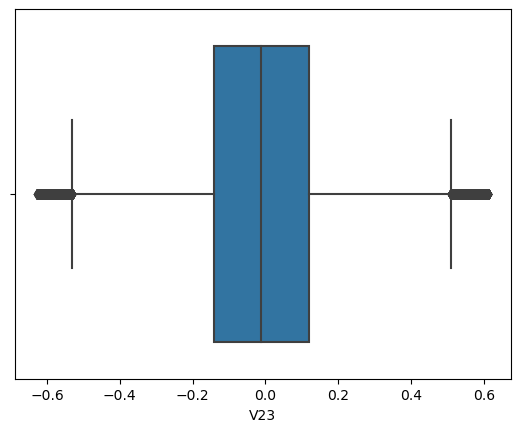

In [209]:
sns.boxplot(data.V23)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


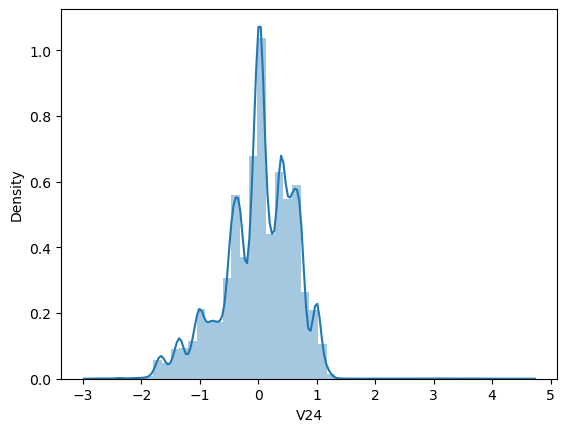

In [210]:
#V24
sns.distplot(data.V24)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


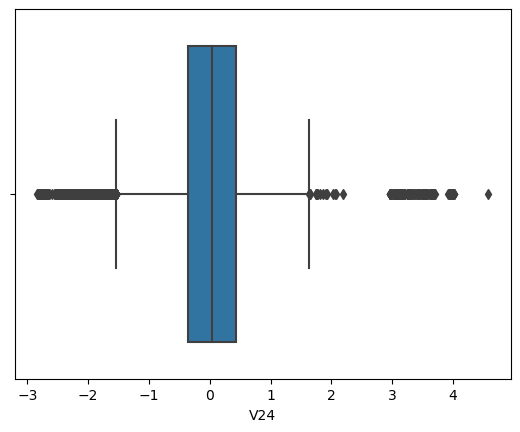

In [211]:
sns.boxplot(data.V24)
plt.show()

In [212]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V24,interpolation='midpoint')
Q1=data.V24.quantile(0.25)
Q3=data.V24.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [213]:
data.loc[data['V24']>max_limit]
data.loc[data['V24']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183,118.0,1.431053,0.065486,0.179846,-1.207383,-0.012786,0.704440,-0.732126,0.183139,-0.878334,0.767906,0.057419,-0.591459,0.004514,0.048051,0.442392,1.531117,-0.325105,-0.724349,1.099846,0.100777,0.112749,0.222296,-0.244591,-1.688158,0.609778,-0.088366,0.010438,-0.014499,20.00,0
218,144.0,-1.032940,0.065486,0.179846,-0.529928,0.869578,1.903301,0.033240,-0.237815,0.844582,-0.989005,-1.306165,1.047654,-0.075454,-0.899501,0.048072,0.086958,-0.723274,-0.339748,-0.489337,-0.520240,0.411651,-0.941007,-0.157833,-1.735297,-0.026033,-0.814974,0.094762,0.126906,15.36,0
220,145.0,-2.420413,0.065486,0.179846,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,0.158497,-1.224951,1.314705,0.304412,-0.290218,-2.014548,-0.772801,0.696761,0.017914,0.003735,-0.276207,-0.029450,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0
221,145.0,-2.420413,0.065486,0.179846,0.983069,-0.281518,2.408958,-1.401613,-0.188299,0.675878,0.158497,-1.224951,1.314705,0.304412,-0.290218,-2.014548,-0.772801,0.696761,0.017914,0.003735,-0.276207,-0.029450,-1.238620,0.006927,-1.724222,0.239603,-0.313703,-0.188281,0.119831,6.00,0
222,145.0,-2.419486,0.065486,0.179846,0.982710,-0.284815,2.411200,-1.398537,-0.188922,0.675695,0.158123,-1.224834,1.314398,0.304425,-0.290434,-2.014511,-0.772540,0.696610,0.017855,0.003735,-0.277406,-0.029450,-1.238354,0.007191,-1.724175,0.239721,-0.313607,-0.187431,0.119472,6.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284145,172193.0,1.932277,0.065486,0.179846,0.002755,0.714357,0.894282,-0.234825,0.331854,0.471378,0.138993,0.848922,0.618652,-0.984330,0.721042,0.262644,-0.547889,0.115907,-1.385354,-0.387080,-0.349343,-0.209075,-0.449686,0.344362,-1.659359,-0.493879,0.313272,-0.032634,-0.089148,3.57,0
284522,172523.0,-0.526583,0.065486,0.179846,-0.230523,1.663537,0.962273,1.111302,0.332699,-0.436653,-1.796522,1.618826,0.679180,-0.084081,0.050601,-0.202321,-0.814453,-0.065676,-0.175568,-0.429059,0.070217,0.076439,0.418614,-0.104050,-1.584783,-0.163472,-0.154850,0.203031,0.185303,80.44,0
284553,172549.0,2.174499,0.065486,0.179846,-1.881751,-0.395973,1.034384,-1.308778,0.274126,-1.512299,1.608605,0.824730,0.128651,0.713540,-0.214390,-0.151731,-1.140293,0.852706,-0.841086,-0.675214,-0.488823,-0.073865,0.409162,0.219062,-1.638714,-0.316722,-0.049944,0.056322,-0.077890,15.00,0
284565,172563.0,-1.403833,0.065486,0.179846,2.342155,1.408161,2.395871,-0.054309,0.740729,-1.077629,0.883615,0.033193,-0.330544,-0.854300,-0.098497,-0.783668,0.725407,-0.661827,-0.326869,0.003735,-0.480252,0.368872,1.133820,-0.110059,-1.666391,-0.162721,0.166958,-0.227449,0.177852,3.44,0


In [214]:
print(len(data.loc[data['V24']>max_limit]))
print(len(data.loc[data['V24']<min_limit]))

136
4638


In [215]:
#max_limit
Max = 136  /284807 *100
print(Max)
#min_limit
Min = 4638  /284807 *100
print(Min)


0.04775163531795216
1.6284712103283978


In [216]:
#Handling outliers in max_limit
data.loc[data['V24']>max_limit,'V24']=np.median(data.V24)
#Handling outliers in min_limit
data.loc[data['V24']<min_limit,'V24']=np.median(data.V24)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


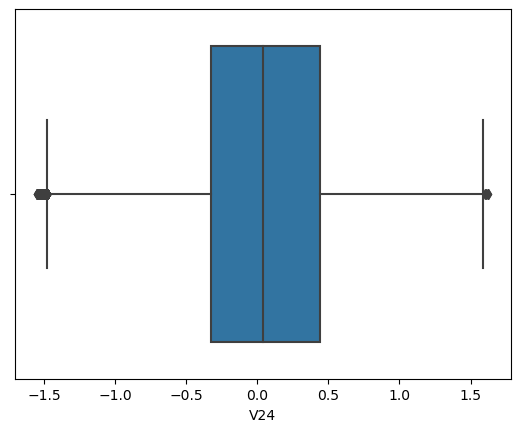

In [217]:
sns.boxplot(data.V24)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


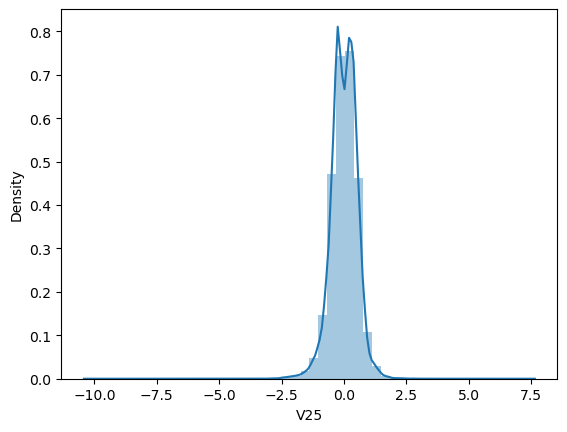

In [218]:
#V25
sns.distplot(data.V25)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


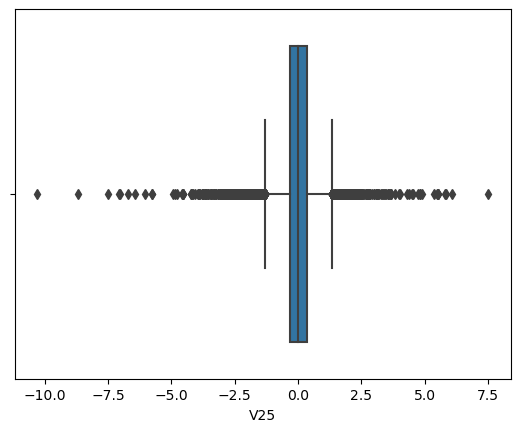

In [219]:
sns.boxplot(data.V25)
plt.show()

In [220]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V25,interpolation='midpoint')
Q1=data.V25.quantile(0.25)
Q3=data.V25.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [221]:
data.loc[data['V25']>max_limit]
data.loc[data['V25']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
244,164.0,0.073497,0.065486,0.179846,0.114964,0.822947,0.251480,0.296319,0.139497,-0.123050,-0.142617,-1.652948,-0.908371,-0.653479,0.409310,1.490618,0.104649,-0.402917,-0.113270,0.777333,-0.043920,-0.128758,-0.381932,0.151012,-1.363967,-1.389079,0.075412,0.231750,0.230171,0.99,0
718,541.0,-0.623525,0.065486,0.179846,1.544280,0.109686,0.055218,0.259801,-0.192566,-0.320106,0.869786,1.170672,0.490575,0.427361,-0.660374,-0.377799,1.405790,-1.667260,0.887032,-1.786332,-0.074807,0.387800,1.408297,0.019451,0.545551,-1.357580,-0.332164,-0.138540,-0.200151,67.10,0
787,599.0,0.142623,0.065486,0.179846,1.291217,-0.617997,-0.428988,0.678548,-0.367664,0.162607,0.270924,-0.367730,0.131576,-0.092987,-0.286104,0.421351,-1.087501,0.541916,-0.464148,1.782341,0.118753,-0.118524,0.073901,0.295627,0.740646,-1.544209,0.133510,-0.001466,0.014813,55.61,0
1329,1040.0,0.141319,0.065486,0.179846,0.549027,-0.207915,-0.032271,0.106785,0.078214,-0.206778,0.054429,0.757366,0.865889,0.282450,0.024753,-0.250792,-0.599822,0.234224,0.096788,0.003735,0.219704,-0.070837,-0.028085,0.271167,0.086090,-1.577384,0.835264,0.209991,0.234885,25.00,0
2170,1681.0,0.155577,0.065486,0.179846,-0.019847,0.061227,0.089162,0.812213,-0.291321,-1.856983,1.511332,-0.135893,0.215903,1.633689,-0.297874,0.664199,0.257017,-0.389071,-0.180612,-0.038152,0.277753,0.112585,0.508436,0.313390,0.705983,-1.542914,-0.178528,0.123292,0.057561,44.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284573,172569.0,-1.762664,0.065486,0.179846,-1.898574,-2.611232,1.301447,0.040103,-0.911945,1.133300,-0.814434,0.559372,0.095702,-0.664034,-0.341286,-0.297739,0.901995,-1.338934,0.180216,0.131453,-0.062481,-0.526145,-0.121367,-0.011193,-0.416585,-1.338263,0.006724,-0.084768,0.308717,724.00,0
284622,172616.0,-0.837485,0.065486,0.179846,-0.530372,0.033523,1.138035,-1.389691,-2.063917,-0.117573,-0.865121,-0.096829,1.526548,1.190927,0.508168,-0.081240,0.451331,-0.609548,0.770610,1.411434,0.541540,-0.029450,0.525624,0.428664,-0.147292,-1.740100,-0.375733,-0.076537,0.229136,15.41,0
284634,172627.0,-0.071308,0.065486,0.179846,-0.019847,2.078401,2.710189,-0.515071,1.087521,0.106303,-0.779678,-0.742165,0.311244,-0.025561,0.542678,-0.033667,0.066413,-0.193074,1.372231,-1.043273,-0.062481,0.249488,1.172163,0.183493,0.743429,-1.508628,-0.345090,0.141739,0.271248,15.13,0
284648,172640.0,-0.394201,0.065486,0.179846,-1.422866,1.574954,4.054420,0.501891,0.022358,0.518554,-1.249441,-0.692908,0.556961,-0.233640,0.471331,-0.325354,-0.202812,-0.443049,-0.334313,-0.218820,0.239081,0.061167,-0.312032,-0.011193,0.592390,-2.074228,-1.420358,0.236339,0.330814,271.79,0


In [222]:
print(len(data.loc[data['V25']>max_limit]))
print(len(data.loc[data['V25']<min_limit]))


1679
3688


In [223]:
#max_limit
Max = 1679  /284807 *100
print(Max)
#min_limit
Min = 3688  /284807 *100
print(Min)


0.5895220271973652
1.294911993033879


In [224]:
#Handling outliers in max_limit
data.loc[data['V25']>max_limit,'V25']=np.median(data.V25)
#Handling outliers in min_limit
data.loc[data['V25']<min_limit,'V25']=np.median(data.V25)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


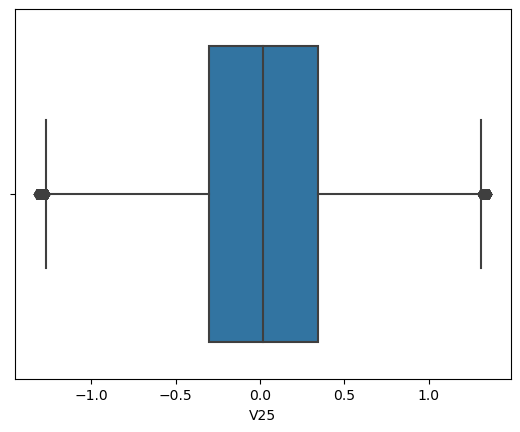

In [225]:
sns.boxplot(data.V25)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


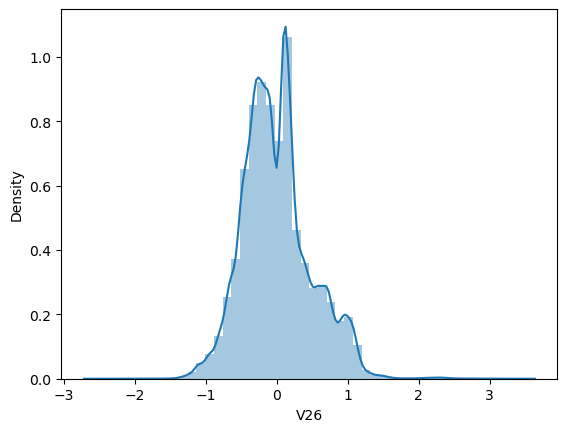

In [226]:
#V26
sns.distplot(data.V26)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


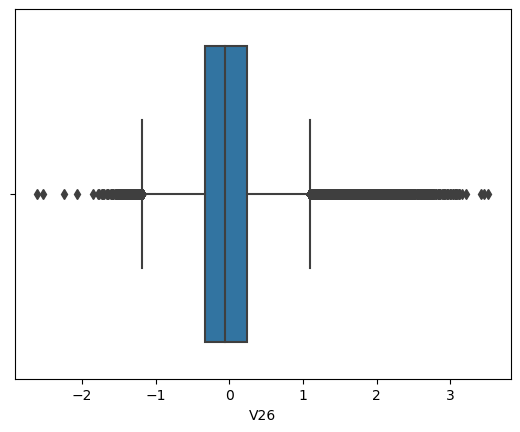

In [227]:
sns.boxplot(data.V26)
plt.show()

In [228]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V26,interpolation='midpoint')
Q1=data.V26.quantile(0.25)
Q3=data.V26.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [229]:
data.loc[data['V26']>max_limit]
data.loc[data['V26']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83,53.0,-1.198968,0.065486,0.179846,-0.019847,0.327567,-0.174469,0.959726,-1.026456,1.700435,-0.078942,1.662667,0.485619,-0.933025,-1.118787,0.141253,0.066413,-0.504746,0.891223,-1.512022,-0.062481,-0.453169,0.334614,-0.364541,-0.310186,-0.302599,-1.243924,-1.123457,-0.734351,89.17,0
3877,3426.0,-2.361982,0.065486,0.179846,-0.019847,-0.354358,-1.601132,1.213256,-0.689295,2.323985,-1.330514,-0.354858,1.035749,0.213923,-0.498803,0.110700,-0.758503,-0.577738,-0.467168,-0.157278,-0.716715,-0.162219,-0.106989,-0.356261,0.429798,0.237146,-1.338556,-0.895729,0.696510,106.25,0
4486,3787.0,-0.723244,0.065486,0.179846,-0.019847,0.079889,-0.528079,0.419176,-0.039725,-0.051429,-0.092917,2.077836,-1.888226,0.344354,1.604180,0.059161,-0.118506,-0.257525,0.835624,-0.779974,-0.206538,-0.039506,0.225510,-0.190130,-0.402864,0.012213,-1.222146,-0.056297,-0.121713,30.80,0
5594,5756.0,-1.069526,0.065486,0.179846,-2.419008,0.789008,-0.217896,1.113164,-0.610826,-0.051429,-1.261386,1.770795,-2.218999,-0.256065,0.999940,-1.659723,-0.664680,-0.093178,0.069016,-0.731440,-0.348998,-0.379733,-0.289215,-0.161039,-0.416205,-0.136385,-1.291803,-0.818651,-0.380878,45.01,0
5747,6097.0,-1.233636,0.065486,0.179846,-0.019847,0.065812,-2.095802,1.014328,-0.277431,-0.051429,-1.593176,2.365104,-1.105384,1.081845,0.050601,-1.090662,-0.670212,-0.037437,0.503362,-0.526914,-0.246755,0.069454,0.637385,-0.073212,0.494082,-0.353567,-1.303960,-0.160881,0.054879,15.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283927,172004.0,0.352167,0.065486,0.179846,0.161086,-0.195817,-0.025962,0.363993,-0.337591,0.023299,0.878936,-1.814469,-0.913105,-1.566647,-0.636103,-1.297517,0.066413,0.157819,0.719440,-0.304422,-0.606434,-0.029450,-1.554028,0.268646,-0.252901,-1.196697,-1.215489,-0.236555,-0.320730,4.99,0
284029,172092.0,1.017313,0.065486,0.179846,-2.159149,-1.637332,-0.655102,0.074489,-0.355295,1.380284,-0.892270,-0.820265,1.197584,1.009858,-0.135765,0.663217,0.066413,0.219087,1.023309,0.419244,0.681955,-0.363342,-1.642559,-0.064883,0.697632,-0.528670,-1.349566,-0.019038,0.083930,615.52,0
284069,172121.0,0.511557,0.065486,0.179846,-1.200048,-1.664241,-1.018568,0.730999,-0.416140,-0.051429,-1.767288,-0.617638,1.137840,-0.113653,0.249860,0.930383,-1.027939,0.114913,-0.320199,1.022127,1.387514,0.120621,-1.148568,-0.329485,-0.016733,-0.557478,-1.332670,-0.078573,0.103747,807.48,0
284449,172455.0,-2.209137,0.065486,0.179846,-1.007089,-0.061935,-0.886058,1.920485,-0.856961,0.824662,0.235422,-0.563494,0.356686,0.451022,-0.248726,0.379952,-0.552534,-0.654700,-0.534626,0.237305,-0.609693,-0.264807,-0.257486,-0.325404,0.050225,-0.397332,-1.200899,-1.855941,-0.736253,131.98,0


In [230]:
print(len(data.loc[data['V26']>max_limit]))
print(len(data.loc[data['V26']<min_limit]))

4867
729


In [231]:
#max_limit
Max = 4867  /284807 *100
print(Max)
#min_limit
Min = 729  /284807 *100
print(Min)


1.7088765374446555
0.25596280990284653


In [232]:
#Handling outliers in max_limit
data.loc[data['V26']>max_limit,'V26']=np.median(data.V26)
#Handling outliers in min_limit
data.loc[data['V26']<min_limit,'V26']=np.median(data.V26)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


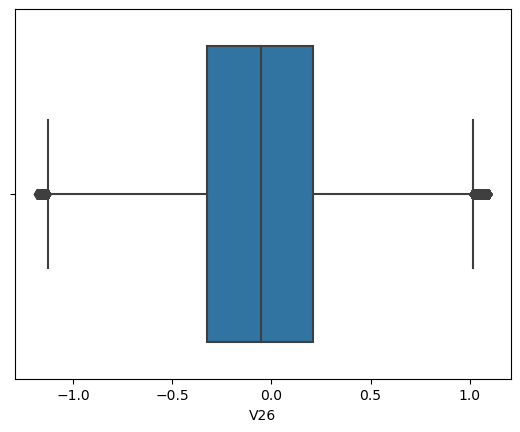

In [233]:
sns.boxplot(data.V26)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


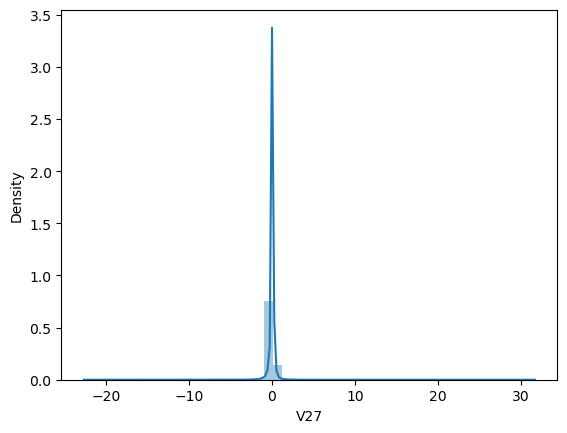

In [234]:
#V27
sns.distplot(data.V27)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


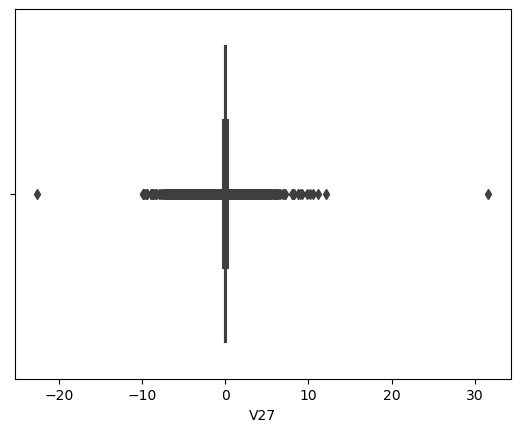

In [235]:
sns.boxplot(data.V27)
plt.show()

In [236]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V27,interpolation='midpoint')
Q1=data.V27.quantile(0.25)
Q3=data.V27.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [237]:
data.loc[data['V27']>max_limit]
data.loc[data['V27']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7,7.0,-0.644269,0.065486,0.179846,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,-0.029450,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
52,36.0,-1.169422,0.065486,0.179846,0.860189,-0.103810,0.122035,0.264451,-0.108767,-0.181977,0.659593,0.456317,-0.097763,-0.346159,0.210182,2.345229,-1.172648,0.860019,-1.154224,0.858768,-0.120560,0.024498,-0.120153,0.212986,0.087536,-0.946530,0.226700,-0.810101,0.234957,7.99,0
66,44.0,-0.714764,0.065486,0.179846,0.616434,0.848776,-0.111938,1.505617,-0.798167,0.244757,0.264554,-1.108114,-0.359860,-0.163471,-0.783997,-0.367153,-0.653119,-0.504300,-0.260560,0.435251,0.107322,-0.220075,-0.017845,-0.431938,-0.130458,0.337159,-0.440042,-0.674526,-0.473218,59.90,0
67,44.0,-0.948896,0.065486,0.179846,2.813750,0.145539,-0.027353,0.133702,-0.307535,-0.125244,1.034940,-0.532648,-0.189878,0.081222,-0.939053,0.081187,-0.129785,-0.174353,-0.090291,0.222435,-0.056186,-0.083647,0.416090,0.207537,0.716064,-0.602311,-0.064230,-0.315058,-0.272463,0.75,0
69,46.0,-1.923213,0.065486,0.179846,1.988776,0.417091,-0.380014,0.472139,-0.557333,-0.649079,1.410889,-0.517737,-0.985202,-0.400595,-0.830665,0.338009,0.029924,0.371150,-1.054319,0.003735,-0.369227,-0.686488,-0.779268,-0.011193,0.518863,-0.363712,-0.052139,-0.589022,-0.396110,35.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284715,172708.0,-0.944969,0.065486,0.179846,-0.491568,1.018627,-0.890417,1.224605,-0.779629,0.894188,0.913452,1.052611,-0.325218,-0.948872,-1.353521,0.273302,0.139632,-0.080004,1.305608,0.222384,0.023993,0.209869,1.011722,-0.223454,-0.437010,-0.391556,-0.275788,-0.867064,0.033865,15.45,0
284721,172710.0,-2.516013,0.065486,0.179846,-0.621718,0.596987,-1.384147,1.579089,-1.314013,1.618929,-0.092917,0.492104,0.351730,1.156920,0.050601,0.803360,-0.700136,0.210951,0.100225,-0.380641,0.366304,0.288237,1.314473,-0.176766,0.356307,-0.516441,-0.450529,-1.984913,-0.222766,7.45,0
284769,172759.0,-1.570301,0.065486,0.179846,-1.003017,-0.326096,-0.417224,-0.477372,1.122221,0.613186,-1.247010,-1.842316,-0.117293,0.093439,-0.888971,0.456275,1.169674,0.372476,0.798280,-0.002760,-0.098832,-0.266727,-0.854690,-0.034251,-1.154617,0.036740,-0.233612,-0.427107,-0.255729,0.77,0
284772,172760.0,0.018109,0.065486,0.179846,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,-0.092917,-1.476424,-0.076365,-0.755724,0.758186,1.018209,0.099797,-0.013050,0.239192,0.096111,-0.062481,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0


In [238]:
print(len(data.loc[data['V27']>max_limit]))
print(len(data.loc[data['V27']<min_limit]))

19619
19544


In [239]:
#max_limit
Max = 19619  /284807 *100
print(Max)
#min_limit
Min = 19544  /284807 *100
print(Min)


6.888524509580171
6.862190887162184


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


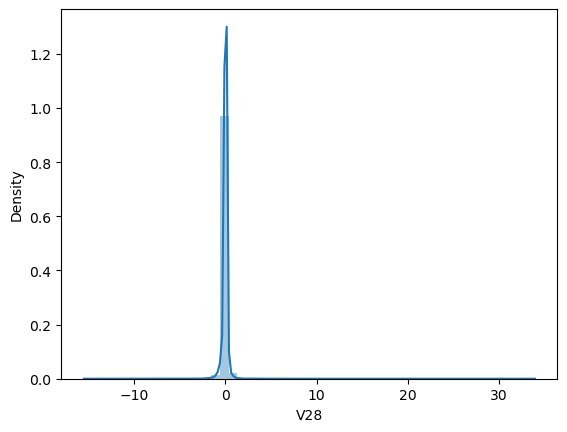

In [240]:
#V28
sns.distplot(data.V28)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


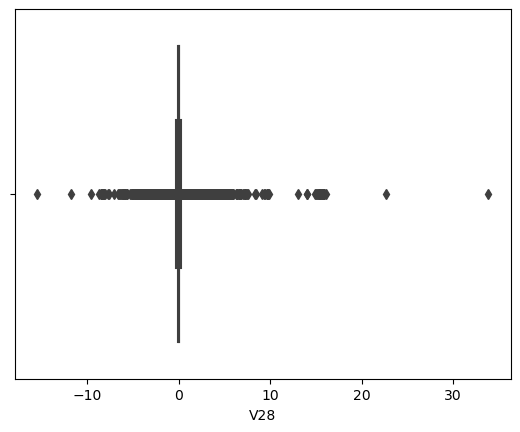

In [241]:
sns.boxplot(data.V28)
plt.show()

In [242]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.V28,interpolation='midpoint')
Q1=data.V28.quantile(0.25)
Q3=data.V28.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [243]:
data.loc[data['V28']>max_limit]
data.loc[data['V28']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7,7.0,-0.644269,0.065486,0.179846,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,-0.029450,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
66,44.0,-0.714764,0.065486,0.179846,0.616434,0.848776,-0.111938,1.505617,-0.798167,0.244757,0.264554,-1.108114,-0.359860,-0.163471,-0.783997,-0.367153,-0.653119,-0.504300,-0.260560,0.435251,0.107322,-0.220075,-0.017845,-0.431938,-0.130458,0.337159,-0.440042,-0.674526,-0.473218,59.90,0
67,44.0,-0.948896,0.065486,0.179846,2.813750,0.145539,-0.027353,0.133702,-0.307535,-0.125244,1.034940,-0.532648,-0.189878,0.081222,-0.939053,0.081187,-0.129785,-0.174353,-0.090291,0.222435,-0.056186,-0.083647,0.416090,0.207537,0.716064,-0.602311,-0.064230,-0.315058,-0.272463,0.75,0
69,46.0,-1.923213,0.065486,0.179846,1.988776,0.417091,-0.380014,0.472139,-0.557333,-0.649079,1.410889,-0.517737,-0.985202,-0.400595,-0.830665,0.338009,0.029924,0.371150,-1.054319,0.003735,-0.369227,-0.686488,-0.779268,-0.011193,0.518863,-0.363712,-0.052139,-0.589022,-0.396110,35.00,0
82,52.0,-3.005237,0.065486,0.179846,-2.418473,0.306326,-0.824575,2.065426,-1.829347,-0.051429,-0.092917,2.572500,0.066851,-0.353574,0.050601,0.292227,-0.303774,-0.065676,-0.435450,-0.934016,2.456724,-0.029450,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284727,172716.0,-3.240505,0.065486,0.179846,0.332355,1.535180,-0.574599,-2.131128,1.034499,0.110722,-0.765409,-0.341543,0.656896,0.744721,0.067701,0.621832,1.051746,-0.800427,1.541284,1.024298,1.066411,0.553838,0.351755,-0.380236,-0.941868,0.232699,0.901126,-0.030580,-0.501609,52.00,0
284733,172726.0,-1.353026,0.065486,0.179846,-0.019847,-1.173016,-0.159307,0.040103,-1.544902,1.422788,-0.092917,-0.528871,-0.059281,-1.528962,0.184937,0.059335,-0.975440,-0.249330,-0.488987,-0.037374,-0.639386,0.415421,-0.701799,-0.144663,1.056709,1.074381,-1.129447,0.033781,-0.325899,405.09,0
284735,172727.0,-1.661169,0.065486,0.179846,-1.549156,-2.301359,2.365956,-0.248881,-0.857361,0.137784,-0.514510,-1.035375,-0.968981,-1.664493,-0.370165,-0.280621,0.371750,1.606342,-0.003636,-0.447983,-0.062481,-0.029450,-0.257828,-0.072471,-1.035804,-0.437889,-0.238543,0.365302,-0.448621,381.05,0
284757,172745.0,-1.757643,0.065486,0.179846,-1.409539,-0.662159,0.046930,0.173241,0.364812,1.143381,-1.263365,-0.094024,0.472199,-1.146903,-0.139599,-1.218715,0.142177,-0.318127,0.328438,1.016459,-0.165716,-0.191471,-0.432979,-0.292549,-0.281494,-0.484349,0.366751,-0.102628,-0.458915,200.00,0


In [244]:
print(len(data.loc[data['V28']>max_limit]))
print(len(data.loc[data['V28']<min_limit]))

11800
18542


In [245]:
#max_limit
Max = 11800  /284807 *100
print(Max)
#min_limit
Min = 18542  /284807 *100
print(Min)


4.1431565937634955
6.51037369165786


In [246]:
#Handling outliers in max_limit
data.loc[data['V28']>max_limit,'V28']=np.median(data.V28)


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


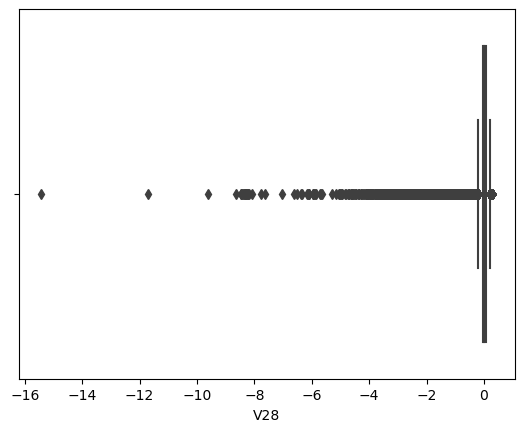

In [247]:
sns.boxplot(data.V28)
plt.show()


In [248]:
data.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,0.065486,0.179846,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


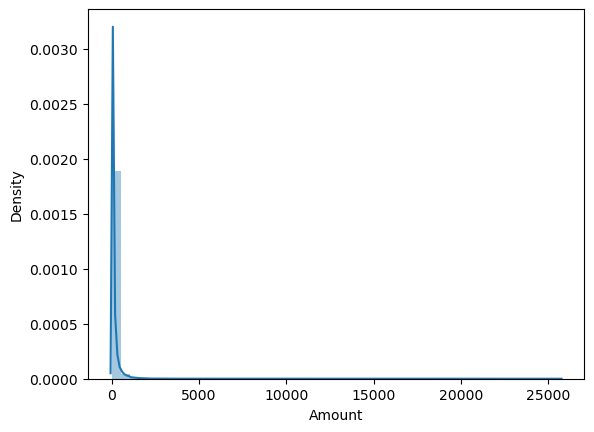

In [249]:
#Amount
sns.distplot(data.Amount)
plt.show()


C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


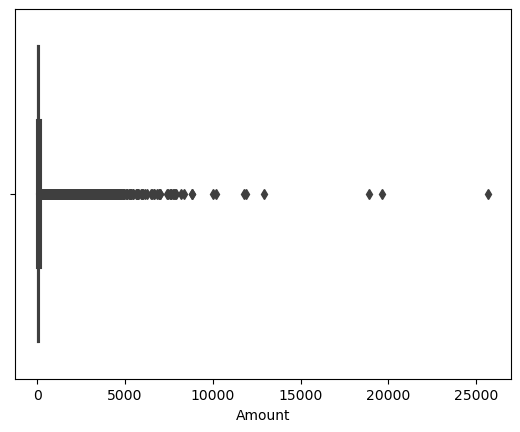

In [250]:
sns.boxplot(data.Amount)
plt.show()


In [251]:
#calculating the IQR range
from scipy import stats
IQR=stats.iqr(data.Amount,interpolation='midpoint')
Q1=data.Amount.quantile(0.25)
Q3=data.Amount.quantile(0.75)
min_limit=Q1-1.5 *IQR
max_limit=Q3+1.5*IQR


In [252]:
data.loc[data['Amount']>max_limit]
data.loc[data['Amount']<min_limit]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [253]:
print(len(data.loc[data['Amount']>max_limit]))
print(len(data.loc[data['Amount']<min_limit]))

31904
0


In [254]:
#max_limit
Max = 31904  /284807 *100
print(Max)


11.201971861646658


In [255]:
## Saving the preprocessed data.
data.to_csv('Preprocessed_data.csv')

In [2]:
## Loading the data
preprcessed_data=pd.read_csv('Preprocessed_data.csv')

In [3]:
pd.set_option('display.max_columns',None)
preprcessed_data

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,0.065486,0.179846,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.065486,0.179846,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,0.065486,0.179846,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,0.066413,1.109969,-0.121359,0.003735,0.524980,0.247998,0.771679,-0.011193,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,0.065486,0.179846,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.065486,0.179846,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,284802,172786.0,0.018109,0.065486,0.179846,-2.066656,-0.054336,-0.274187,0.040103,0.022358,1.914428,-0.092917,-1.593105,0.140033,-0.689256,0.050601,-0.924459,1.107641,-0.065676,0.510632,-0.682920,1.475829,0.213454,0.111864,-0.011193,-0.509348,0.016594,0.250034,0.943651,0.011244,0.77,0
284803,284803,172787.0,-0.732789,0.065486,0.179846,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,284804,172788.0,1.919565,0.065486,0.179846,-0.557828,-0.054336,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,284805,172788.0,-0.240440,0.065486,0.179846,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,0.003735,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
#checking the value_count of output
preprcessed_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
## checking the duplicate rows
#data.duplicate()
preprcessed_data.duplicated().sum()

0

In [6]:
preprcessed_data.drop_duplicates()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,0.065486,0.179846,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.065486,0.179846,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,0.065486,0.179846,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,0.066413,1.109969,-0.121359,0.003735,0.524980,0.247998,0.771679,-0.011193,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,0.065486,0.179846,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.065486,0.179846,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,284802,172786.0,0.018109,0.065486,0.179846,-2.066656,-0.054336,-0.274187,0.040103,0.022358,1.914428,-0.092917,-1.593105,0.140033,-0.689256,0.050601,-0.924459,1.107641,-0.065676,0.510632,-0.682920,1.475829,0.213454,0.111864,-0.011193,-0.509348,0.016594,0.250034,0.943651,0.011244,0.77,0
284803,284803,172787.0,-0.732789,0.065486,0.179846,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,284804,172788.0,1.919565,0.065486,0.179846,-0.557828,-0.054336,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,284805,172788.0,-0.240440,0.065486,0.179846,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,0.003735,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
preprcessed_data.duplicated().sum()

0

##### Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
preprcessed_data[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']]=scale.fit_transform(preprcessed_data[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']])

In [9]:
preprcessed_data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.000000,0.433099,0.0,0.0,0.724666,0.442766,0.039316,0.551469,0.983616,0.577962,0.533238,0.410053,0.867045,0.309645,0.406104,0.791600,0.374396,0.570534,0.506202,0.609969,0.024415,0.501630,0.566535,0.416563,0.508551,0.541863,0.435662,0.418976,0.981141,0.005824,0
1,1,0.000000,0.812297,0.0,0.0,0.578600,0.519169,0.032131,0.480667,0.983434,0.453138,0.468099,0.770445,0.947820,0.591980,0.451659,0.622536,0.610038,0.479143,0.453892,0.459783,0.016433,0.376577,0.352489,0.587649,0.380255,0.556325,0.574333,0.416345,0.983419,0.000105,0
2,2,0.000006,0.433315,0.0,0.0,0.567861,0.411143,0.056965,0.674186,0.985615,0.199297,0.562765,0.605891,0.899867,0.635499,0.445624,0.969816,0.509785,0.825927,0.469399,0.500627,0.031229,0.662147,0.681869,0.496774,0.270044,0.371075,0.457681,0.415489,0.978677,0.014739,0
3,3,0.000006,0.491582,0.0,0.0,0.372624,0.505680,0.049667,0.551027,0.987356,0.225025,0.496408,0.464189,0.905250,0.595539,0.412430,0.365274,0.225783,0.317955,0.991396,0.162884,0.012972,0.447386,0.502879,0.352053,0.116668,0.736107,0.421217,0.417669,0.986395,0.004807,0
4,4,0.000012,0.463055,0.0,0.0,0.571513,0.429557,0.034483,0.630042,0.978663,0.669472,0.700596,0.364887,0.922526,0.755368,0.186080,0.529043,0.379175,0.444535,0.490199,0.719101,0.028329,0.506980,0.688081,0.394762,0.531997,0.416613,0.740028,0.420561,0.996181,0.002724,0


In [10]:
preprcessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  284807 non-null  int64  
 1   Time        284807 non-null  float64
 2   V1          284807 non-null  float64
 3   V2          284807 non-null  float64
 4   V3          284807 non-null  float64
 5   V4          284807 non-null  float64
 6   V5          284807 non-null  float64
 7   V6          284807 non-null  float64
 8   V7          284807 non-null  float64
 9   V8          284807 non-null  float64
 10  V9          284807 non-null  float64
 11  V10         284807 non-null  float64
 12  V11         284807 non-null  float64
 13  V12         284807 non-null  float64
 14  V13         284807 non-null  float64
 15  V14         284807 non-null  float64
 16  V15         284807 non-null  float64
 17  V16         284807 non-null  float64
 18  V17         284807 non-null  float64
 19  V1

In [11]:
preprcessed_data.duplicated().sum()


0

## Feature Selection

In [12]:
# Removing redundant columns
#We can drop 
l1=['Unnamed: 0']
preprcessed_data.drop(l1,axis=1,inplace=True)

In [13]:
preprcessed_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,0.433099,0.0,0.0,0.724666,0.442766,0.039316,0.551469,0.983616,0.577962,0.533238,0.410053,0.867045,0.309645,0.406104,0.791600,0.374396,0.570534,0.506202,0.609969,0.024415,0.501630,0.566535,0.416563,0.508551,0.541863,0.435662,0.418976,0.981141,0.005824,0
1,0.000000,0.812297,0.0,0.0,0.578600,0.519169,0.032131,0.480667,0.983434,0.453138,0.468099,0.770445,0.947820,0.591980,0.451659,0.622536,0.610038,0.479143,0.453892,0.459783,0.016433,0.376577,0.352489,0.587649,0.380255,0.556325,0.574333,0.416345,0.983419,0.000105,0
2,0.000006,0.433315,0.0,0.0,0.567861,0.411143,0.056965,0.674186,0.985615,0.199297,0.562765,0.605891,0.899867,0.635499,0.445624,0.969816,0.509785,0.825927,0.469399,0.500627,0.031229,0.662147,0.681869,0.496774,0.270044,0.371075,0.457681,0.415489,0.978677,0.014739,0
3,0.000006,0.491582,0.0,0.0,0.372624,0.505680,0.049667,0.551027,0.987356,0.225025,0.496408,0.464189,0.905250,0.595539,0.412430,0.365274,0.225783,0.317955,0.991396,0.162884,0.012972,0.447386,0.502879,0.352053,0.116668,0.736107,0.421217,0.417669,0.986395,0.004807,0
4,0.000012,0.463055,0.0,0.0,0.571513,0.429557,0.034483,0.630042,0.978663,0.669472,0.700596,0.364887,0.922526,0.755368,0.186080,0.529043,0.379175,0.444535,0.490199,0.719101,0.028329,0.506980,0.688081,0.394762,0.531997,0.416613,0.740028,0.420561,0.996181,0.002724,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.637869,0.0,0.0,0.183624,0.497236,0.029601,0.507108,0.982592,0.890548,0.486814,0.236627,0.903416,0.367264,0.504555,0.305771,0.772391,0.493054,0.627462,0.313049,0.054911,0.641325,0.527773,0.496774,0.326795,0.499952,0.628981,0.433929,0.983197,0.000030,0
284803,0.999971,0.526279,0.0,0.0,0.392210,0.674187,0.047177,0.503600,0.986248,0.622515,0.263677,0.476894,0.940648,0.730367,0.307053,0.730026,0.313523,0.504374,0.194332,0.077397,0.019638,0.641778,0.717532,0.515886,0.166927,0.266629,0.344917,0.417775,0.979073,0.000965,0
284804,0.999977,0.920440,0.0,0.0,0.420600,0.497236,0.073197,0.432185,0.991796,0.591804,0.387789,0.570442,0.899725,0.463676,0.351831,0.763398,0.528524,0.600414,0.598705,0.341915,0.018188,0.652531,0.636690,0.475519,0.689338,0.593230,0.480451,0.416593,0.980790,0.002642,0
284805,0.999977,0.599446,0.0,0.0,0.616553,0.435163,0.041444,0.345605,0.991404,0.583667,0.409435,0.179888,0.850484,0.299978,0.613144,0.891986,0.339546,0.656031,0.778360,0.500627,0.021327,0.672542,0.688495,0.373885,0.526300,0.280655,0.759563,0.418520,0.989137,0.000389,0


In [14]:
## checking correlation
corr_data1=preprcessed_data[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']]

<AxesSubplot:>

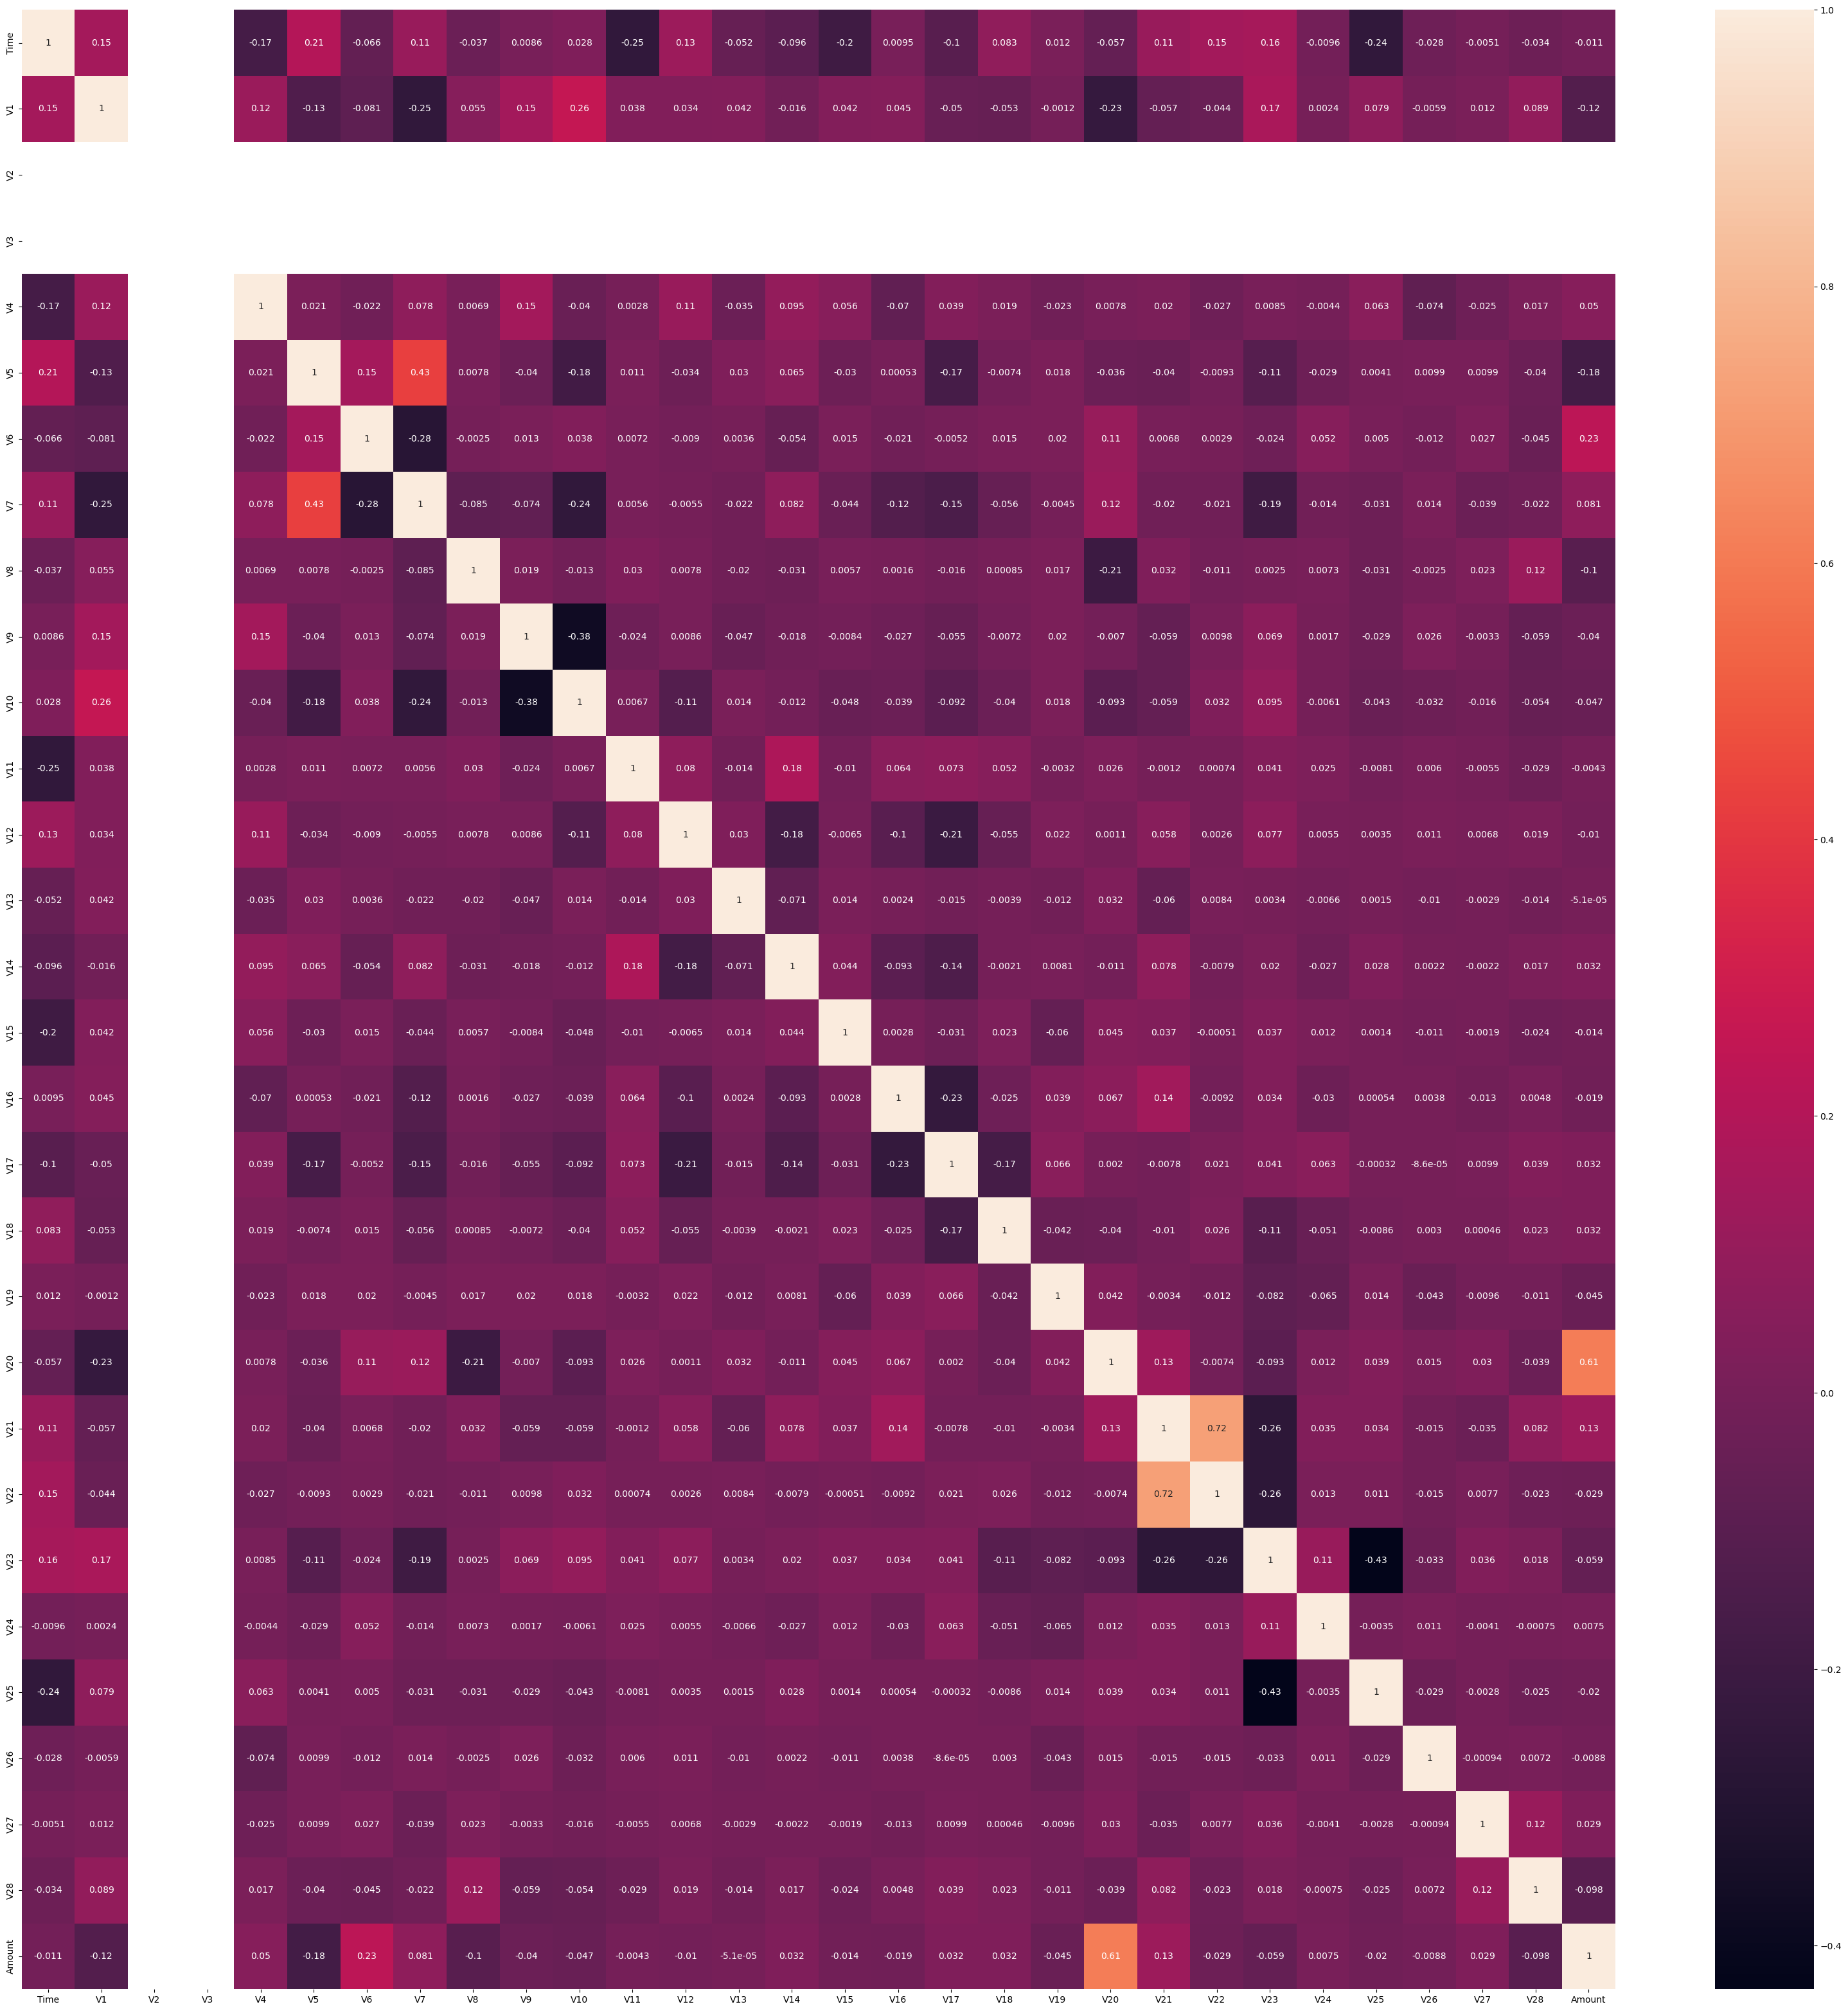

In [19]:
plt.figure(figsize=(40,40))
sns.heatmap(corr_data1.corr(),annot=True)

## Model Creation 

In [15]:
#creating X and y variable
X=preprcessed_data.drop(['Class'], axis=1)
y=preprcessed_data.Class

In [16]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.433099,0.0,0.0,0.724666,0.442766,0.039316,0.551469,0.983616,0.577962,0.533238,0.410053,0.867045,0.309645,0.406104,0.791600,0.374396,0.570534,0.506202,0.609969,0.024415,0.501630,0.566535,0.416563,0.508551,0.541863,0.435662,0.418976,0.981141,0.005824
1,0.000000,0.812297,0.0,0.0,0.578600,0.519169,0.032131,0.480667,0.983434,0.453138,0.468099,0.770445,0.947820,0.591980,0.451659,0.622536,0.610038,0.479143,0.453892,0.459783,0.016433,0.376577,0.352489,0.587649,0.380255,0.556325,0.574333,0.416345,0.983419,0.000105
2,0.000006,0.433315,0.0,0.0,0.567861,0.411143,0.056965,0.674186,0.985615,0.199297,0.562765,0.605891,0.899867,0.635499,0.445624,0.969816,0.509785,0.825927,0.469399,0.500627,0.031229,0.662147,0.681869,0.496774,0.270044,0.371075,0.457681,0.415489,0.978677,0.014739
3,0.000006,0.491582,0.0,0.0,0.372624,0.505680,0.049667,0.551027,0.987356,0.225025,0.496408,0.464189,0.905250,0.595539,0.412430,0.365274,0.225783,0.317955,0.991396,0.162884,0.012972,0.447386,0.502879,0.352053,0.116668,0.736107,0.421217,0.417669,0.986395,0.004807
4,0.000012,0.463055,0.0,0.0,0.571513,0.429557,0.034483,0.630042,0.978663,0.669472,0.700596,0.364887,0.922526,0.755368,0.186080,0.529043,0.379175,0.444535,0.490199,0.719101,0.028329,0.506980,0.688081,0.394762,0.531997,0.416613,0.740028,0.420561,0.996181,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,0.637869,0.0,0.0,0.183624,0.497236,0.029601,0.507108,0.982592,0.890548,0.486814,0.236627,0.903416,0.367264,0.504555,0.305771,0.772391,0.493054,0.627462,0.313049,0.054911,0.641325,0.527773,0.496774,0.326795,0.499952,0.628981,0.433929,0.983197,0.000030
284803,0.999971,0.526279,0.0,0.0,0.392210,0.674187,0.047177,0.503600,0.986248,0.622515,0.263677,0.476894,0.940648,0.730367,0.307053,0.730026,0.313523,0.504374,0.194332,0.077397,0.019638,0.641778,0.717532,0.515886,0.166927,0.266629,0.344917,0.417775,0.979073,0.000965
284804,0.999977,0.920440,0.0,0.0,0.420600,0.497236,0.073197,0.432185,0.991796,0.591804,0.387789,0.570442,0.899725,0.463676,0.351831,0.763398,0.528524,0.600414,0.598705,0.341915,0.018188,0.652531,0.636690,0.475519,0.689338,0.593230,0.480451,0.416593,0.980790,0.002642
284805,0.999977,0.599446,0.0,0.0,0.616553,0.435163,0.041444,0.345605,0.991404,0.583667,0.409435,0.179888,0.850484,0.299978,0.613144,0.891986,0.339546,0.656031,0.778360,0.500627,0.021327,0.672542,0.688495,0.373885,0.526300,0.280655,0.759563,0.418520,0.989137,0.000389


In [17]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [18]:
## creating training and testing data for Logistic Regression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=43)

In [19]:
## balancing the data
preprcessed_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [21]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({0: 213240, 1: 365})
SMOTE Classes Counter({0: 213240, 1: 213240})


# Logistic Algorithm

In [23]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_smote,y_smote)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
LR_y_train_predict=clf.predict(X_smote)
LR_y_train_predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

#### Traning score

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

f1score=f1_score(LR_y_train_predict,y_smote)
f1score

0.9428271670733428

#### Testing score

In [26]:
y_pred=clf.predict(X_test)

In [27]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
pd.crosstab(y_pred,y_test)

Class,0,1
row_0,,
0,68396,15
1,2679,112


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [30]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[68396    15]
 [ 2679   112]]


In [31]:
recall=recall_score(y_test,y_pred)
recall

0.8818897637795275

In [32]:
precision=precision_score(y_test,y_pred)
precision

0.0401289860265138

In [33]:
f1score=f1_score(y_test,y_pred)
f1score

0.07676490747087046

In [34]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71075
           1       0.04      0.88      0.08       127

    accuracy                           0.96     71202
   macro avg       0.52      0.92      0.53     71202
weighted avg       1.00      0.96      0.98     71202



model is overfit

## # Bagging using Logistic Regression

In [36]:
from sklearn.ensemble import BaggingClassifier

model_bagg=BaggingClassifier(base_estimator=clf,n_estimators=20)

model_bagg.fit(X_smote,y_smote)



C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=20)

#### Traning score

In [37]:
y_train_bagg=model_bagg.predict(X_smote)

In [38]:
f1_train_bagg=f1_score(y_smote,y_train_bagg)
f1_train_bagg

0.942859873372357

#### Testing score

In [39]:
y_hat_bagg=model_bagg.predict(X_test)

In [40]:
f1_bagg=f1_score(y_test,y_hat_bagg)
f1_bagg

0.07626830098740212

In [41]:
ac_bag=accuracy_score(y_test,y_hat_bagg)
ac_bag

0.9618971377208505

In [42]:
recall_bag=recall_score(y_test,y_hat_bagg)
recall_bag

0.8818897637795275

In [43]:
pre_bag=precision_score(y_test,y_hat_bagg)
pre_bag

0.0398576512455516

In [44]:
cr_bgg=classification_report(y_test,y_hat_bagg)
print(cr_bgg)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71075
           1       0.04      0.88      0.08       127

    accuracy                           0.96     71202
   macro avg       0.52      0.92      0.53     71202
weighted avg       1.00      0.96      0.98     71202



### Conclusion
According to the model we can conclude that:
The testing score is not good so  logistic regression is not giving as a generalize model.      
The model her is overfitted

# KNN

In [45]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN

error_rate = []
# Will take some time
for i in range(1,11):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i = KNN.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

In [46]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN1=KNeighborsClassifier() ## model object creation
KNN1.fit(X_smote,y_smote)  ## fitting the model
y_hat_knn=KNN1.predict(X_test)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [47]:
y_predict_KNN=KNN.predict(X_test)

C:\Users\RAHULKUMAR.M\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### Testing score

In [45]:
## Checking the outputs
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
f1_KNN=f1_score(y_test,y_predict_KNN)
f1_KNN

0.240473061760841

In [46]:
re_KNN=recall_score(y_test,y_predict_KNN)
re_KNN

0.1545608108108108

In [47]:
pr_KNN=precision_score(y_test,y_predict_KNN)
pr_KNN

0.5414201183431953

In [48]:
cr_bgg=classification_report(y_test,y_predict_KNN)
print(cr_bgg)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9113
           1       0.54      0.15      0.24      1184

    accuracy                           0.89     10297
   macro avg       0.72      0.57      0.59     10297
weighted avg       0.86      0.89      0.86     10297



#### By using bagging base estimator is KNN

In [ ]:
from sklearn.ensemble import BaggingClassifier

model_bagg_knn=BaggingClassifier(base_estimator=KNN,n_estimators=20)

model_bagg_knn.fit(X_train,y_train)

y_hat_bagg_knn=model_bagg_knn.predict(X_test)

In [50]:
f1_bgg_knn=f1_score(y_test,y_hat_bagg_knn)
f1_bgg_knn


0.27987616099071205

In [51]:
recall_bagg=recall_score(y_test,y_hat_bagg_knn)
recall_bagg

0.19087837837837837

In [52]:
pr_KNN=precision_score(y_test,y_predict_KNN)
pr_KNN

0.5414201183431953

In [53]:
cr_bgg=classification_report(y_test,y_predict_KNN)
print(cr_bgg)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9113
           1       0.54      0.15      0.24      1184

    accuracy                           0.89     10297
   macro avg       0.72      0.57      0.59     10297
weighted avg       0.86      0.89      0.86     10297



#### Conclusion
According to the model we can conclude that.

The testing score is not good so KNN is not giving as a generalize model.      


# SVM

In [22]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters ###onject creation
svclassifier.fit(X_smote, y_smote)#traning of the classifier

SVC()

In [23]:
# Predict output for X_test
y_hat1=svclassifier.predict(X_test)
y_hat1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc_svm=accuracy_score(y_test,y_hat1)
acc_svm

0.9938484874020392

In [25]:
recall_svm=recall_score(y_test,y_hat1)
recall_svm

0.8346456692913385

In [26]:
pre_svm=precision_score(y_test,y_hat1)
pre_svm

0.20267686424474188

In [27]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     71075
           1       0.20      0.83      0.33       127

    accuracy                           0.99     71202
   macro avg       0.60      0.91      0.66     71202
weighted avg       1.00      0.99      1.00     71202



In [28]:
cm1=pd.crosstab(y_test,y_hat1)
cm1

col_0,0,1
Class,,
0,70658,417
1,21,106


In [29]:
# F1 score considers both Precision and Recall for evaluating a model
f1=f1_score(y_test,y_hat1)
f1

0.3261538461538461

### Hyperparameter

In [30]:
from sklearn.model_selection import GridSearchCV     
    
# defining parameter range
param_grid = {'C': [10,5,1,2],   ## 0.1,5,10,50,60,70
              'gamma': [0.001,0.002,0.003], ## 0.001,0.002,0.003
             'random_state':(list(range(1, 10)))} 
model=SVC()#create empty model that is model on default hyperparameters
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)#verbose=shows the outcome
  
# fitting the model for grid search
grid.fit(X,y)

Fitting 5 folds for each of 228 candidates, totalling 1140 fits
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=  33.3s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=  33.4s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=  33.6s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=  32.5s
[CV] END ..................C=10, gamma=0.001, random_state=1; total time=  32.8s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=  32.4s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=  33.4s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=  34.1s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=  32.7s
[CV] END ..................C=10, gamma=0.001, random_state=2; total time=  33.0s
[CV] END ..................C=10, gamma=0.001, random_state=3; total time=  32.5s
[CV] END ..................C=10, gamma=0.001,

[CV] END ..................C=10, gamma=0.002, random_state=2; total time=  34.2s
[CV] END ..................C=10, gamma=0.002, random_state=2; total time=  34.5s
[CV] END ..................C=10, gamma=0.002, random_state=2; total time=  33.2s
[CV] END ..................C=10, gamma=0.002, random_state=2; total time=  33.2s
[CV] END ..................C=10, gamma=0.002, random_state=3; total time=  32.3s
[CV] END ..................C=10, gamma=0.002, random_state=3; total time=  33.2s
[CV] END ..................C=10, gamma=0.002, random_state=3; total time=  32.9s
[CV] END ..................C=10, gamma=0.002, random_state=3; total time=  32.9s
[CV] END ..................C=10, gamma=0.002, random_state=3; total time=  33.1s
[CV] END ..................C=10, gamma=0.002, random_state=4; total time=  32.3s
[CV] END ..................C=10, gamma=0.002, random_state=4; total time=  33.6s
[CV] END ..................C=10, gamma=0.002, random_state=4; total time=  32.7s
[CV] END ..................C

[CV] END ..................C=10, gamma=0.003, random_state=3; total time=  33.0s
[CV] END ..................C=10, gamma=0.003, random_state=3; total time=  33.0s
[CV] END ..................C=10, gamma=0.003, random_state=4; total time=  32.2s
[CV] END ..................C=10, gamma=0.003, random_state=4; total time=  33.6s
[CV] END ..................C=10, gamma=0.003, random_state=4; total time=  32.3s
[CV] END ..................C=10, gamma=0.003, random_state=4; total time=  33.3s
[CV] END ..................C=10, gamma=0.003, random_state=4; total time=  32.8s
[CV] END ..................C=10, gamma=0.003, random_state=5; total time=  32.5s
[CV] END ..................C=10, gamma=0.003, random_state=5; total time=  33.8s
[CV] END ..................C=10, gamma=0.003, random_state=5; total time=  32.1s
[CV] END ..................C=10, gamma=0.003, random_state=5; total time=  33.0s
[CV] END ..................C=10, gamma=0.003, random_state=5; total time=  33.2s
[CV] END ..................C

[CV] END ...................C=5, gamma=0.001, random_state=5; total time=  32.3s
[CV] END ...................C=5, gamma=0.001, random_state=5; total time=  32.6s
[CV] END ...................C=5, gamma=0.001, random_state=5; total time=  33.2s
[CV] END ...................C=5, gamma=0.001, random_state=5; total time=  32.8s
[CV] END ...................C=5, gamma=0.001, random_state=5; total time=  33.2s
[CV] END ...................C=5, gamma=0.001, random_state=6; total time=  32.2s
[CV] END ...................C=5, gamma=0.001, random_state=6; total time=  32.8s
[CV] END ...................C=5, gamma=0.001, random_state=6; total time=  33.4s
[CV] END ...................C=5, gamma=0.001, random_state=6; total time=  32.8s
[CV] END ...................C=5, gamma=0.001, random_state=6; total time=  33.2s
[CV] END ...................C=5, gamma=0.001, random_state=7; total time=  32.3s
[CV] END ...................C=5, gamma=0.001, random_state=7; total time=  32.6s
[CV] END ...................

[CV] END ...................C=5, gamma=0.002, random_state=6; total time=  33.2s
[CV] END ...................C=5, gamma=0.002, random_state=6; total time=  33.6s
[CV] END ...................C=5, gamma=0.002, random_state=6; total time=  32.9s
[CV] END ...................C=5, gamma=0.002, random_state=7; total time=  32.7s
[CV] END ...................C=5, gamma=0.002, random_state=7; total time=  34.1s
[CV] END ...................C=5, gamma=0.002, random_state=7; total time=  33.1s
[CV] END ...................C=5, gamma=0.002, random_state=7; total time=  33.4s
[CV] END ...................C=5, gamma=0.002, random_state=7; total time=  33.5s
[CV] END ...................C=5, gamma=0.002, random_state=8; total time=  32.6s
[CV] END ..................C=5, gamma=0.002, random_state=8; total time=125.7min
[CV] END ...................C=5, gamma=0.002, random_state=8; total time=  39.1s
[CV] END ...................C=5, gamma=0.002, random_state=8; total time=  35.6s
[CV] END ...................

[CV] END ...................C=5, gamma=0.003, random_state=7; total time=  32.6s
[CV] END ...................C=5, gamma=0.003, random_state=8; total time=  32.4s
[CV] END ...................C=5, gamma=0.003, random_state=8; total time=  32.9s
[CV] END ...................C=5, gamma=0.003, random_state=8; total time=  33.7s
[CV] END ...................C=5, gamma=0.003, random_state=8; total time=  32.7s
[CV] END ...................C=5, gamma=0.003, random_state=8; total time=  32.1s
[CV] END ...................C=5, gamma=0.003, random_state=9; total time=  31.8s
[CV] END ...................C=5, gamma=0.003, random_state=9; total time=  32.8s
[CV] END ...................C=5, gamma=0.003, random_state=9; total time=  33.0s
[CV] END ...................C=5, gamma=0.003, random_state=9; total time=  32.6s
[CV] END ...................C=5, gamma=0.003, random_state=9; total time=  32.6s
[CV] END ..................C=5, gamma=0.003, random_state=10; total time=  31.9s
[CV] END ..................C

[CV] END ...................C=1, gamma=0.001, random_state=9; total time=  31.9s
[CV] END ...................C=1, gamma=0.001, random_state=9; total time=  31.5s
[CV] END ...................C=1, gamma=0.001, random_state=9; total time=  31.9s
[CV] END ...................C=1, gamma=0.001, random_state=9; total time=  31.4s
[CV] END ..................C=1, gamma=0.001, random_state=10; total time=  31.1s
[CV] END ..................C=1, gamma=0.001, random_state=10; total time=  31.6s
[CV] END ..................C=1, gamma=0.001, random_state=10; total time=  31.4s
[CV] END ..................C=1, gamma=0.001, random_state=10; total time=  32.1s
[CV] END ..................C=1, gamma=0.001, random_state=10; total time=  31.4s
[CV] END ..................C=1, gamma=0.001, random_state=11; total time=  31.1s
[CV] END ..................C=1, gamma=0.001, random_state=11; total time=  31.7s
[CV] END ..................C=1, gamma=0.001, random_state=11; total time=  31.7s
[CV] END ..................C

[CV] END ..................C=1, gamma=0.002, random_state=10; total time=  31.7s
[CV] END ..................C=1, gamma=0.002, random_state=10; total time=  32.8s
[CV] END ..................C=1, gamma=0.002, random_state=11; total time=  31.2s
[CV] END ..................C=1, gamma=0.002, random_state=11; total time=  31.5s
[CV] END ..................C=1, gamma=0.002, random_state=11; total time=  32.2s
[CV] END ..................C=1, gamma=0.002, random_state=11; total time=  31.7s
[CV] END ..................C=1, gamma=0.002, random_state=11; total time=  32.6s
[CV] END ..................C=1, gamma=0.002, random_state=12; total time=  31.3s
[CV] END ..................C=1, gamma=0.002, random_state=12; total time=  31.6s
[CV] END ..................C=1, gamma=0.002, random_state=12; total time=  32.1s
[CV] END ..................C=1, gamma=0.002, random_state=12; total time=  32.0s
[CV] END ..................C=1, gamma=0.002, random_state=12; total time=  33.2s
[CV] END ..................C

[CV] END ..................C=1, gamma=0.003, random_state=12; total time=  32.4s
[CV] END ..................C=1, gamma=0.003, random_state=12; total time=  32.3s
[CV] END ..................C=1, gamma=0.003, random_state=12; total time=  32.8s
[CV] END ..................C=1, gamma=0.003, random_state=12; total time=  33.0s
[CV] END ..................C=1, gamma=0.003, random_state=12; total time=  31.5s
[CV] END ..................C=1, gamma=0.003, random_state=13; total time=  31.6s
[CV] END ..................C=1, gamma=0.003, random_state=13; total time=  32.3s
[CV] END ..................C=1, gamma=0.003, random_state=13; total time=  32.4s
[CV] END ..................C=1, gamma=0.003, random_state=13; total time=  33.0s
[CV] END ..................C=1, gamma=0.003, random_state=13; total time=  31.8s
[CV] END ..................C=1, gamma=0.003, random_state=14; total time=  31.5s
[CV] END ..................C=1, gamma=0.003, random_state=14; total time=  32.2s
[CV] END ..................C

[CV] END ..................C=2, gamma=0.001, random_state=13; total time=  32.7s
[CV] END ..................C=2, gamma=0.001, random_state=13; total time=  32.7s
[CV] END ..................C=2, gamma=0.001, random_state=13; total time=  32.3s
[CV] END ..................C=2, gamma=0.001, random_state=14; total time=  31.6s
[CV] END ..................C=2, gamma=0.001, random_state=14; total time=  32.5s
[CV] END ..................C=2, gamma=0.001, random_state=14; total time=  33.0s
[CV] END ..................C=2, gamma=0.001, random_state=14; total time=  32.3s
[CV] END ..................C=2, gamma=0.001, random_state=14; total time=  32.2s
[CV] END ..................C=2, gamma=0.001, random_state=15; total time=  31.5s
[CV] END ..................C=2, gamma=0.001, random_state=15; total time=  32.7s
[CV] END ..................C=2, gamma=0.001, random_state=15; total time=  33.1s
[CV] END ..................C=2, gamma=0.001, random_state=15; total time=  32.4s
[CV] END ..................C

[CV] END ..................C=2, gamma=0.002, random_state=14; total time=  32.5s
[CV] END ..................C=2, gamma=0.002, random_state=15; total time=  31.4s
[CV] END ..................C=2, gamma=0.002, random_state=15; total time=  32.9s
[CV] END ..................C=2, gamma=0.002, random_state=15; total time=  32.7s
[CV] END ..................C=2, gamma=0.002, random_state=15; total time=  32.6s
[CV] END ..................C=2, gamma=0.002, random_state=15; total time=  32.4s
[CV] END ..................C=2, gamma=0.002, random_state=16; total time=  31.8s
[CV] END ..................C=2, gamma=0.002, random_state=16; total time=  32.7s
[CV] END ..................C=2, gamma=0.002, random_state=16; total time=  32.7s
[CV] END ..................C=2, gamma=0.002, random_state=16; total time=  32.1s
[CV] END ..................C=2, gamma=0.002, random_state=16; total time=  32.6s
[CV] END ..................C=2, gamma=0.002, random_state=17; total time=  31.4s
[CV] END ..................C

[CV] END ..................C=2, gamma=0.003, random_state=16; total time=  33.4s
[CV] END ..................C=2, gamma=0.003, random_state=16; total time=  32.7s
[CV] END ..................C=2, gamma=0.003, random_state=16; total time=  32.1s
[CV] END ..................C=2, gamma=0.003, random_state=16; total time=  31.5s
[CV] END ..................C=2, gamma=0.003, random_state=17; total time=  31.8s
[CV] END ..................C=2, gamma=0.003, random_state=17; total time=  33.0s
[CV] END ..................C=2, gamma=0.003, random_state=17; total time=  32.6s
[CV] END ..................C=2, gamma=0.003, random_state=17; total time=  32.6s
[CV] END ..................C=2, gamma=0.003, random_state=17; total time=  31.4s
[CV] END ..................C=2, gamma=0.003, random_state=18; total time=  31.9s
[CV] END ..................C=2, gamma=0.003, random_state=18; total time=  32.9s
[CV] END ..................C=2, gamma=0.003, random_state=18; total time=  32.8s
[CV] END ..................C

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 5, 1, 2], 'gamma': [0.001, 0.002, 0.003],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [31]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.003, 'random_state': 1}


In [32]:
clf=SVC(C=10, gamma=0.001,random_state=1)

In [33]:
clf.fit(X_smote, y_smote)

SVC(C=10, gamma=0.001, random_state=1)

In [34]:
yy_clf=clf.predict(X_test)

In [36]:
Recall=recall_score(y_test,yy_clf)
Recall

0.889763779527559

In [38]:
Pre=precision_score(y_test,yy_clf)
Pre

0.05966209081309398

In [40]:
print(classification_report(y_test,yy_clf))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71075
           1       0.06      0.89      0.11       127

    accuracy                           0.97     71202
   macro avg       0.53      0.93      0.55     71202
weighted avg       1.00      0.97      0.99     71202



In [41]:
cm=pd.crosstab(y_test,yy_clf)
cm

col_0,0,1
Class,,
0,69294,1781
1,14,113


In [42]:
f1=f1_score(y_test,yy_clf)
f1

0.11182582879762493

#### Conclusion:
    
The model is giving accuracy as 97% after hyperparameter training but the other score are not that good.

# DecisionTree and RandomForest

In [43]:
from sklearn.tree import DecisionTreeClassifier
#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()
#object creation for decision tree  
dt.fit(X_train,y_train)
#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

0.9987781242099941

In [45]:
## test score
test_f1=f1_score(y_test,y_hat)#f1 score
test_f1

0.6561264822134387

In [46]:
P_score=precision_score(y_test,y_hat)
P_score   

0.6587301587301587

In [47]:
re_sco=recall_score(y_test,y_hat)
re_sco

0.6535433070866141

In [48]:
print(classification_report(y_test,y_hat))# for  testing 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71075
           1       0.66      0.65      0.66       127

    accuracy                           1.00     71202
   macro avg       0.83      0.83      0.83     71202
weighted avg       1.00      1.00      1.00     71202



In [49]:
pd.crosstab(y_test,y_hat)# confusion matrix for

col_0,0,1
Class,,
0,71032,43
1,44,83


#### Hyperparameters of DecisionTree


In [69]:
from sklearn.model_selection import GridSearchCV #logic is inner and outer loop
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}
tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, 
                       verbose=3, cv=3)
tree_cv.fit(X_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters


Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'})


In [71]:
 
Bestparamters: ({'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'random'})


In [72]:
from sklearn.model_selection import cross_val_score
scores_after = cross_val_score(model,X,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores_after.std())
#std of < 0.05 is good. 

[0.77203647 0.63221884 0.59574468]
Cross validation Score: 0.6666666666666666
Std : 0.07598108717022364


In [73]:
 tree_cv.best_params_#getting best parameters from cv

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [74]:
tree_cv.best_score_#getting best score form cv

0.7864789544836798

In [75]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_leaf= 2,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [76]:
dt1.fit(X_train,y_train)#traing model with best parameter

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2)

In [77]:
y_hat1=dt1.predict(X_test)#predicting
y_hat1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
acc_test=accuracy_score(y_test,y_hat1)#checking accuracy
acc_test

0.9991011488441336

In [79]:
R=recall_score(y_test,y_hat1)#checking recall
R

0.6456692913385826

In [80]:
P=precision_score(y_test,y_hat1)#checking 
P

0.8118811881188119

In [81]:
test_f1=f1_score(y_test,y_hat1)#f1_score
test_f1

0.7192982456140351

In [82]:
print(classification_report(y_test,y_hat1))#it will give precision,recall,f1 scores and accuracy 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71075
           1       0.81      0.65      0.72       127

    accuracy                           1.00     71202
   macro avg       0.91      0.82      0.86     71202
weighted avg       1.00      1.00      1.00     71202



## RandomForest Implementation

In [53]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [54]:
yy_predict=rf_clf.predict(X_test)#testing

In [55]:
from sklearn.metrics import classification_report,f1_score,recall_score,precision_score,classification_report
print(classification_report(y_test,yy_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71075
           1       0.93      0.63      0.75       127

    accuracy                           1.00     71202
   macro avg       0.96      0.81      0.88     71202
weighted avg       1.00      1.00      1.00     71202



In [56]:
f_Score=f1_score(y_test,yy_predict)
f_Score

0.7511737089201878

In [57]:
test=recall_score(y_test,yy_predict)#checking accuracy
test

0.6299212598425197

In [58]:
PS=precision_score(y_test,yy_predict)#checking 
PS

0.9302325581395349

In [59]:
print(classification_report(y_test,yy_predict))#it will give precision,recall,f1 scores and accuracy 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71075
           1       0.93      0.63      0.75       127

    accuracy                           1.00     71202
   macro avg       0.96      0.81      0.88     71202
weighted avg       1.00      1.00      1.00     71202



# ANN

In [60]:
## model creation
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(50,3),#3layers and 50 perceptron 
                       learning_rate_init=0.1,
                       max_iter=1000,#how may time the forward and backward propogation should be done for one ouput
                       random_state=2) ## model object creation max_iter=Stopping parameter
model.fit(X_train,y_train) ## training the data
y_predict_proba = model.predict_proba(X_test) ## predicting the pro
## bability of class
y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)


In [61]:
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
y_train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
print("Train f1 score :",f1_score(y_train,y_train_predict))
print("Test f1 score :",f1_score(y_test,y_predict))

Train f1 score : 0.7433903576982893
Test f1 score : 0.690909090909091


In [64]:
## getting the confusion matrix
pd.crosstab(y_test,y_predict)

col_0,0,1
Class,,
0,71058,17
1,51,76


In [65]:
## getting classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71075
           1       0.82      0.60      0.69       127

    accuracy                           1.00     71202
   macro avg       0.91      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202



# Result

| Model                  |Accuracy score| 
|------------------------|--------------|
| Logistic Regression    | 96%          |
| SVM                    | 99%          | 
| KNN                    | 89%          |
| Decision Tree          | 99%          | 
| Random Forest          | 100%         |
| ANN                    | 100%         |
   

### Overall random forest without hyperparameter is giving high score than the other model. Therefore we can say that Random forest model would be the better option for this credit card detection.